In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_FIGURES'

In [46]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'csvwriter', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [47]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [48]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

all_animals_vhpc  = np.loadtxt('../allmice.txt', dtype=str)
expo_animals_vhpc = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals_vhpc  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals_vhpc = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals_vhpc = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
ext2_animals_vhpc = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals_vhpc = np.loadtxt('../ext1_mice.txt', dtype=str)

all_animals =  'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
expo_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
pre_animals =  'dhpcg1','dhpc24'           ,'dhpc35','dhpc36'
d2_animals =   'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
post_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
renew_animals ='dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
ext2_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
ext1_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'

In [49]:
sessions = 'expo', 'pre', 'post', 'ext1', 'ext2', 'renew'
sessions_b = 'expo','pre','d2', 'post', 'ext1', 'ext2', 'renew'

In [50]:
v_name=[]
for t in range(16):
    for r in 'dhpc','vhpc':
        exec("scores_gmin_tb_%s_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'scores_gmin_tb_%s'"%(t,))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
            if r == 'dhpc':
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
            exec("scores_gmin_tb_%s_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("scores_gmin_tb_%s_%s_t = scores_gmin_tb_%s_%s_t['%s']"%(t,r,t,r,sess))
            #exec("scores_gmin_tb_%s_%s['%s'] = scores_gmin_tb_%s_%s_t"%(t,r,sess,t,r))

In [51]:
#get mean of each array
for t in range(16):
    for r in 'dhpc','vhpc':
        exec("mean_scores_gmin_tb_%s_%s={}"%(t,r))
        for sess in sessions_b:
            exec("mean_scores_gmin_tb_%s_%s[sess]=[]"%(t,r))
            for i in eval("scores_gmin_tb_%s_%s[sess]"%(t,r)):
                exec("mean_scores_gmin_tb_%s_%s[sess].append(i.mean())"%(t,r))

In [52]:
loops=10
for t in range (16):
    exec("ttest_tb_%s = {}"%t)
    exec("mannwhitU_tb_%s = {}"%t)
    for sess in sessions_b:
        exec("ttest_tb_%s[sess] = sstats.ttest_ind(mean_scores_gmin_tb_%s_dhpc[sess][:loops],mean_scores_gmin_tb_%s_vhpc[sess][:loops])"%(t,t,t))
        exec("mannwhitU_tb_%s[sess] = sstats.mannwhitneyu(mean_scores_gmin_tb_%s_dhpc[sess][:loops],mean_scores_gmin_tb_%s_vhpc[sess][:loops])"%(t,t,t))

In [53]:
v_name=[]
for t in range(16):
    for r in 'dhpc','vhpc':
        exec("scores_tb_%s_ncells_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'scores_tb_%s_ncells'"%(t))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
            if r == 'dhpc':
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
            exec("scores_tb_%s_ncells_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("scores_tb_%s_ncells_%s_t = scores_tb_%s_ncells_%s_t['%s']"%(t,r,t,r,sess))
            #exec("scores_tb_%s_ncells_%s['%s'] = scores_tb_%s_ncells_%s_t"%(t,r,sess,t,r))

In [54]:
v_name=[]
for t in range(16):
    for r in 'dhpc','vhpc':
        exec("n_cells_%s_%s = {}"%(t,r))
        for sess in sessions_b:
            exec("v_name = 'n_cells_%s'"%(t))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
            if r == 'dhpc':
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
            exec("n_cells_%s_%s = ut.load_variable(v_name,path)"%(t,r))
            #exec("n_cells_%s_%s_t = n_cells_%s_%s_t['%s']"%(t,r,t,r,sess))
            #exec("n_cells_%s_%s['%s'] = n_cells_%s_%s_t"%(t,r,sess,t,r))

In [55]:
trad_co = ('limegreen','b','r','silver','grey','y')
pal_co = ('#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600')
dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
dark_co_b = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')
alt_co = ('hotpink','mediumorchid','darkturquoise','mediumspringgreen','lawngreen','khaki')
session_labels = ('Pre','Early','Late','Ext1','Ext2','Reinstate')
session_labels_b = ('Pre','Early','Day2','Late','Ext1','Ext2','Reinstate')

In [56]:
scores_gmin_tb_0_dhpc.keys()

['pre', 'ext2', 'ext1', 'renew', 'expo', 'post', 'd2']

In [57]:
scores_tb_6_ncells_dhpc['pre'].mean(1)

array([ 0.5875,  0.5925,  0.515 , ...,  0.94  ,  0.955 ,  0.9375])

In [58]:
def plot_scores_vs_ncells(ncells, scores, labels=True, dots=False, dot_color=(1, 0.7, 0.7), color='r', chance=None, ax=None):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 1))
    if dots == True:
        ax.plot(ncells, scores*100, 'o', ms=2, mew=0, color=dot_color, zorder=0)
    m = scores.reshape(-1, n_loops).mean(1)*100
    s = np.std(scores.reshape(-1, n_loops), 1)*100
    n = ncells[::n_loops]
    ax.plot(n, m, color=color)
    ax.fill_between(n,m-s,m+s,alpha=0.2,color=color,linewidth=0)
    #ax.errorbar(ncells[::n_loops], scores.reshape(-1, n_loops).mean(1)*100,
    #            np.std(scores.reshape(-1, n_loops), 1)*100,color=color)
    ax.set_ylim(40, 100)
    
    if labels:
        ax.set_xlabel("No. of Cells")
        ax.set_ylabel("Performance")

    if chance is not None:
        xmin, xmax, _, _  = ax.axis()
        ax.hlines(chance, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')

    return ax

def plot_scores_compare2(score1, score2, colors=['b', 'r',], labels=True, chance=None, ax=None, tick_lab=['pre','post']):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 2))
    values = [score1*100, score2*100]
    pt.plot_bars(values, ax=ax, colors=colors, stderr=False)
    if chance is not None:
        ax.hlines(chance, -0.5, 2-0.5, linestyles='dashed')

    ax.set_xticks(range(2))
    ax.set_xticklabels(tick_lab, rotation=30)
    
    ax.set_ylim(40,100)

    if labels:
        ax.set_ylabel('Decoding Performance (%)')
    pvs = []
    pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
    
    return ax

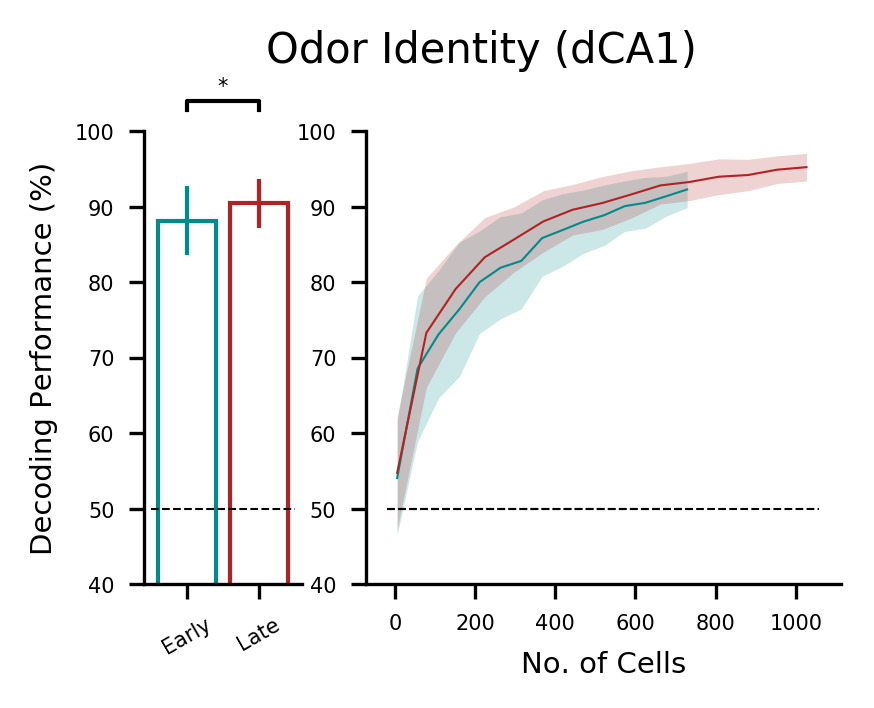

In [510]:
n_loops=200
fig, axs = pl.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios':[1,3]})

plot_scores_compare2(scores_gmin_tb_6_dhpc['pre'][:n_loops].mean(1), scores_gmin_tb_6_dhpc['post'][:n_loops].mean(1), chance=50,
                     ax=axs[0], colors=[dark_co_b[1],dark_co_b[3]],tick_lab=['Early','Late'])

plot_scores_vs_ncells(n_cells_6_dhpc['pre'], scores_tb_6_ncells_dhpc['pre'].mean(1), dot_color=(0.7, 0.7, 1), color=dark_co_b[1], chance=50, 
                      ax=axs[1], labels=False,dots=False)
plot_scores_vs_ncells(n_cells_6_dhpc['post'], scores_tb_6_ncells_dhpc['post'].mean(1), color=dark_co_b[3],chance=50,
                      ax=axs[1], labels=False,dots=False)
axs[1].set_xlabel("No. of Cells")

fig.suptitle("Odor Identity (dCA1)", fontsize=10, y=1.05)

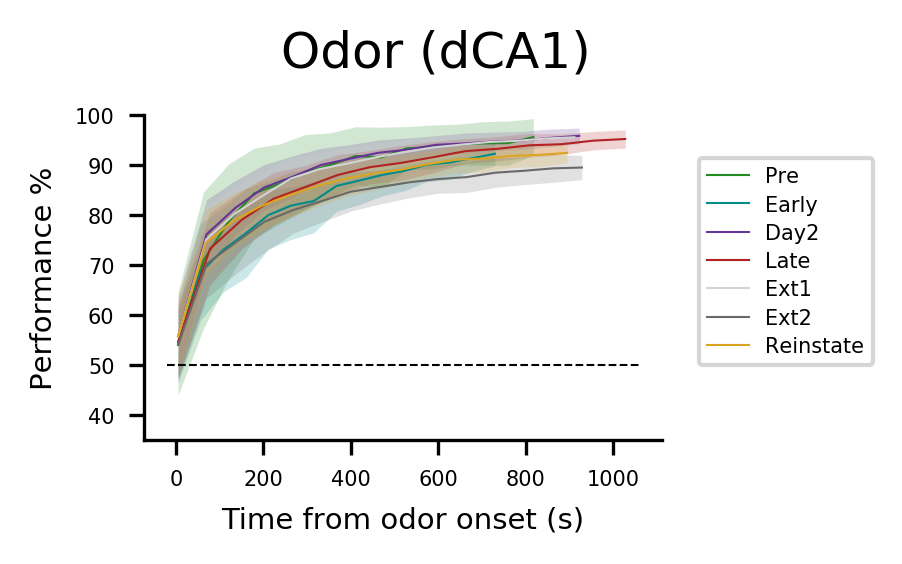

In [532]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_6_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Odor (dCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_dhpc.pdf'%NOTEBOOK_NAME)

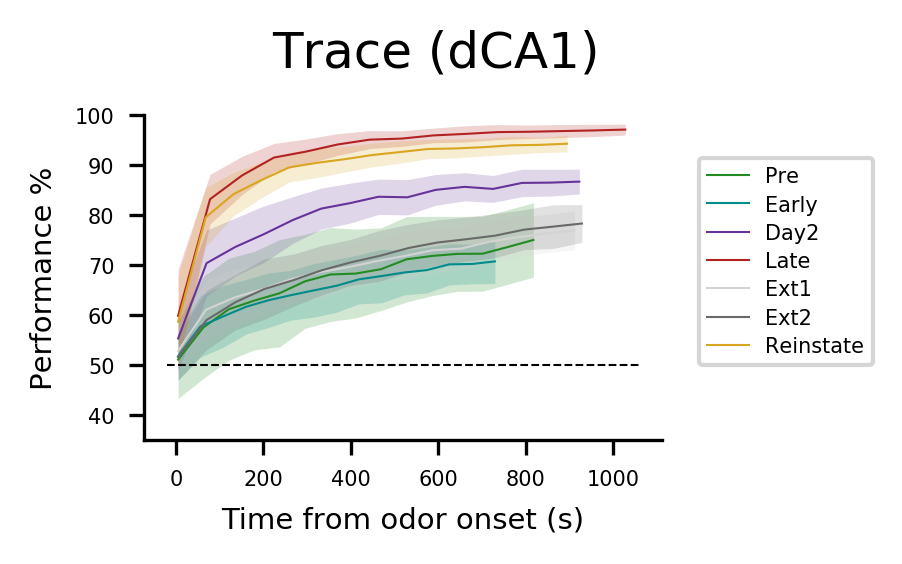

In [534]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_8_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Trace (dCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_dhpc.pdf'%NOTEBOOK_NAME)

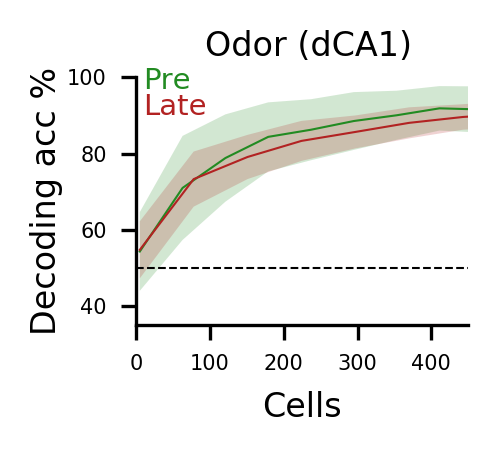

In [888]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_6_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Odor (dCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_BaPo_dhpc.pdf'%NOTEBOOK_NAME)

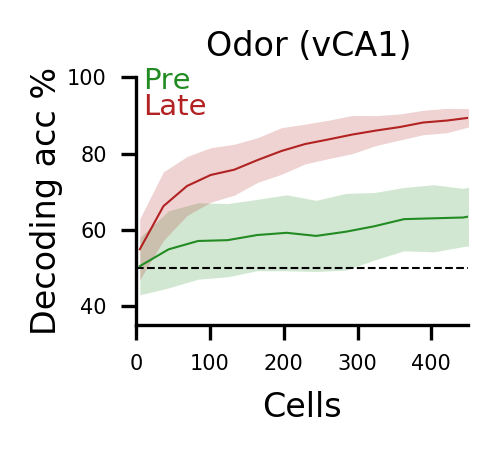

In [887]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_6_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Odor (vCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_BaPo_vhpc.pdf'%NOTEBOOK_NAME)

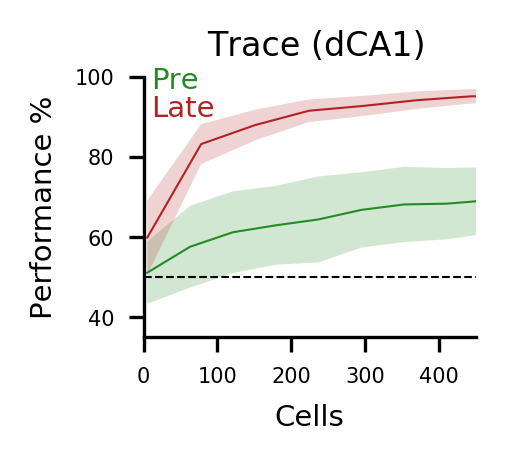

In [884]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))
n_loops=200


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_8_ncells_dhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_dhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_ylabel('Performance %')
ax.set_xlabel('Cells')
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Trace (dCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_BaPo_dhpc.pdf'%NOTEBOOK_NAME)

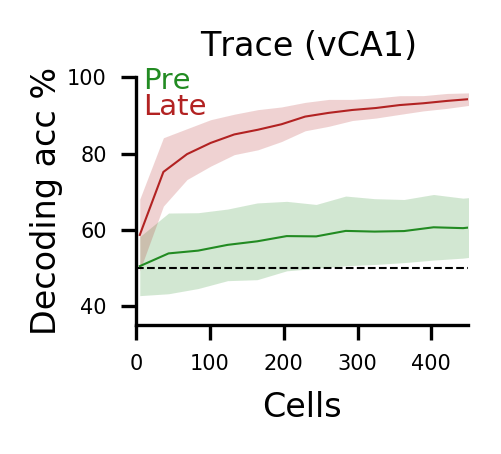

In [889]:
fig, ax = pl.subplots(1,1, figsize=(1.8,1.5))


for sess,c,sess_la in zip(['expo','post'],[dark_co_b[0],dark_co_b[3]],['Pre','Late']):
    m = scores_tb_8_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(0,450)
ax.hlines(50, 0, 450, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Cells',fontsize=8)
ax.set_ylabel('Decoding acc %',fontsize=8, labelpad=1)
ax.text(10,97,'Pre',color=dark_co[0],fontsize=7)
ax.text(10,90,'Late',color=dark_co[2],fontsize=7)
fig.suptitle('Trace (vCA1)',x=.6,fontsize=8)
fig.tight_layout(pad=1)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_BaPo_vhpc.pdf'%NOTEBOOK_NAME)

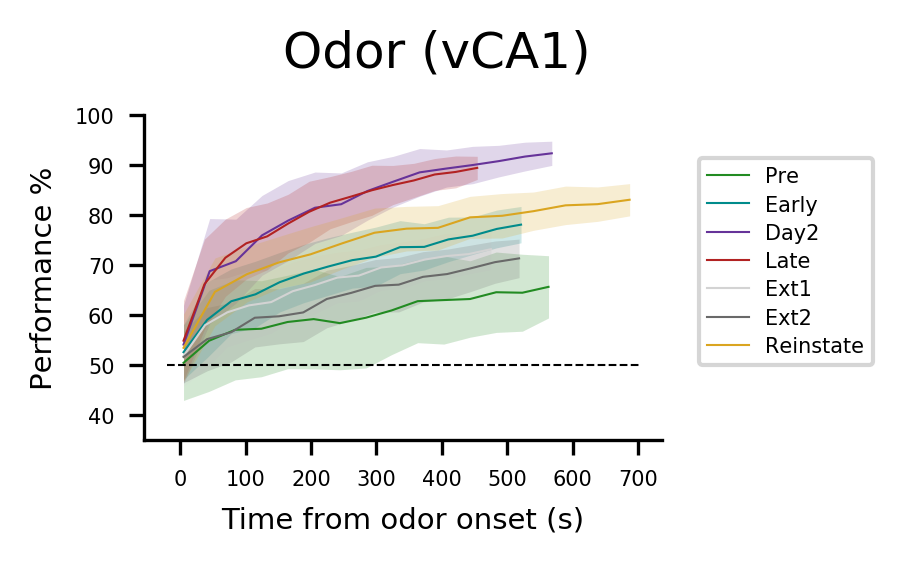

In [536]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_6_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_6_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Odor (vCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_CS_by_n_cells_vhpc.pdf'%NOTEBOOK_NAME)

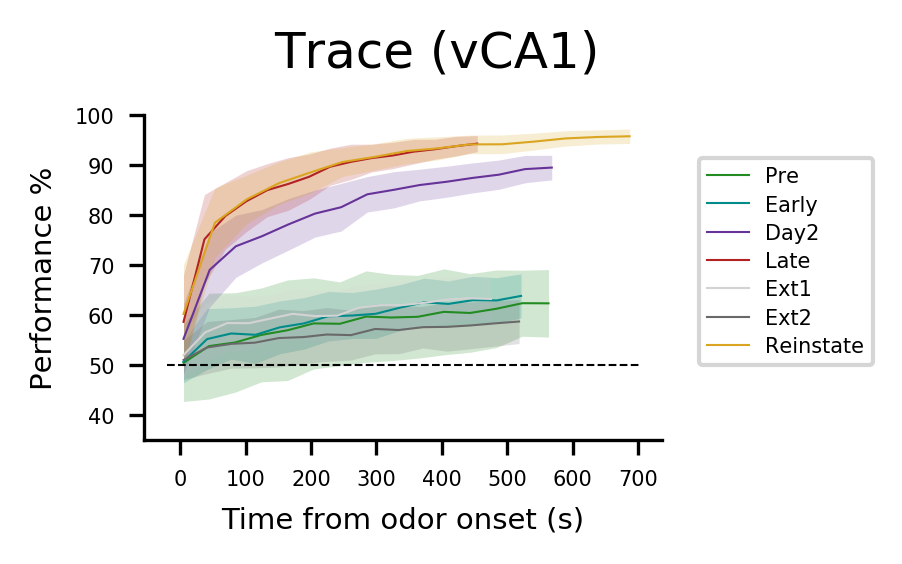

In [537]:
fig, ax = pl.subplots(1,1, figsize=(2.7, 2))
n_loops=200


for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    m = scores_tb_8_ncells_vhpc[sess].mean(1)
    s = np.std(m.reshape(-1, n_loops), 1)*100
    n = n_cells_8_vhpc[sess][::n_loops]
    ax.plot(n,m.reshape(-1, n_loops).mean(1)*100, color=c,label=sess_la)
    ax.fill_between(n,m.reshape(-1, n_loops).mean(1)*100-s,m.reshape(-1, n_loops).mean(1)*100+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
#ax.set_xlim(-3, 11)
#ax.set_xticks(np.arange(-2,11, 2))
#ax.set_xticklabels(np.arange(-2,11, 2))
xmin, xmax, _, _  = ax.axis()
ax.hlines(50, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
#pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('Trace (vCA1)',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_tr_by_n_cells_vhpc.pdf'%NOTEBOOK_NAME)

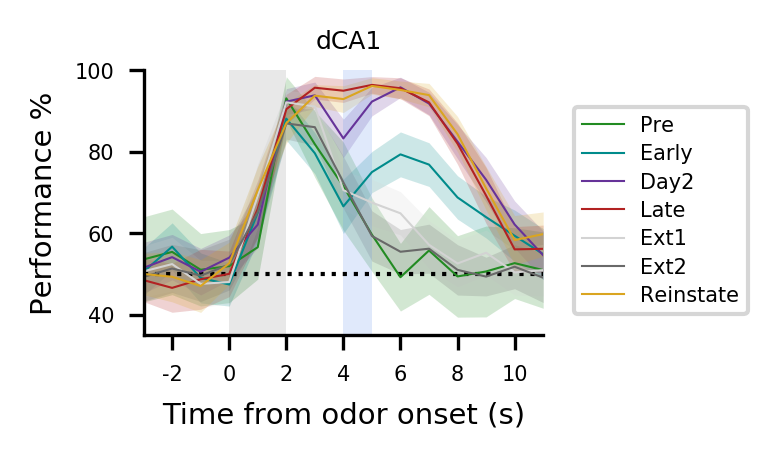

In [13]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

for sess,c,sess_la in zip(sessions_b,dark_co_b,session_labels_b):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100) for t in range(16)],
            color=c,label=sess_la)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_dhpc[sess]"%t))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.suptitle('dCA1',x=.6)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_combined_dhpc.pdf'%NOTEBOOK_NAME)

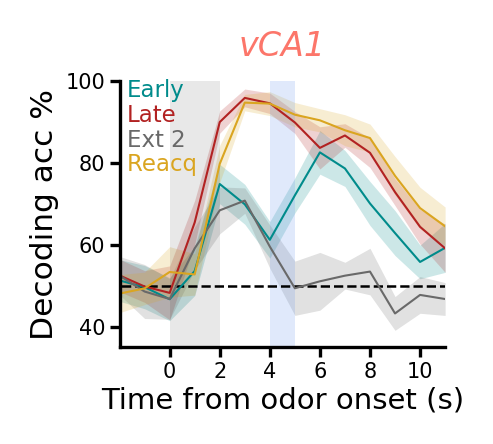

In [878]:
from matplotlib import cm
fig, ax = pl.subplots(1,1, figsize=(2, 1.7))

#for sess,c,sessla in zip(sessions,dark_co,session_labels):
for x in [1,2,4,5]:
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100) for t in range(16)],
            color=dark_co[x],label=session_labels[x])
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_vhpc[sessions[x]][:loops]"%t))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=dark_co[x],linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(-2, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
#ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.45,fontsize=5)
ax.text(-1.7,97-1,'Early',color=dark_co[1],fontsize=5.5)
ax.text(-1.7,91-1,'Late',color=dark_co[2],fontsize=5.5)
ax.text(-1.7,85-1,'Ext 2',color=dark_co[4],fontsize=5.5)
ax.text(-1.7,79-1,'Reacq',color=dark_co[5],fontsize=5.5)
fig.tight_layout(pad=2)
ax.set_title('vCA1', color='#FC766AFF',fontstyle='italic',fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_combined_vhpc.pdf'%NOTEBOOK_NAME)

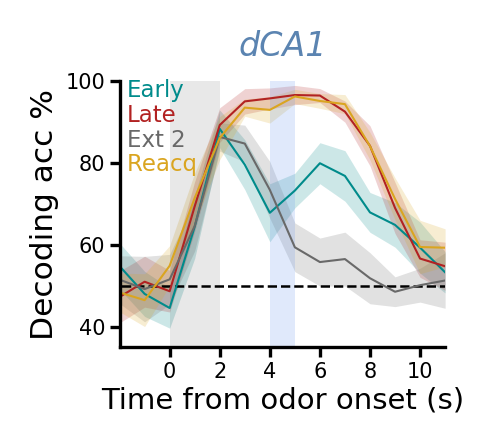

In [879]:
from matplotlib import cm
fig, ax = pl.subplots(1,1, figsize=(2, 1.7))

#for sess,c,sessla in zip(sessions,dark_co,session_labels):
for x in [1,2,4,5]:
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100) for t in range(16)],
            color=dark_co[x],label=session_labels[x])
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_dhpc[sessions[x]][:loops]"%t))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=dark_co[x],linewidth=0)
ax.set_ylim(35, 100)
ax.set_xlim(-2, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
#ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.45,fontsize=5)
ax.text(-1.7,97-1,'Early',color=dark_co[1],fontsize=5.5)
ax.text(-1.7,91-1,'Late',color=dark_co[2],fontsize=5.5)
ax.text(-1.7,85-1,'Ext 2',color=dark_co[4],fontsize=5.5)
ax.text(-1.7,79-1,'Reacq',color=dark_co[5],fontsize=5.5)
fig.tight_layout(pad=2)
ax.set_title('dCA1', color='#5B84B1FF',fontstyle='italic',fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_combined_dhpc.pdf'%NOTEBOOK_NAME)

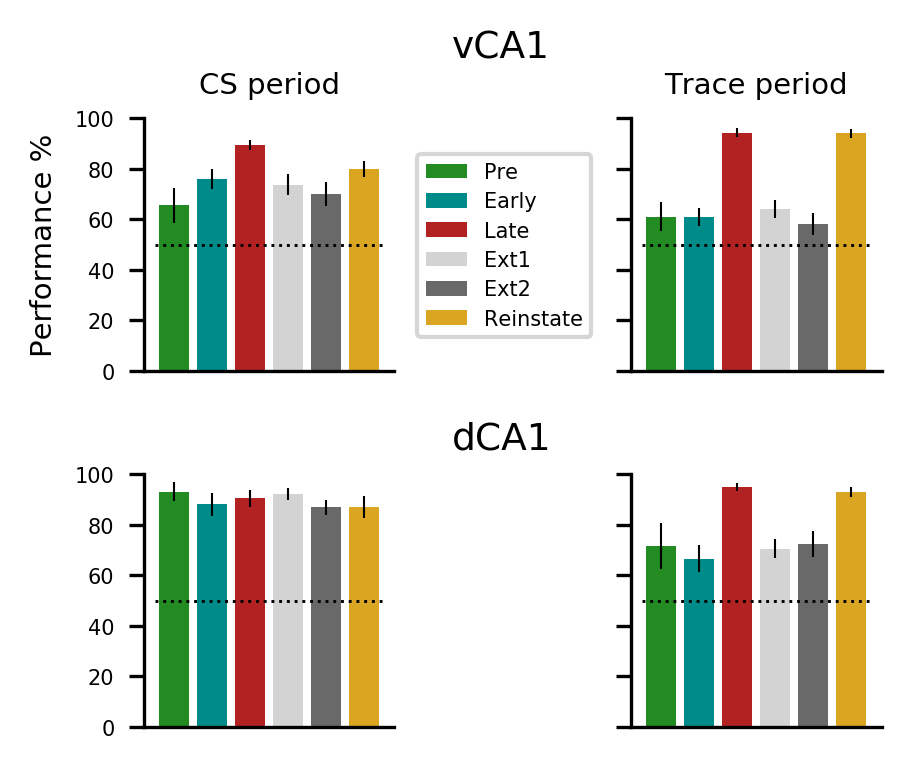

In [16]:
fig, ax = pl.subplots(2,2, figsize=(3, 2.5), sharex=True, sharey=True)

for sess,c,sessla,i in zip(sessions,dark_co,session_labels,range(len(sessions))):
    s = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:30])*100)
    ax[0][0].bar(i,np.mean(mean_scores_gmin_tb_6_vhpc[sess][:30])*100, color=c,label=sessla,yerr=s)
    s = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:30])*100)
    ax[0][1].bar(i,np.mean(mean_scores_gmin_tb_8_vhpc[sess][:30])*100, color=c,label=sessla,yerr=s)
    s = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:30])*100)
    ax[1][0].bar(i,np.mean(mean_scores_gmin_tb_6_dhpc[sess][:30])*100, color=c,label=sessla,yerr=s)
    s = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:30])*100)
    ax[1][1].bar(i,np.mean(mean_scores_gmin_tb_8_dhpc[sess][:30])*100, color=c,label=sessla,yerr=s)
ax[0][0].set_title("CS period")
ax[0][1].set_title("Trace period")
#ax.fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax[0][0].set_ylim(0, 100)

#ax.set_xticks(np.arange(-5,11, 5))
#ax.set_xticklabels(np.arange(-5,11, 5))
ax[0][0].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dotted')
ax[0][1].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dotted')
ax[1][0].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dotted')
ax[1][1].hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dotted')

#ax.set_xlabel('Time from odor onset (s)')
ax[0][0].set_ylabel('Performance %')
ax[0][0].legend(bbox_to_anchor=(1.05,.9),labelspacing=0.45,fontsize=5)
#ax[0].set_title('Expo', color='limegreen')
#ax[1].set_title('Pre', color = 'b')
#ax[2].set_title('Post', color = 'r')
#ax[3].set_title('Ext1', color = 'silver')
#ax[4].set_title('Ext2', color = 'grey')
#ax[5].set_title('Reinstate', color = 'y')
fig.tight_layout(w_pad=11,h_pad=4)
ax[0][0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0][1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1][0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1][1].tick_params(axis='x',bottom=False,labelbottom=False)
pl.text(-5.5,265,"vCA1",fontsize=9)
pl.text(-5.5,110,"dCA1",fontsize=9)


fig.savefig('../img/%s_gmin_bars_vhpc.pdf'%NOTEBOOK_NAME)

### plot dhpc and vhpc on same plot. CS, Tr and US plots

In [42]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'p=%.3f'%(p/mcc) if (.05/mcc)<p<(.1/mcc) else
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [43]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    if lines==True:
        if p < thresh/mcc:
            if np.mean(array1) > np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            if np.mean(array1) < np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color2, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [44]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

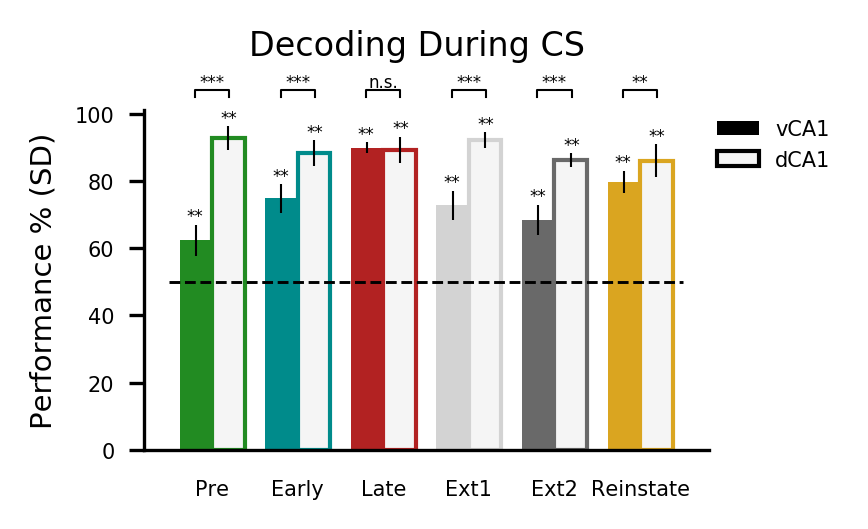

In [20]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=c,yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,107))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

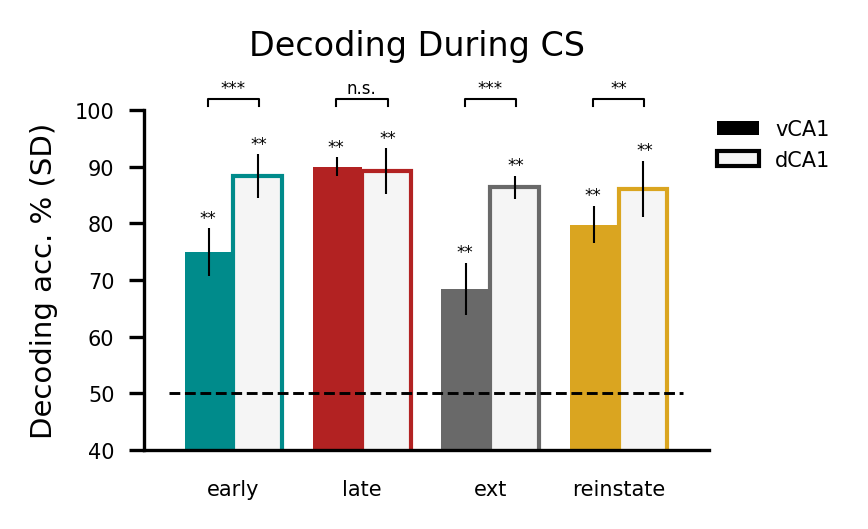

In [21]:
from matplotlib.patches import Patch
labels = ['early','late','ext','reinstate']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for sess,c,i in zip(['pre','post','ext2','renew'],to_plot,range(4)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,3.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['pre','post','ext2','renew'], range(4)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_no_expo.pdf'%NOTEBOOK_NAME)

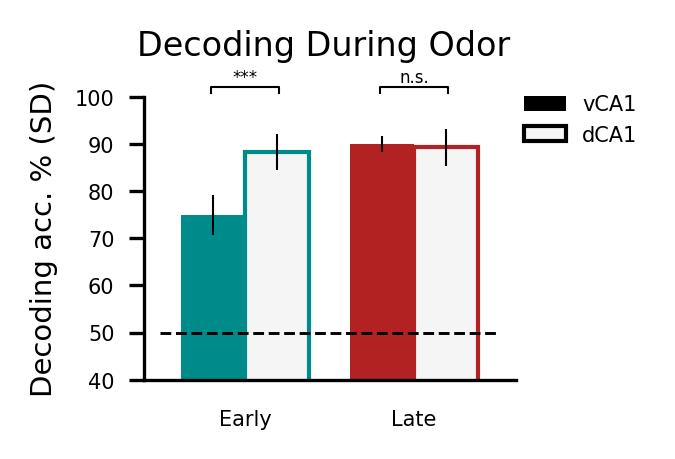

In [673]:
from matplotlib.patches import Patch
labels = ['Early','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2]
fig, ax = pl.subplots(figsize=(1.6,1.25))
for sess,c,i in zip(['pre','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['pre','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Odor',y=1.06,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo_b.pdf'%NOTEBOOK_NAME)

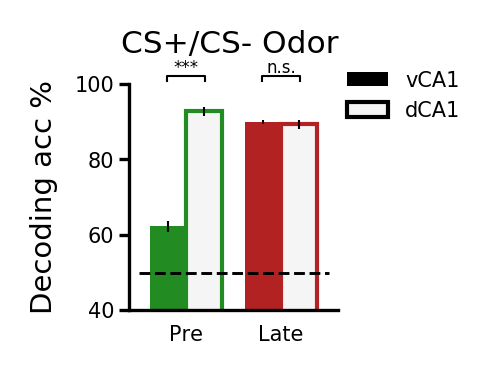

In [693]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Odor',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_b.pdf'%NOTEBOOK_NAME)

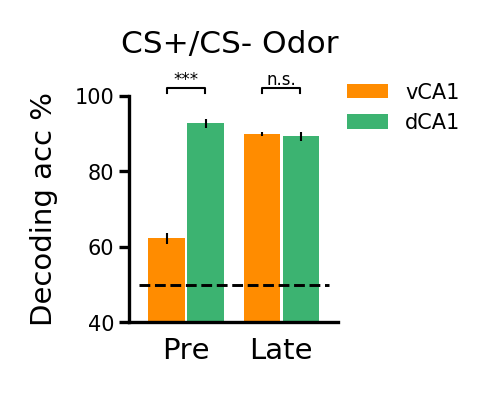

In [865]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2-.015, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color='darkorange',yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2+.015,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='mediumseagreen',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='darkorange'),Patch(facecolor='mediumseagreen')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Odor',y=1.1,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_b.pdf'%NOTEBOOK_NAME)

In [22]:
np.array(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100

array([ 72.75,  63.75,  63.  ,  67.5 ,  63.5 ,  77.  ,  54.5 ,  73.  ,
        70.75,  52.75])

expo U = 0.0 p = 0.000178614488374 r = -0.845154254729
None
post U = 60.0 p = 0.472342387447 r = 0.169030850946
None


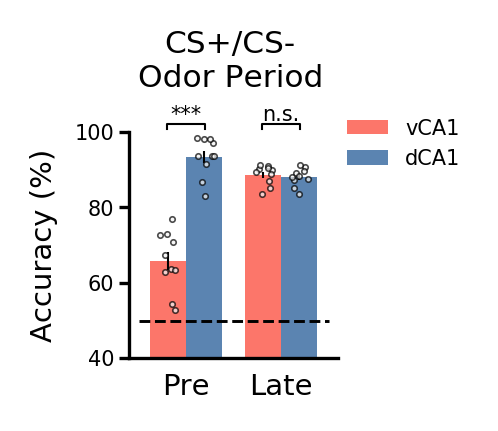

In [29]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color='#FC766AFF',yerr=v[sess])
    ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='#5B84B1FF',yerr=d[sess])
    ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess, report_stats(mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops])
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS-\nOdor Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_b.pdf'%NOTEBOOK_NAME)

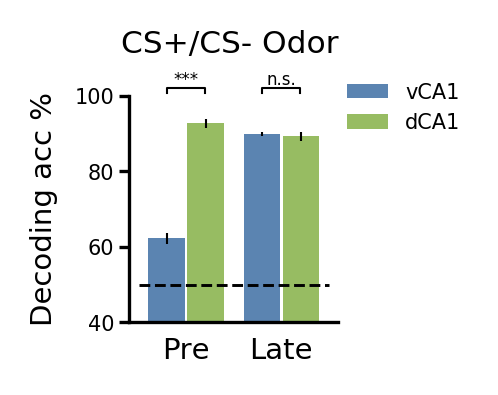

In [869]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2-.015, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color='#5B84B1FF',yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2+.015,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='#97BC62FF',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#5B84B1FF'),Patch(facecolor='#97BC62FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sess][:loops], mean_scores_gmin_tb_6_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Odor',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_b.pdf'%NOTEBOOK_NAME)

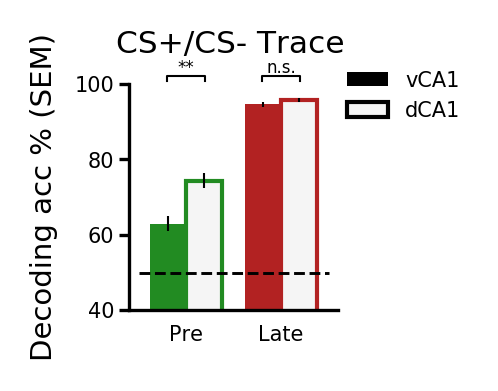

In [694]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color=dark_co[c],yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Trace',y=1.06,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_b.pdf'%NOTEBOOK_NAME)

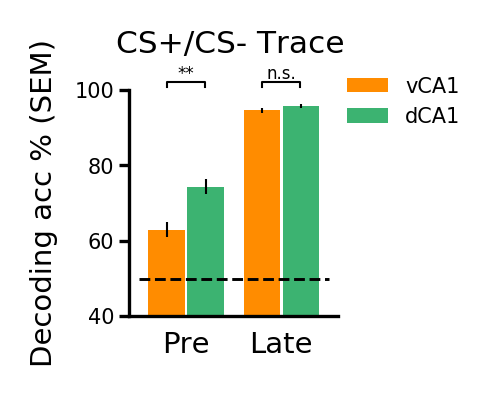

In [854]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2-.015, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color='darkorange',yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2+.015,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='mediumseagreen',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='darkorange'),Patch(facecolor='mediumseagreen')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Trace',y=1.08,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_b.pdf'%NOTEBOOK_NAME)

In [ ]:
'#5B84B1FF','#97BC62FF'

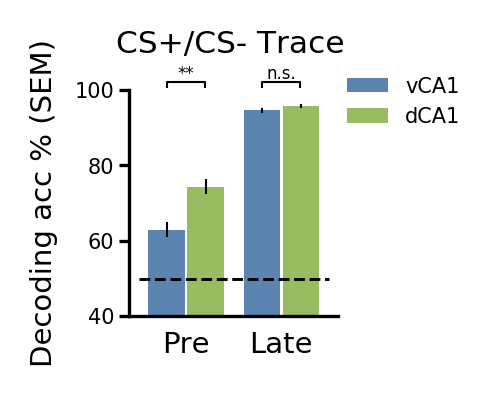

In [868]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2-.015, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color='#5B84B1FF',yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2+.015,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='#97BC62FF',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#5B84B1FF'),Patch(facecolor='#97BC62FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- Trace',y=1.08,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_b.pdf'%NOTEBOOK_NAME)

expo U = 12.0 p = 0.00458639208025 r = -0.642317233594
None
post U = 32.0 p = 0.184550939435 r = -0.304255531702
None


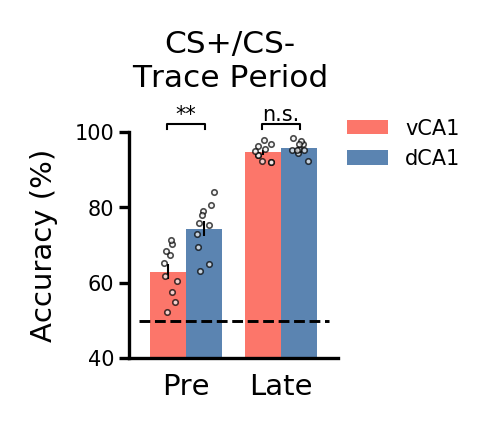

In [59]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],to_plot,range(2)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color='#FC766AFF',yerr=v[sess])
    ax.scatter(i-width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='#5B84B1FF',yerr=d[sess])
    ax.scatter(i+width/2+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess, report_stats(mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops])

pl.suptitle('CS+/CS-\nTrace Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_b.pdf'%NOTEBOOK_NAME)

In [36]:
new_dark_co = ["#080f0f","#a4bab7","#eff2c0","#bea57d"]

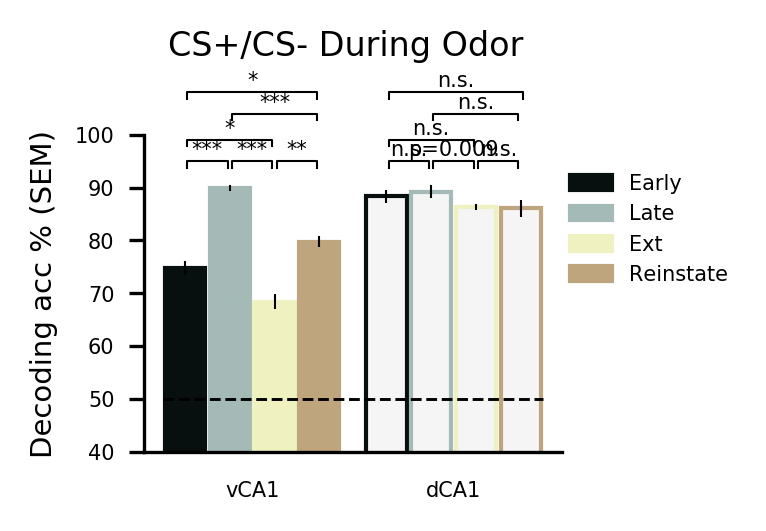

In [60]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],range(4),range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=new_dark_co[c],edgecolor=new_dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 4.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=new_dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,95,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,95,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,99+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[3]][:loops],
        .05,2.95,108,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[3]][:loops],
        4.55,7.55,108,mcc=3))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- During Odor',y=1.13,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_no_expo_10_loop.pdf'%NOTEBOOK_NAME)

vCA1: pre post U = 0.0 p = 0.000541904162423 r = -0.845154254729
None
dCA1: pre post U = 42.0 p = 1.7113814187 r = -0.135224680757
None
vCA1: post ext2 U = 100.0 p = 0.000541904162423 r = 0.845154254729
None
dCA1: post ext2 U = 79.5 p = 0.0847398639432 r = 0.49864101029
None
vCA1: ext2 renew U = 2.5 p = 0.00112012624415 r = -0.802896541992
None
dCA1: ext2 renew U = 42.0 p = 1.71094588793 r = -0.135224680757
None
vCA1: pre ext2 U = 83.5 p = 0.0375340481498 r = 0.566253350668
None
dCA1: pre ext2 U = 70.5 p = 0.389973666104 r = 0.346513244439
None
vCA1: post renew U = 99.0 p = 0.000726521357216 r = 0.828251169634
None
dCA1: post renew U = 74.0 p = 0.225664996044 r = 0.40567404227
None
vCA1: pre renew U = 13.5 p = 0.0187878574505 r = -0.616962605952
None
dCA1: pre renew U = 62.5 p = 1.09032806101 r = 0.211288563682
None


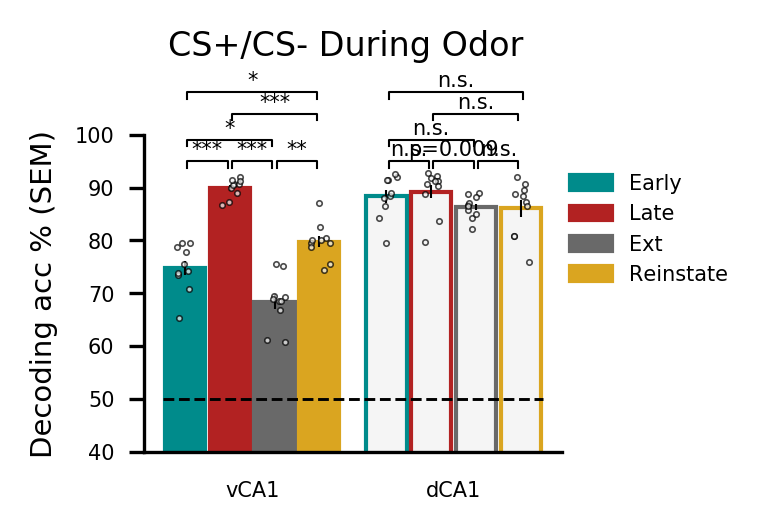

In [66]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],to_plot,range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 4.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
    ax.scatter(i+4.5+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,95,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,95,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,99+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[3]][:loops],
        .05,2.95,108,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[3]][:loops],
        4.55,7.55,108,mcc=3))

for i in range(3):
    print 'vCA1:',sessi[i],sessi[i+1],report_stats(mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        mcc=3)
    print 'dCA1:',sessi[i],sessi[i+1],report_stats(mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        mcc=3)
for i in range(2):
    print 'vCA1:',sessi[i],sessi[i+2],report_stats(mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+2]][:loops],
        mcc=3)
    print 'dCA1:',sessi[i],sessi[i+2],report_stats(mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+2]][:loops],
        mcc=3)
    
print 'vCA1:',sessi[0],sessi[3],report_stats(mean_scores_gmin_tb_6_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[3]][:loops],
        mcc=3)
print 'dCA1:',sessi[0],sessi[3],report_stats(mean_scores_gmin_tb_6_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[3]][:loops],
        mcc=3)
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- During Odor',y=1.13,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_CS_no_expo_10_loop.pdf'%NOTEBOOK_NAME)

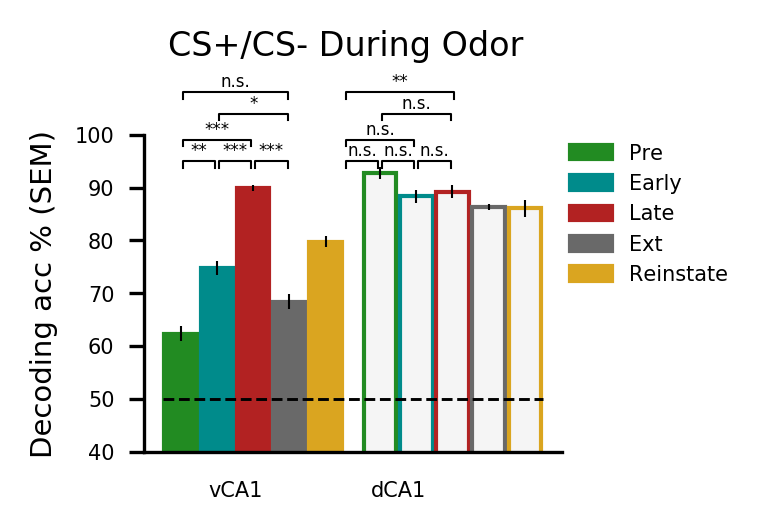

In [712]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,1,2,4,5]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','ext2','renew'],to_plot,range(5),['Pre','Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 5.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,10, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['expo','pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,95,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,95,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,99+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[3]][:loops],
        .05,2.95,108,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[3]][:loops],
        4.55,7.55,108,mcc=3))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/CS- During Odor',y=1.13,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_no_expo_10_loop.pdf'%NOTEBOOK_NAME)

vCA1: pre post U = 0.0 p = 0.000544953438274 r = -0.845154254729
None
dCA1: pre post U = 0.0 p = 0.000529833035007 r = -0.845154254729
None
vCA1: post ext2 U = 100.0 p = 0.000544953438274 r = 0.845154254729
None
dCA1: post ext2 U = 100.0 p = 0.000541904162423 r = 0.845154254729
None
vCA1: ext2 renew U = 0.0 p = 0.000544953438274 r = -0.845154254729
None
dCA1: ext2 renew U = 0.0 p = 0.000548015373329 r = -0.845154254729
None
vCA1: pre ext2 U = 58.5 p = 1.63559553054 r = 0.143676223304
None
dCA1: pre ext2 U = 26.0 p = 0.225664996044 r = -0.40567404227
None
vCA1: post renew U = 46.5 p = 2.46079030173 r = -0.059160797831
None
dCA1: post renew U = 80.5 p = 0.0690930908692 r = 0.515544095384
None
vCA1: pre renew U = 0.0 p = 0.000544953438274 r = -0.845154254729
None
dCA1: pre renew U = 0.0 p = 0.000535843465121 r = -0.845154254729
None


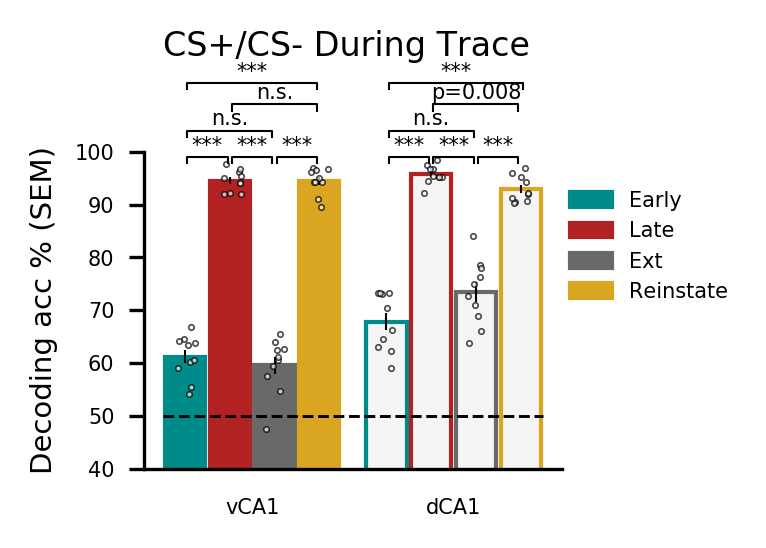

In [68]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],to_plot,range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    ax.scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 4.5,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
    ax.scatter(i+4.5+np.random.random(loops)*width/2-width/4.5,np.array(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,99,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,99,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,104+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,104+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[3]][:loops],
        .05,2.95,113,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[3]][:loops],
        4.55,7.55,113,mcc=3))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
    
for i in range(3):
    print 'vCA1:',sessi[i],sessi[i+1],report_stats(mean_scores_gmin_tb_8_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[i+1]][:loops],
        mcc=3)
    print 'dCA1:',sessi[i],sessi[i+1],report_stats(mean_scores_gmin_tb_8_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[i+1]][:loops],
        mcc=3)
for i in range(2):
    print 'vCA1:',sessi[i],sessi[i+2],report_stats(mean_scores_gmin_tb_8_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[i+2]][:loops],
        mcc=3)
    print 'dCA1:',sessi[i],sessi[i+2],report_stats(mean_scores_gmin_tb_8_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[i+2]][:loops],
        mcc=3)
    
print 'vCA1:',sessi[0],sessi[3],report_stats(mean_scores_gmin_tb_8_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[3]][:loops],
        mcc=3)
print 'dCA1:',sessi[0],sessi[3],report_stats(mean_scores_gmin_tb_8_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[3]][:loops],
        mcc=3)

pl.suptitle('CS+/CS- During Trace',y=1.17,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_no_expo_10_loops.pdf'%NOTEBOOK_NAME)

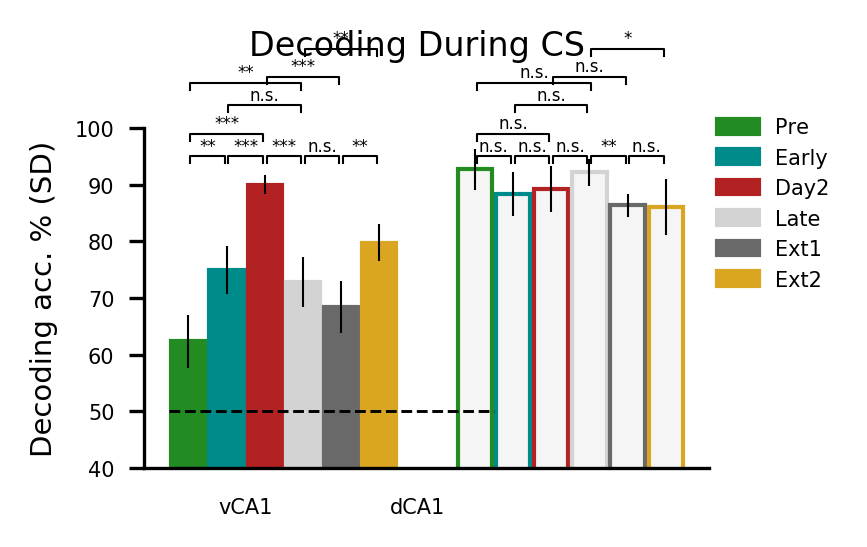

In [26]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = sessions
fig, ax = pl.subplots()
for sess,i,lab in zip(sessions,range(len(sessions)),session_labels_b):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[i],edgecolor=dark_co[i],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100)
    ax.bar(i + 7.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[i],yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for i in range(len(sessions)-1):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessions[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessions[i+1]][:loops],
        i+.05,i+.95,95,mcc=5))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessions[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessions[i+1]][:loops],
        i+7.55,i+8.45,95,mcc=5))
for i in range(len(sessions)-2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessions[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessions[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=5))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessions[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessions[i+2]][:loops],
        i+7.55,i+9.45,99+i*5,mcc=5))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessions[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessions[3]][:loops],
        .05,2.95,108,mcc=5))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessions[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessions[3]][:loops],
        7.55,10.55,108,mcc=5))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS',y=1.1,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_no_expo.jpg'%NOTEBOOK_NAME)

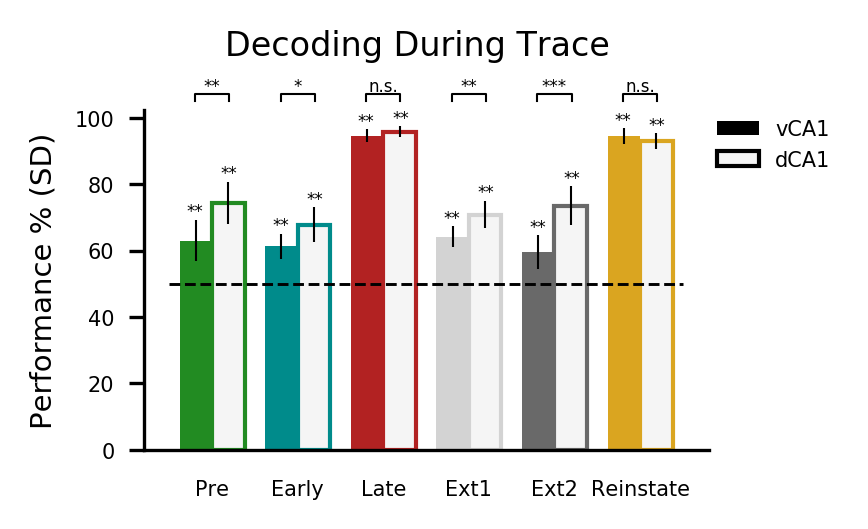

In [27]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color=c,yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,107))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
               np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
               np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_Trace_all.pdf'%NOTEBOOK_NAME)

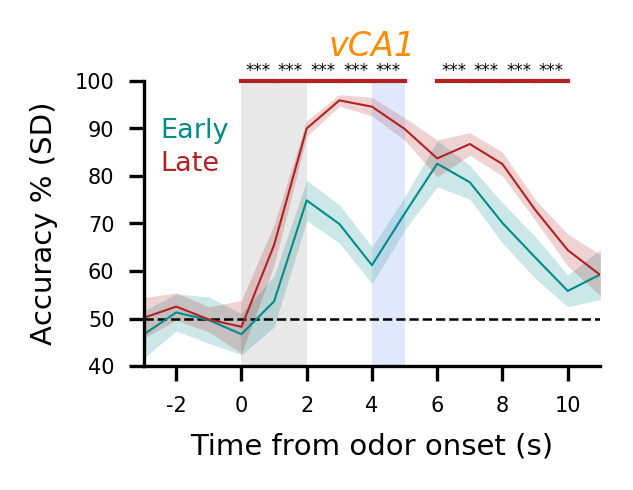

In [329]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for sess,co,la in zip(['pre','post'],[dark_co[1],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Accuracy % (SD)')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,88,'Early',color=dark_co[1],fontsize=6.5)
ax.text(-2.5,81,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PrPo_vCA1.pdf'%NOTEBOOK_NAME)

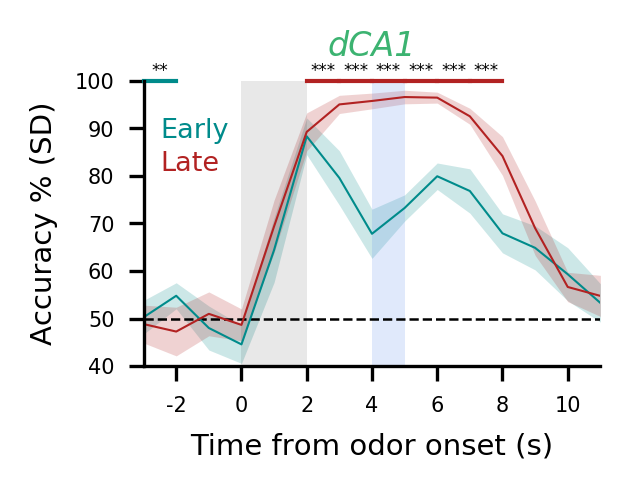

In [330]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for sess,co,la in zip(['pre','post'],[dark_co[1],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_dhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Accuracy % (SD)')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,88,'Early',color=dark_co[1],fontsize=6.5)
ax.text(-2.5,81,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PrPo_dCA1.pdf'%NOTEBOOK_NAME)

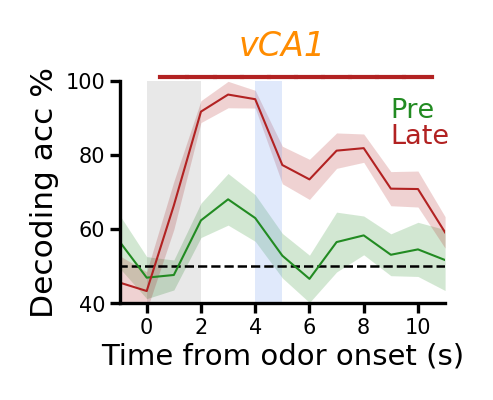

In [691]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for sess,phase,co,la in zip(['expo','post'],['','_Trials31to60'],[dark_co[0],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(4,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_Trials31to60_vhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[0],color2=dark_co[2],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(9,90,'Pre',color=dark_co[0],fontsize=6.5)
ax.text(9,83,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExPo_vCA1.pdf'%NOTEBOOK_NAME)

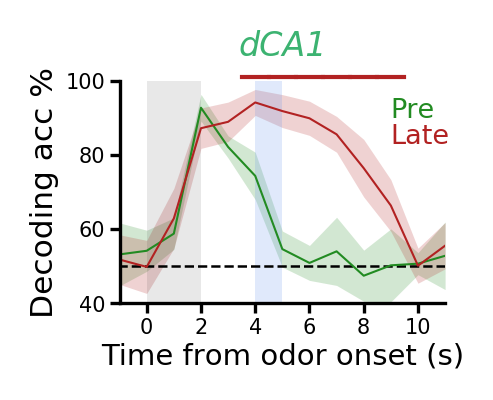

In [689]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for sess,phase,co,la in zip(['expo','post'],['','_Trials31to60'],[dark_co[0],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_Trials31to60_dhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[0],color2=dark_co[2],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(9,90,'Pre',color=dark_co[0],fontsize=6.5)
ax.text(9,83,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExPo_dCA1.pdf'%NOTEBOOK_NAME)

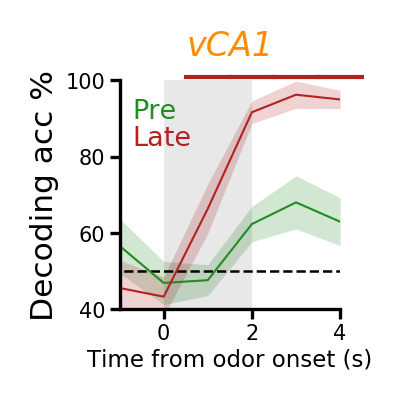

In [768]:
fig, ax = pl.subplots(1,1,figsize=(1.65, 1.7))

for sess,phase,co,la in zip(['expo','post'],['','_Trials31to60'],[dark_co[0],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(9)], [(np.mean(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100) for t in range(9)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100) for t in range(9)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s%s_vhpc[sess][:10]"%(t,phase)))*100 for t in range(9)])
    ax.fill_between([(t-4) for t in range(9)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(4,9):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_Trials31to60_vhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[0],color2=dark_co[2],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 4)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,5, 2))
ax.set_xticklabels(np.arange(0,5, 2))
ax.hlines(50, -3,4, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1,fontsize=5.5)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-0.7,90,'Pre',color=dark_co[0],fontsize=6.5)
ax.text(-0.7,83,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExPo_noUS_vCA1.pdf'%NOTEBOOK_NAME)

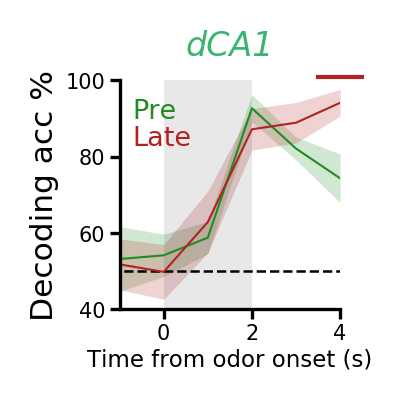

In [766]:
fig, ax = pl.subplots(1,1,figsize=(1.65, 1.7))

for sess,phase,co,la in zip(['expo','post'],['','_Trials31to60'],[dark_co[0],dark_co[2]],['Early','Late']):
    ax.plot([(t-4) for t in range(9)], [(np.mean(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100) for t in range(9)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100) for t in range(9)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s%s_dhpc[sess][:10]"%(t,phase)))*100 for t in range(9)])
    ax.fill_between([(t-4) for t in range(9)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(4,9):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_Trials31to60_dhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[0],color2=dark_co[2],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 4)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,5, 2))
ax.set_xticklabels(np.arange(0,5, 2))
ax.hlines(50, -3,4, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1,fontsize=5.5)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
#pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-0.7,90,'Pre',color=dark_co[0],fontsize=6.5)
ax.text(-0.7,83,'Late',color=dark_co[2],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExPo_noUS_dCA1.pdf'%NOTEBOOK_NAME)

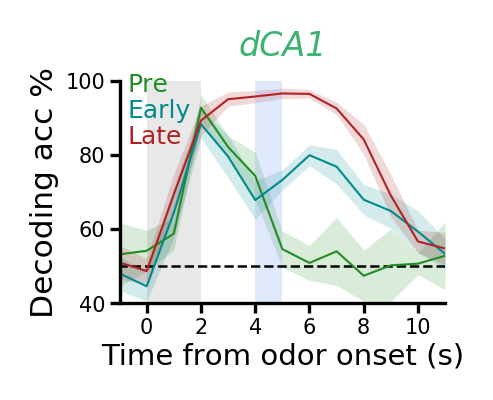

In [809]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for sess,co,la,sty in zip(['expo','pre','post'],[dark_co[0],dark_co[1],dark_co[2]],['Pre','Early','Late'],['-','-','-']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)],
            color=co,label=la,linestyle=sty)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.17,color=co,linewidth=0)
#for t in range(1,16):
#    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_dhpc['post'][:10]"%t),
#                         t-4.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
#    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-.7,97,'Pre',color=dark_co[0],fontsize=6)
ax.text(-.7,90,'Early',color=dark_co[1],fontsize=6)
ax.text(-.7,83,'Late',color=dark_co[2],fontsize=6)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_BaPrPo_dCA1.pdf'%NOTEBOOK_NAME)

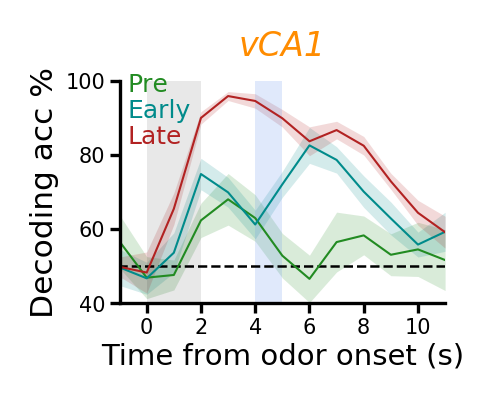

In [808]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for sess,co,la,sty in zip(['expo','pre','post'],[dark_co[0],dark_co[1],dark_co[2]],['Pre','Early','Late'],['-','-','-']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)],
            color=co,label=la,linestyle=sty)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.17,color=co,linewidth=0)
#for t in range(1,16):
#    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['post'][:10]"%t),
#                         t-4.5, t-3.5, 100,color1=dark_co[1],color2=dark_co[2],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
#    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-.7,97,'Pre',color=dark_co[0],fontsize=6)
ax.text(-.7,90,'Early',color=dark_co[1],fontsize=6)
ax.text(-.7,83,'Late',color=dark_co[2],fontsize=6)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_BaPrPo_vCA1.pdf'%NOTEBOOK_NAME)

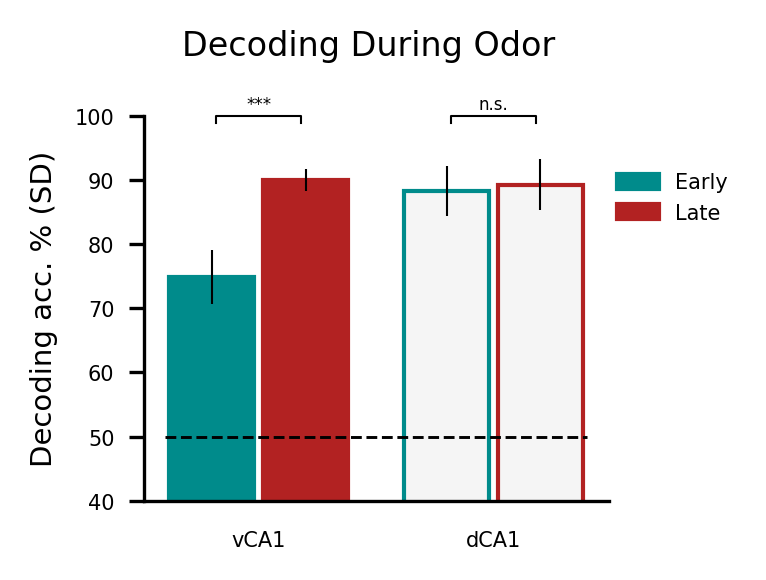

In [323]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots(figsize=(2,1.7))
for sess,c,i,lab in zip(['pre','post'],to_plot,range(2),['Early','Late']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100)
    ax.bar(i + 2.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.7),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post']
for i in range(1):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=1))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        i+2.55,i+3.45,100,mcc=1))

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Odor',y=1.05,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo.pdf'%NOTEBOOK_NAME)

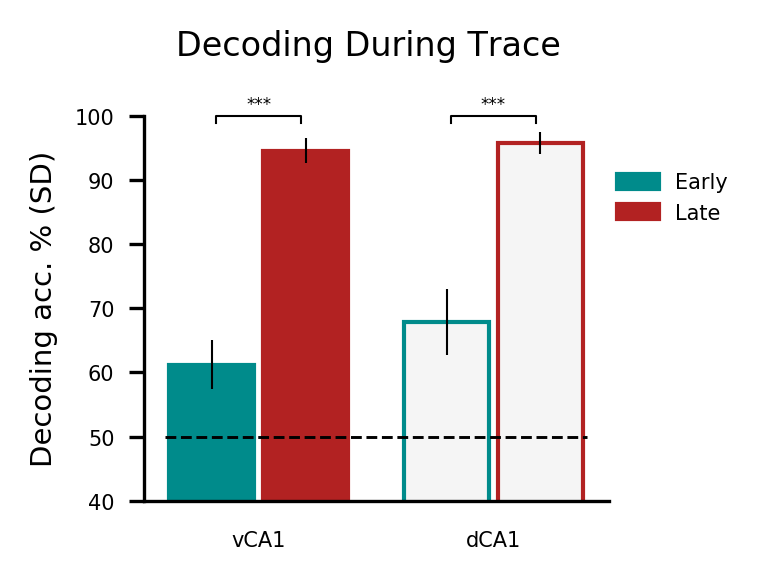

In [324]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots(figsize=(2,1.7))
for sess,c,i,lab in zip(['pre','post'],to_plot,range(2),['Early','Late']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100)
    ax.bar(i + 2.5,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([.5,3])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.7),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post']
for i in range(1):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=1))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_8_dhpc[sessi[i+1]][:loops],
        i+2.55,i+3.45,100,mcc=1))

        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace',y=1.05,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_PrPo.pdf'%NOTEBOOK_NAME)

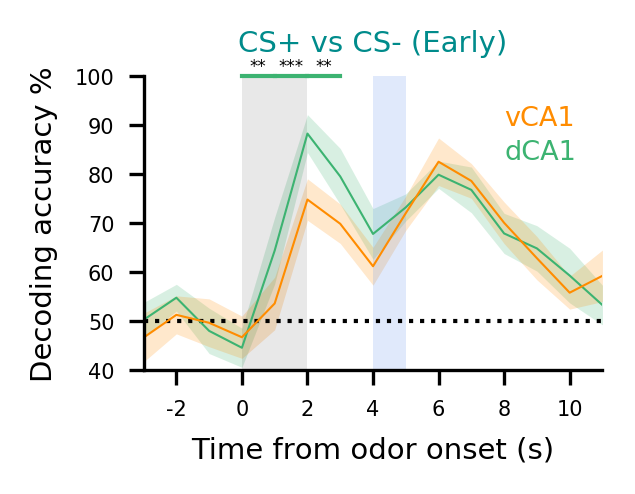

In [332]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for r,sess in zip(range(1),['pre']):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(16)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(16)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(16)])
        ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    #for t in range(16):
    #    if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-4.25,97,'*',fontsize=5, color='mediumseagreen')
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-4.25,97,'*',fontsize=5, color='darkorange')
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['pre'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['pre'][:10]"%t),
                         t-4.5, t-3.5, 100,color1='mediumseagreen',color2='darkorange',thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Decoding accuracy %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(8,90,'vCA1',color='darkorange',fontsize=6.5)
ax.text(8,83,'dCA1',color='mediumseagreen',fontsize=6.5)
ax.set_title('CS+ vs CS- (Early)', color=dark_co[1])
#ax.legend(bbox_to_anchor=(.68, .7),labelspacing=0.4,fontsize=5,frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_early_dVSv.pdf'%NOTEBOOK_NAME)

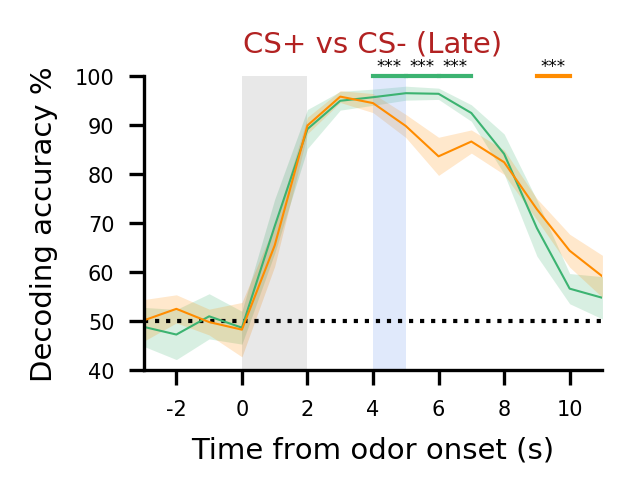

In [331]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for r,sess in zip(range(1),['post']):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(16)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(16)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(16)])
        ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['post'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['post'][:10]"%t),
                         t-4.5, t-3.5, 100,color1='mediumseagreen',color2='darkorange',thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Decoding accuracy %')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.set_title('CS+ vs CS- (Late)', color=dark_co[2])
#ax.legend(bbox_to_anchor=(.68, .7),labelspacing=0.4,fontsize=5,frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_late_dVSv.pdf'%NOTEBOOK_NAME)

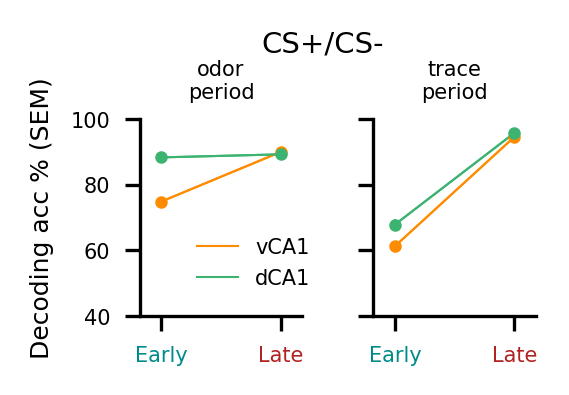

In [730]:
fig,ax = pl.subplots(1,2,figsize=(2,1.3),sharex=True,sharey=True)
v={}
d={}
loops=10
expectations = 'pre','post'

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100 for ex in expectations],color='darkorange',label='vCA1')
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100 for ex in expectations],color='mediumseagreen',label='dCA1')
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            v[ex+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100), 'o', color='darkorange',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100),yerr=v[ex+tb_la],color='darkorange')  
            d[ex+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100), 'o', color='mediumseagreen',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100),yerr=d[ex+tb_la],color='mediumseagreen')  
            

           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[0].set_ylabel('Decoding acc % (SEM)',fontsize=6)
            ax[x].set_ylim(40,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la+"\nperiod",y=.98,fontsize=5)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Early','Late'])
            [t.set_color(i) for (i,t) in zip([dark_co[1],dark_co[2]],ax[x].xaxis.get_ticklabels())]
ax[0].legend(labels=['vCA1','dCA1'],frameon=False, loc=(.3,.1))
pl.suptitle('CS+/CS-',fontsize=7,x=.55,y=.97)

##I think something is wrong below
#pvs=[]
#for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
#    for ex,z in zip(expectations,(.2,1.3,)):
#        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
#                    mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)),
#                    eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
#                    max((np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
#                    (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+2,
#                    ticksize=0))
##        for d in range(3):
##            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
##                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
##        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
#    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
#    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#
fig.tight_layout(pad=1)

fig.savefig('../final-ish figures/%s_gmin_PrPo_dots.pdf'%NOTEBOOK_NAME)

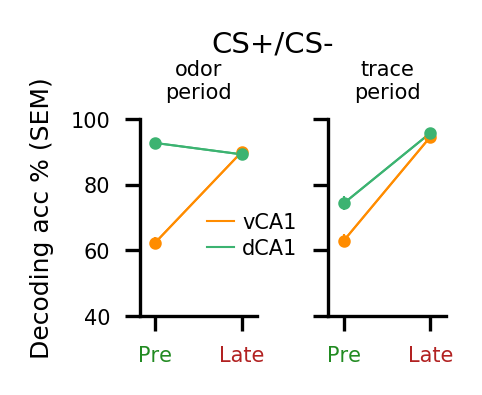

In [749]:
fig,ax = pl.subplots(1,2,figsize=(1.7,1.3),sharex=True,sharey=True)
v={}
d={}
loops=10
expectations = 'expo','post'

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100 for ex in expectations],color='darkorange',label='vCA1')
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100 for ex in expectations],color='mediumseagreen',label='dCA1')
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            v[ex+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100), 'o', color='darkorange',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex][:loops]"%(tb)))*100),yerr=v[ex+tb_la],color='darkorange')  
            d[ex+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100), 'o', color='mediumseagreen',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex][:loops]"%(tb)))*100),yerr=d[ex+tb_la],color='mediumseagreen')  
            

           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[0].set_ylabel('Decoding acc % (SEM)',fontsize=6)
            ax[x].set_ylim(40,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la+"\nperiod",y=.98,fontsize=5)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Pre','Late'])
            [t.set_color(i) for (i,t) in zip([dark_co[0],dark_co[2]],ax[x].xaxis.get_ticklabels())]
ax[0].legend(labels=['vCA1','dCA1'],frameon=False, loc=(.5,.25),labelspacing=.3,handletextpad=0.4,handlelength=1.3)
pl.suptitle('CS+/CS-',fontsize=7,x=.55,y=.97)

##I think something is wrong below
#pvs=[]
#for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
#    for ex,z in zip(expectations,(.2,1.3,)):
#        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
#                    mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)),
#                    eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
#                    max((np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
#                    (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
#                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+2,
#                    ticksize=0))
##        for d in range(3):
##            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
##                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
##        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
#    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
#    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#
fig.tight_layout(pad=1)

fig.savefig('../final-ish figures/%s_gmin_ExPo_dots.pdf'%NOTEBOOK_NAME)

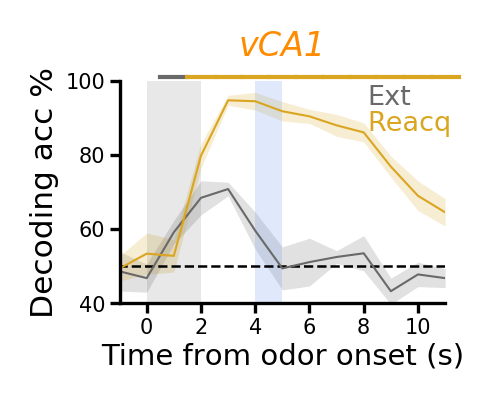

In [704]:
fig, ax = pl.subplots(1,1,figsize=(2,1.7))

for sess,co,la in zip(['ext2','renew'],[dark_co[4],dark_co[-1]],['Ext','Reacq']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['ext2'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['renew'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[4],color2=dark_co[-1],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(8.15,93.5,'Ext',color=dark_co[4],fontsize=6.5)
ax.text(8.15,86.5,'Reacq',color=dark_co[-1],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExRe_vCA1.pdf'%NOTEBOOK_NAME)

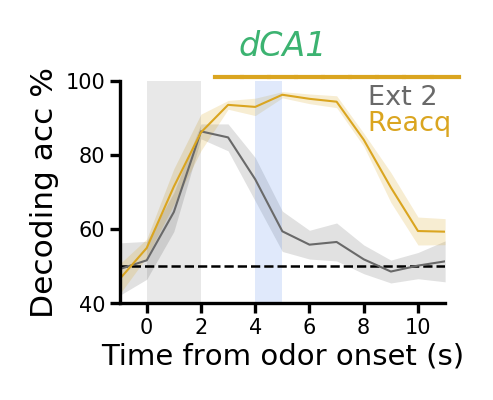

In [788]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for sess,co,la in zip(['ext2','renew'],[dark_co[4],dark_co[-1]],['Ext','Reacq']):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,label=la)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['ext2'][:10]"%t), eval("mean_scores_gmin_tb_%s_dhpc['renew'][:10]"%t),
                         t-4.5, t-3.5, 101,color1=dark_co[4],color2=dark_co[-1],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-1, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(8.15,93.5,'Ext 2',color=dark_co[4],fontsize=6.5)
ax.text(8.15,86.5,'Reacq',color=dark_co[-1],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_ExRe_dCA1.pdf'%NOTEBOOK_NAME)

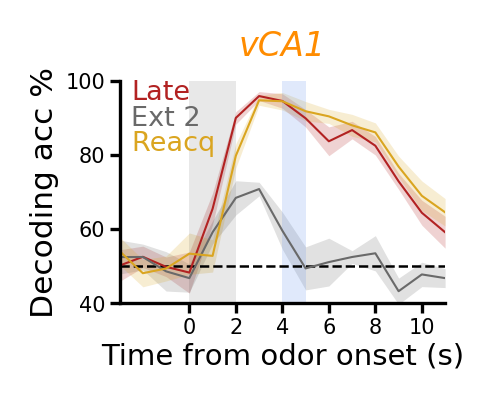

In [787]:
fig, ax = pl.subplots(1,1,figsize=(2,1.7))

for sess,co,la,sty,al in zip(['post','ext2','renew'],[dark_co[2],dark_co[4],dark_co[-1]],['Late','Ext','Reacq'],
                          ['-','-','-'],[.2,.2,.2]):    
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,
            label=la,linestyle=sty)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=al,color=co,linewidth=0)
#for t in range(1,16):
#    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_vhpc['ext2'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['renew'][:10]"%t),
#                         t-4.5, t-3.5, 101,color1=dark_co[4],color2=dark_co[-1],thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,11, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,95,'Late',color=dark_co[2],fontsize=6.5)
ax.text(-2.5,88,'Ext 2',color=dark_co[4],fontsize=6.5)
ax.text(-2.5,81,'Reacq',color=dark_co[-1],fontsize=6.5)
ax.set_title('vCA1', color='darkorange',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PoExRe_vCA1.pdf'%NOTEBOOK_NAME)

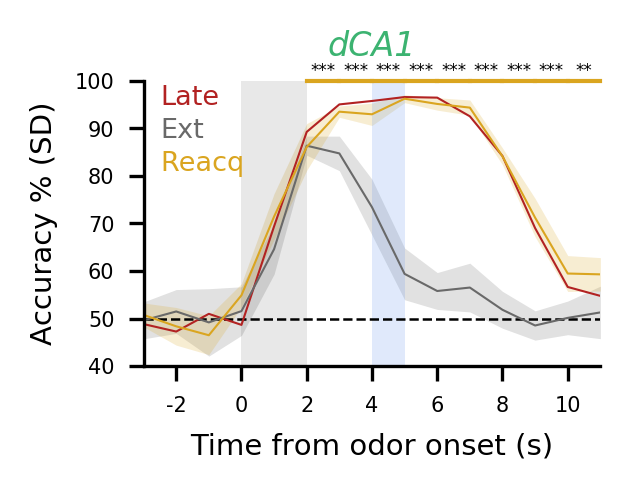

In [440]:
fig, ax = pl.subplots(1,1,figsize=(2.5, 2))

for sess,co,la,sty,al in zip(['post','ext2','renew'],[dark_co[2],dark_co[4],dark_co[-1]],['Late','Ext','Reacq'],
                          ['-','-','-'],[0,.2,.2]):
    ax.plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)], color=co,
            label=la,linestyle=sty)
    m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100) for t in range(16)])
    s = np.array([np.std(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%(t)))*100 for t in range(16)])
    ax.fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=al,color=co,linewidth=0)
for t in range(1,16):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['ext2'][:10]"%t), eval("mean_scores_gmin_tb_%s_dhpc['renew'][:10]"%t),
                         t-4.5, t-3.5, 100,color1=dark_co[4],color2=dark_co[-1],thresh=.01,lines=True,stars=True,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
    #add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
ax.set_ylim(40, 100)
ax.set_xlim(-3, 11)
ax.set_xticks(np.arange(-2,11, 2))
ax.set_xticklabels(np.arange(-2,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Accuracy % (SD)')
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.text(-2.5,95,'Late',color=dark_co[2],fontsize=6.5)
ax.text(-2.5,88,'Ext',color=dark_co[4],fontsize=6.5)
ax.text(-2.5,81,'Reacq',color=dark_co[-1],fontsize=6.5)
ax.set_title('dCA1', color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.legend(loc=(.02,.66),frameon=False)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_PoExRe_dCA1.pdf'%NOTEBOOK_NAME)

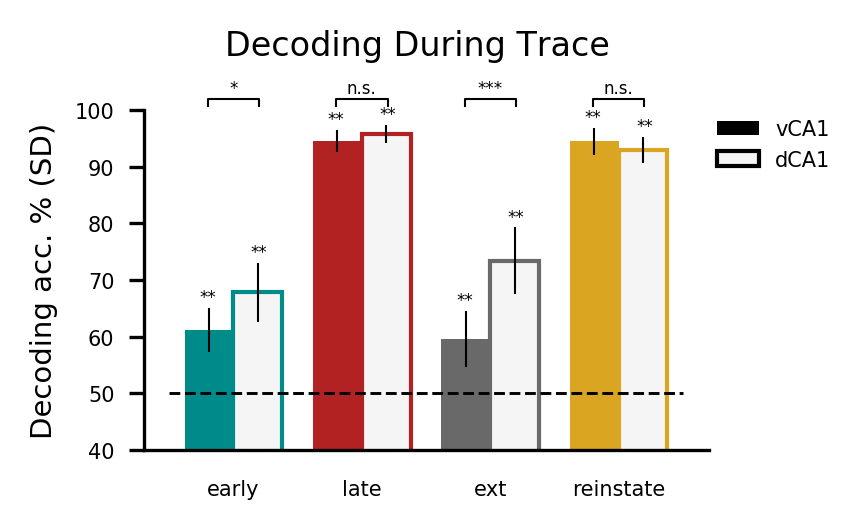

In [31]:
from matplotlib.patches import Patch
labels = ['early','late','ext','reinstate']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for sess,c,i in zip(['pre','post','ext2','renew'],to_plot,range(4)):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100, width, color=dark_co[c],yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,3.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['pre','post','ext2','renew'], range(4)):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[sess][:loops], mean_scores_gmin_tb_8_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
               np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
               np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_Tr_no_expo.pdf'%NOTEBOOK_NAME)

/home/fabios/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


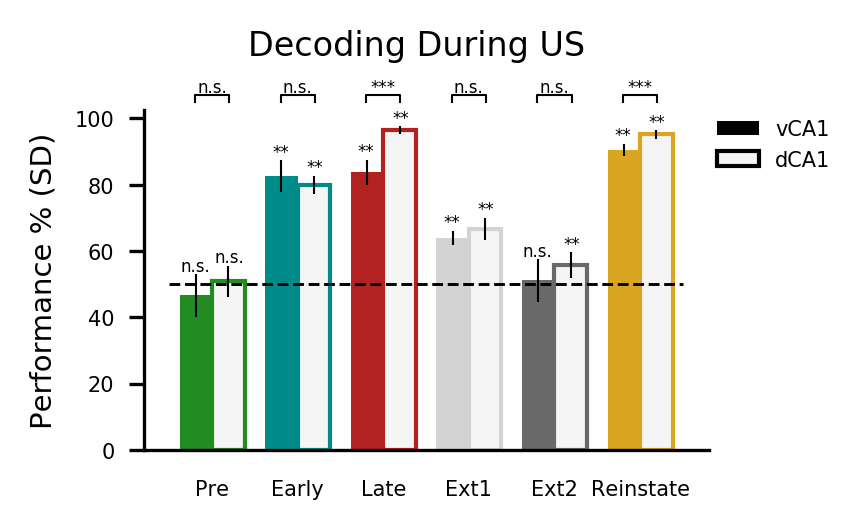

In [32]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100, width, color=c,yerr=v[sess])
    d[sess] = np.array(np.std(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,5.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_10_vhpc[sess][:loops], mean_scores_gmin_tb_10_dhpc[sess][:loops],
        -.2+i,0.2+i,107))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_vhpc[sess][:loops],.5,-.2+i,
               np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
               np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During US',y=1.06,fontsize=8)

fig.savefig('../img/%s_gmin_bars_US_all.pdf'%NOTEBOOK_NAME)

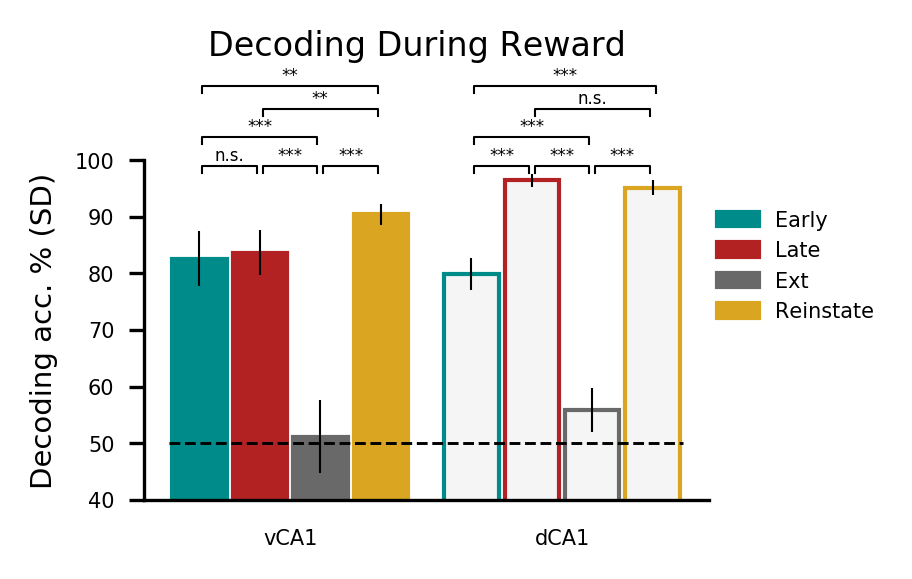

In [33]:
from matplotlib.patches import Patch
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for sess,c,i,lab in zip(['pre','post','ext2','renew'],to_plot,range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100)
    ax.bar(i + 4.5,  np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_10_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_10_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,99,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_10_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_10_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,99,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_10_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_10_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,104+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_10_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_10_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,104+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_10_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_10_vhpc[sessi[3]][:loops],
        .05,2.95,113,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_10_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_10_dhpc[sessi[3]][:loops],
        4.55,7.55,113,mcc=3))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Reward',y=1.17,fontsize=8)

fig.savefig('../img/%s_gmin_bars_US_no_expo_10_loops.jpg'%NOTEBOOK_NAME)

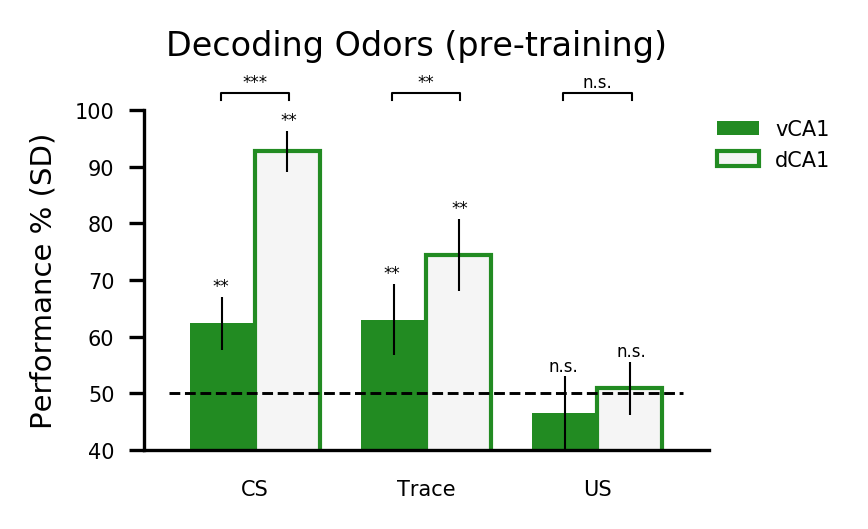

In [34]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(3)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots()
for per,c,i in zip((6,8,10),dark_co,range(3)):
    v[per] = np.array(np.std(eval("mean_scores_gmin_tb_%s_vhpc['expo']"%per)[:loops])*100)
    ax.bar(i - width/2, np.mean(eval("mean_scores_gmin_tb_%s_vhpc['expo']"%per)[:loops])*100, width, color=dark_co[0],yerr=v[per])
    d[per] = np.array(np.std(eval("mean_scores_gmin_tb_%s_dhpc['expo']"%per)[:loops])*100)
    ax.bar(i + width/2,  np.mean(eval("mean_scores_gmin_tb_%s_dhpc['expo']"%per)[:loops])*100, width,color='whitesmoke', edgecolor=dark_co[0],yerr=d[per])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(['CS','Trace','US'])
ax.legend([Patch(facecolor=dark_co[0]),Patch(facecolor='whitesmoke',edgecolor=dark_co[0])],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for per,i in zip((6,8,10), range(3)):
    pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_vhpc['expo']"%per)[:loops], eval("mean_scores_gmin_tb_%s_dhpc['expo']"%per)[:loops],
        -.2+i,0.2+i,103))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
    pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_%s_vhpc['expo']"%per)[:loops],.5,-.2+i,
               np.mean(eval("mean_scores_gmin_tb_%s_vhpc['expo']"%per)[:loops])*100+v[per]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_%s_dhpc['expo']"%per)[:loops],.5, .2+i,
               np.mean(eval("mean_scores_gmin_tb_%s_dhpc['expo']"%per)[:loops])*100+d[per]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Odors (pre-training)',y=1.06,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_expo_10_loops.pdf'%NOTEBOOK_NAME)

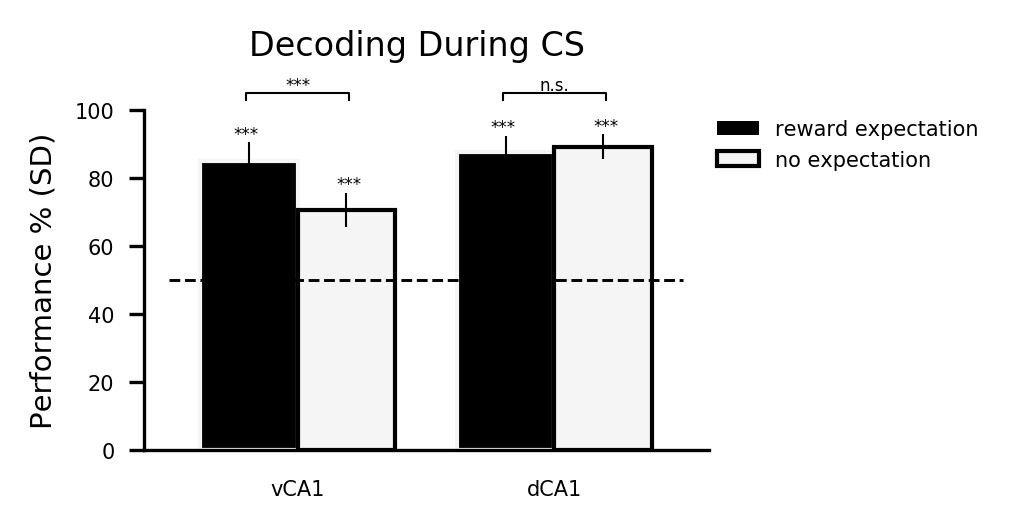

In [36]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
ex = ('post','renew'),('ext1','ext2')
fig, ax = pl.subplots()
v[ex[0]] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[0][1]][:loops])*100)
ax.bar(0 - width/2, np.mean(mean_scores_gmin_tb_6_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[0][1]][:loops])*100,
       width, color='k',edgecolor='whitesmoke',yerr=v[ex[0]])
d[ex[0]] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[0][1]][:loops])*100)
ax.bar(1 - width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[0][1]][:loops])*100,
       width,color='k',edgecolor='whitesmoke',yerr=d[ex[0]])
v[ex[1]] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[1][1]][:loops])*100)
ax.bar(0 + width/2, np.mean(mean_scores_gmin_tb_6_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[1][1]][:loops])*100,
       width, color='whitesmoke',edgecolor='k',yerr=v[ex[1]])
d[ex[1]] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[1][1]][:loops])*100)
ax.bar(1 + width/2,  np.mean(mean_scores_gmin_tb_6_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[1][1]][:loops])*100,
       width,color='whitesmoke', edgecolor='k',yerr=d[ex[1]])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(('vCA1','dCA1'))
#ax.set_xlabel('Reward expectation')
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['reward expectation','no expectation'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_6_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[1][1]][:loops],
                                -.2+0,0.2+0,105))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_6_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[1][1]][:loops],
                                -.2+1,0.2+1,105))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[0][1]][:loops],
    .5,-.2+0,np.mean(mean_scores_gmin_tb_6_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[0][1]][:loops])*100+v[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[1][1]][:loops],
    .5, .2+0,np.mean(mean_scores_gmin_tb_6_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_vhpc[ex[1][1]][:loops])*100+v[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[0][1]][:loops],
    .5,-.2+1,np.mean(mean_scores_gmin_tb_6_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[0][1]][:loops])*100+d[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[1][1]][:loops],
    .5, .2+1,np.mean(mean_scores_gmin_tb_6_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_dhpc[ex[1][1]][:loops])*100+d[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS',y=1.06,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_CS_expectation.pdf'%NOTEBOOK_NAME)

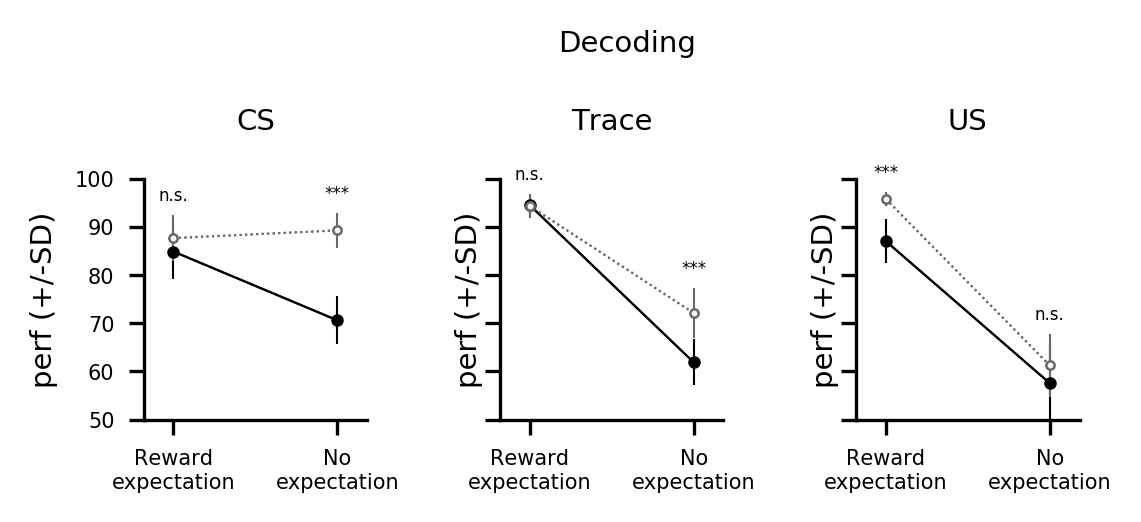

In [37]:
fig,ax = pl.subplots(1,3,figsize=(4,1.75),sharex=True,sharey=True)
v={}
d={}
loops=10
expectations = ('post','renew'),('ext1','ext2')

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='k')
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='dimgrey',linestyle='dotted')
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
            v[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='k',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=v[ex[0]+tb_la],color='k')  
            d[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='whitesmoke',markersize=2,mec='dimgrey',mew=.6)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=d[ex[0]+tb_la],color='dimgrey')

           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x].set_ylabel('perf (+/-SD)')
            ax[x].set_ylim(50,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la,y=1.1)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Reward\nexpectation','No\nexpectation'])
            
#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding',fontsize=7,x=.55,y=1)

#I think something is wrong below
pvs=[]
for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
    for ex,z in zip(expectations,(.2,1.3,)):
        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
                    mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)),
                    eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
                    max((np.mean(eval("mean_scores_gmin_tb_%s_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
                    (np.mean(eval("mean_scores_gmin_tb_%s_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+2,
                    ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

fig.savefig('../final-ish figures/%s_gmin_expectation_encoding.pdf'%NOTEBOOK_NAME)

### now exclude first 20 trials (as animals will/will not be expecting reward during these trials for ext1/reinstate)

In [38]:
v_name=[]
for t in range(16):
    for per in '20onward',:
        for r in 'dhpc','vhpc':
            exec("scores_gmin_tb_%s_%s_%s = {}"%(t,per,r))
            for sess in sessions[1:]:
                exec("v_name = 'scores_gmin_tb_%s_%s'"%(t,per))
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_gmin_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,per,r))
                exec("scores_gmin_tb_%s_%s_%s_t = scores_gmin_tb_%s_%s_%s_t['%s']"%(t,per,r,t,per,r,sess))
                exec("scores_gmin_tb_%s_%s_%s['%s'] = scores_gmin_tb_%s_%s_%s_t"%(t,per,r,sess,t,per,r))

In [39]:
#get mean of each array
for t in range(16):
    for per in '20onward',:
        for r in 'dhpc','vhpc':
            exec("mean_scores_gmin_tb_%s_%s_%s={}"%(t,per,r))
            for sess in sessions[1:]:
                exec("mean_scores_gmin_tb_%s_%s_%s[sess]=[]"%(t,per,r))
                for i in eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,per,r)):
                    exec("mean_scores_gmin_tb_%s_%s_%s[sess].append(i.mean())"%(t,per,r))

In [438]:
np.mean(mean_scores_gmin_tb_6_20onward_vhpc['renew'])

0.80008333333333348

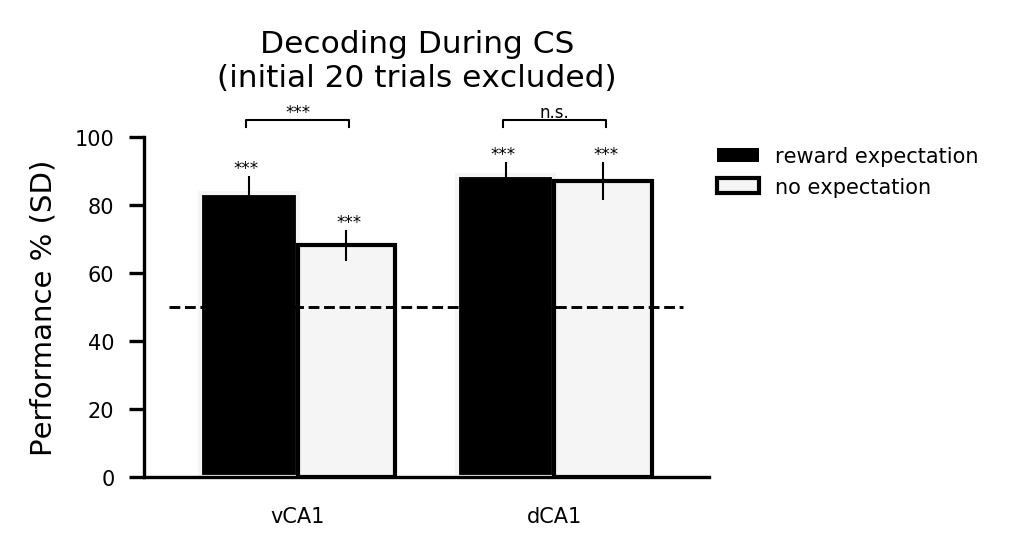

In [40]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops = 30
v={}
d={}
ex = ('post','renew'),('ext1','ext2')
fig, ax = pl.subplots()
v[ex[0]] = np.array(np.std(mean_scores_gmin_tb_6_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[0][1]][:loops])*100)
ax.bar(0 - width/2, np.mean(mean_scores_gmin_tb_6_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[0][1]][:loops])*100,
       width, color='k',edgecolor='whitesmoke',yerr=v[ex[0]])
d[ex[0]] = np.array(np.std(mean_scores_gmin_tb_6_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[0][1]][:loops])*100)
ax.bar(1 - width/2,  np.mean(mean_scores_gmin_tb_6_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[0][1]][:loops])*100,
       width,color='k',edgecolor='whitesmoke',yerr=d[ex[0]])
v[ex[1]] = np.array(np.std(mean_scores_gmin_tb_6_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[1][1]][:loops])*100)
ax.bar(0 + width/2, np.mean(mean_scores_gmin_tb_6_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[1][1]][:loops])*100,
       width, color='whitesmoke',edgecolor='k',yerr=v[ex[1]])
d[ex[1]] = np.array(np.std(mean_scores_gmin_tb_6_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[1][1]][:loops])*100)
ax.bar(1 + width/2,  np.mean(mean_scores_gmin_tb_6_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[1][1]][:loops])*100,
       width,color='whitesmoke', edgecolor='k',yerr=d[ex[1]])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(('vCA1','dCA1'))
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['reward expectation','no expectation'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_6_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[1][1]][:loops],
                                -.2+0,0.2+0,105))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_6_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[1][1]][:loops],
                                -.2+1,0.2+1,105))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[0][1]][:loops],
    .5,-.2+0,np.mean(mean_scores_gmin_tb_6_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[0][1]][:loops])*100+v[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[1][1]][:loops],
    .5, .2+0,np.mean(mean_scores_gmin_tb_6_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_vhpc[ex[1][1]][:loops])*100+v[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[0][1]][:loops],
    .5,-.2+1,np.mean(mean_scores_gmin_tb_6_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[0][1]][:loops])*100+d[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[1][1]][:loops],
    .5, .2+1,np.mean(mean_scores_gmin_tb_6_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_6_20onward_dhpc[ex[1][1]][:loops])*100+d[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS\n(initial 20 trials excluded)',y=1.12,fontsize=7.5)

fig.savefig('../img/%s_gmin_bars_CS_expectation_20onward.pdf'%NOTEBOOK_NAME)

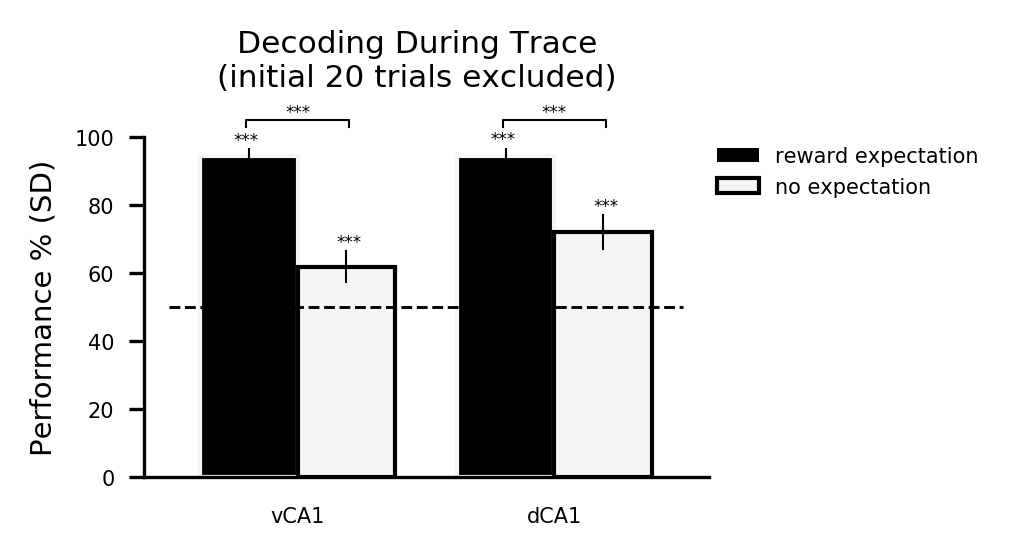

In [41]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
ex = ('post','renew'),('ext1','ext2')
fig, ax = pl.subplots()
v[ex[0]] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[0][1]][:loops])*100)
ax.bar(0 - width/2, np.mean(mean_scores_gmin_tb_8_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[0][1]][:loops])*100,
       width, color='k',edgecolor='whitesmoke',yerr=v[ex[0]])
d[ex[0]] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[0][1]][:loops])*100)
ax.bar(1 - width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[0][1]][:loops])*100,
       width,color='k',edgecolor='whitesmoke',yerr=d[ex[0]])
v[ex[1]] = np.array(np.std(mean_scores_gmin_tb_8_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[1][1]][:loops])*100)
ax.bar(0 + width/2, np.mean(mean_scores_gmin_tb_8_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[1][1]][:loops])*100,
       width, color='whitesmoke',edgecolor='k',yerr=v[ex[1]])
d[ex[1]] = np.array(np.std(mean_scores_gmin_tb_8_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[1][1]][:loops])*100)
ax.bar(1 + width/2,  np.mean(mean_scores_gmin_tb_8_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[1][1]][:loops])*100,
       width,color='whitesmoke', edgecolor='k',yerr=d[ex[1]])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(('vCA1','dCA1'))
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['reward expectation','no expectation'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_8_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[1][1]][:loops],
                                -.2+0,0.2+0,105))
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_8_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[1][1]][:loops],
                                -.2+1,0.2+1,105))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[0][1]][:loops],
    .5,-.2+0,np.mean(mean_scores_gmin_tb_8_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[0][1]][:loops])*100+v[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[1][1]][:loops],
    .5, .2+0,np.mean(mean_scores_gmin_tb_8_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_vhpc[ex[1][1]][:loops])*100+v[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[0][1]][:loops],
    .5,-.2+1,np.mean(mean_scores_gmin_tb_8_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[0][1]][:loops])*100+d[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[1][1]][:loops],
    .5, .2+1,np.mean(mean_scores_gmin_tb_8_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_dhpc[ex[1][1]][:loops])*100+d[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace\n(initial 20 trials excluded)',y=1.12,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_Tr_expectation.pdf'%NOTEBOOK_NAME)

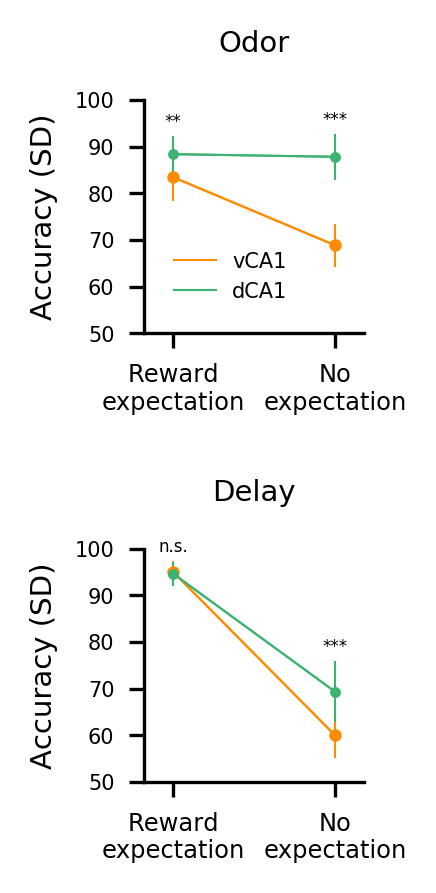

In [416]:
fig,ax = pl.subplots(2,1,figsize=(1.6,3.2),sharey=True)
v={}
d={}
loops=10
expectations = ('post','renew'),('ext1','ext2')

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('Odor','Delay','US',),(range(2))):
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='darkorange')
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='mediumseagreen')#,linestyle='dotted')
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('Odor','Delay','US',),(range(2))):
            v[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='darkorange',markersize=2,label='vCA1')
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=v[ex[0]+tb_la],color='darkorange')  
            d[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='mediumseagreen',markersize=2,mec='mediumseagreen',mew=.6,label='dCA1')
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=d[ex[0]+tb_la],color='mediumseagreen')

           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x].set_ylabel('Accuracy (SD)')
            ax[x].set_ylim(50,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la,y=1.1)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Reward\nexpectation','No\nexpectation'],fontsize=5.8)
            
ax[0].legend(['vCA1','dCA1'],loc=(.1,.1),frameon=False)
#pl.suptitle('Decoding',fontsize=7,x=.55,y=1)

#I think something is wrong below
pvs=[]
for tb,tb_la,x in zip((6,8),('Odor','Delay','US'),(range(2))):
    for ex,z in zip(expectations,(.2,1.3,)):
        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                    mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)),
                    eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
                    max((np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
                    (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+1,
                    ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=1.5)

#fig.savefig('../final-ish figures/%s_gmin_expectation_encoding.pdf'%NOTEBOOK_NAME)

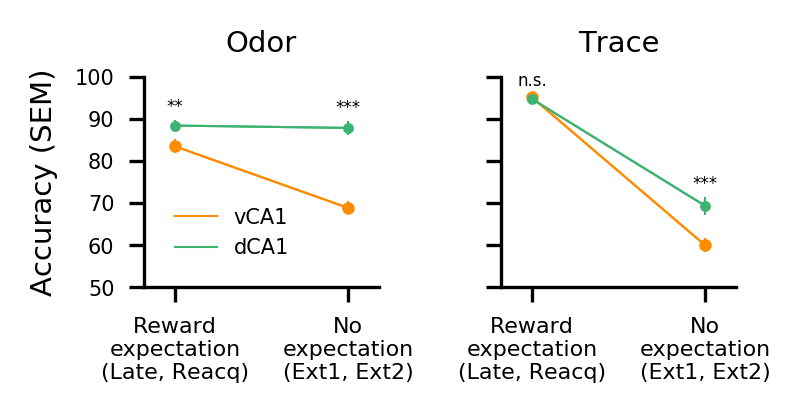

In [723]:
fig,ax = pl.subplots(1,2,figsize=(2.85,1.6),sharey=True)
v={}
d={}
loops=10
expectations = ('post','renew'),('ext1','ext2')

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('Odor','Delay','US',),(range(2))):
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='darkorange')
            ax[x].plot([p for p in (.2,1.3)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100) for ex in expectations],color='mediumseagreen')#,linestyle='dotted')
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('Odor','Trace','US',),(range(2))):
            v[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100/(np.sqrt(loops-1)))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='darkorange',markersize=2,label='vCA1')
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=v[ex[0]+tb_la],color='darkorange')  
            d[ex[0]+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100/(np.sqrt(loops-1)))
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100), 'o', color='mediumseagreen',markersize=2,mec='mediumseagreen',mew=.6,label='dCA1')
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
            mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100),yerr=d[ex[0]+tb_la],color='mediumseagreen')

           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[0].set_ylabel('Accuracy (SEM)')
            ax[x].set_ylim(50,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la,y=1.0)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Reward\nexpectation\n(Late, Reacq)','No\nexpectation\n(Ext1, Ext2)'],fontsize=5.3)
            
ax[0].legend(['vCA1','dCA1'],loc=(.1,.1),frameon=False)
#pl.suptitle('Decoding',fontsize=7,x=.55,y=1)

#I think something is wrong below
pvs=[]
for tb,tb_la,x in zip((6,8),('Odor','Trace','US'),(range(2))):
    for ex,z in zip(expectations,(.2,1.3,)):
        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                    mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)),
                    eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
                    max((np.mean(eval("mean_scores_gmin_tb_%s_20onward_vhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
                    (np.mean(eval("mean_scores_gmin_tb_%s_20onward_dhpc[ex[0]][:loops]+\
                        mean_scores_gmin_tb_%s_20onward_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+1,
                    ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=1.5)

fig.savefig('../final-ish figures/%s_gmin_expectation_encoding.pdf'%NOTEBOOK_NAME)

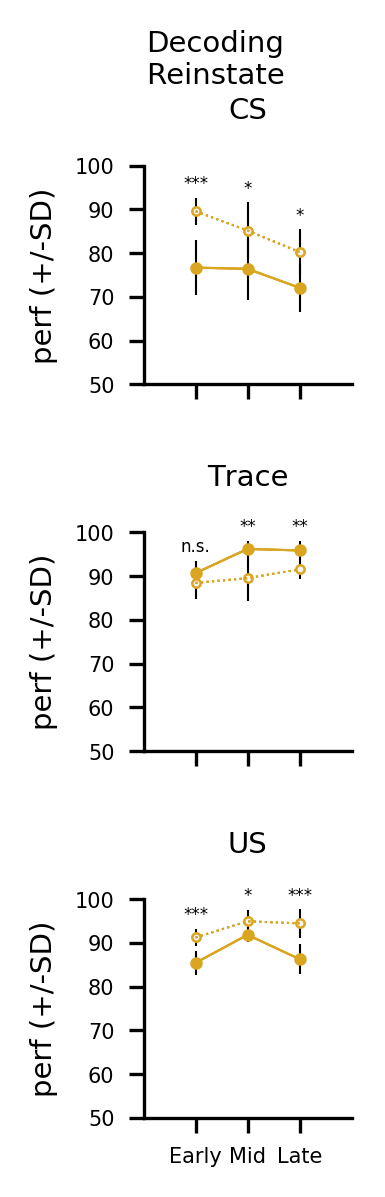

In [43]:
fig,ax = pl.subplots(3,1,figsize=(1.5,4),sharex=True,sharey=True)
v={}
d={}
phases=['early','mid','late']
loops=10

for phase,c,z in zip(['early','mid','late'],(('powderblue','royalblue','midnightblue')),(.5,1,1.5)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
            v[phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops]"%(tb,phase)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops]"%(tb,phase)))*100), 'o', color=dark_co[5],
                       markersize=2)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops]"%(tb,phase)))*100),yerr=v[phase+tb_la],
                          color='k')
            d[phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops]"%(tb,phase)))*100)
            ax[x].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                       markersize=2,mec=dark_co[5],mew=.6)
            ax[x].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops]"%(tb,phase)))*100),yerr=d[phase+tb_la],
                          color='k')
# Add connecting lines            
for phase,c,z in zip(['early','mid','late'],(('powderblue','royalblue','midnightblue')),(.5,1,1.5)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
            ax[x].plot([p for p in (.5,1,1.5)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops]"%(tb,phase)))*100) for phase in phases],
                       color=dark_co[5])
            ax[x].plot([p for p in (.5,1,1.5)],
                       [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops]"%(tb,phase)))*100) for phase in phases],
                       color=dark_co[5],linestyle='dotted')
            
           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x].set_ylabel('perf (+/-SD)')
            ax[x].set_ylim(50,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la,y=1.1)
            ax[x].set_xlim(0,2)
            ax[x].set_xticks((.5,1,1.5))
            ax[x].set_xticklabels(['Early','Mid','Late'])
            
#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding\nReinstate',fontsize=7,x=.55,y=1)

pvs=[]
phases=['early','mid','late']
for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
    for i,z in zip(range(3),(.5,1,1.5)):
        pvs.append(add_significance(ax[x], eval("mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops]"%(tb,phases[i])),
                    eval("mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops]"%(tb,phases[i])),z,z,
                    max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc['renew'][:loops])"%(tb,phases[i]))*100+v[phases[i]+tb_la],
                    eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc['renew'][:loops])"%(tb,phases[i]))*100+d[phases[i]+tb_la])+1,
                    ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_3rdsphases_Reinstate.pdf'%NOTEBOOK_NAME)

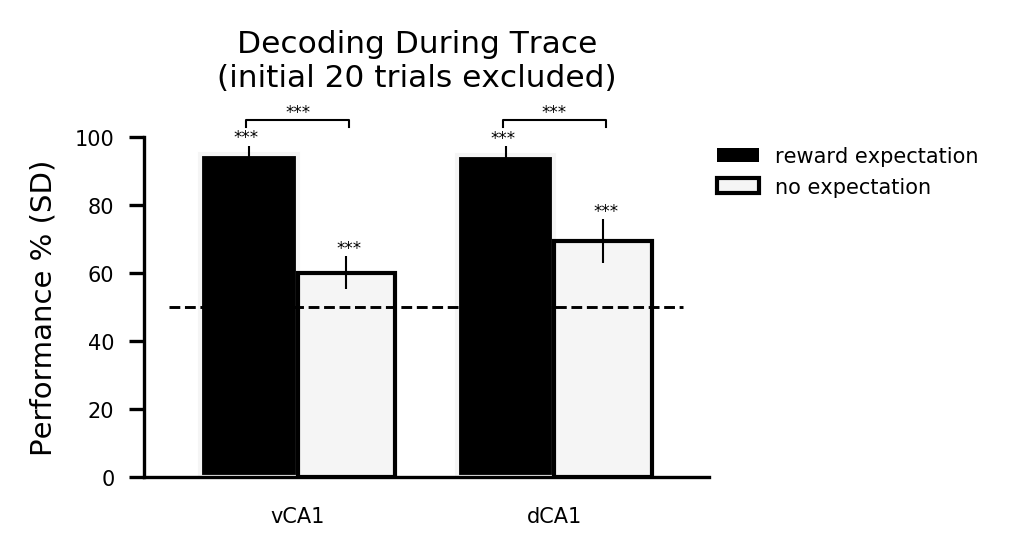

In [44]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
ex = ('post','renew'),('ext1','ext2')
fig, ax = pl.subplots()
v[ex[0]] = np.array(np.std(mean_scores_gmin_tb_8_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[0][1]][:loops])*100)
ax.bar(0 - width/2, np.mean(mean_scores_gmin_tb_8_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[0][1]][:loops])*100,
       width, color='k',edgecolor='whitesmoke',yerr=v[ex[0]])
d[ex[0]] = np.array(np.std(mean_scores_gmin_tb_8_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[0][1]][:loops])*100)
ax.bar(1 - width/2,  np.mean(mean_scores_gmin_tb_8_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[0][1]][:loops])*100,
       width,color='k',edgecolor='whitesmoke',yerr=d[ex[0]])
v[ex[1]] = np.array(np.std(mean_scores_gmin_tb_8_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[1][1]][:loops])*100)
ax.bar(0 + width/2, np.mean(mean_scores_gmin_tb_8_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[1][1]][:loops])*100,
       width, color='whitesmoke',edgecolor='k',yerr=v[ex[1]])
d[ex[1]] = np.array(np.std(mean_scores_gmin_tb_8_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[1][1]][:loops])*100)
ax.bar(1 + width/2,  np.mean(mean_scores_gmin_tb_8_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[1][1]][:loops])*100,
       width,color='whitesmoke', edgecolor='k',yerr=d[ex[1]])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(('vCA1','dCA1'))
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['reward expectation','no expectation'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_8_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[1][1]][:loops],
                                -.2+0,0.2+0,105))
pvs.append(add_significance(ax, mean_scores_gmin_tb_8_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_8_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[1][1]][:loops],
                                -.2+1,0.2+1,105))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[0][1]][:loops],
    .5,-.2+0,np.mean(mean_scores_gmin_tb_8_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[0][1]][:loops])*100+v[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[1][1]][:loops],
    .5, .2+0,np.mean(mean_scores_gmin_tb_8_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_vhpc[ex[1][1]][:loops])*100+v[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[0][1]][:loops],
    .5,-.2+1,np.mean(mean_scores_gmin_tb_8_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[0][1]][:loops])*100+d[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[1][1]][:loops],
    .5, .2+1,np.mean(mean_scores_gmin_tb_8_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_8_20onward_dhpc[ex[1][1]][:loops])*100+d[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Trace\n(initial 20 trials excluded)',y=1.12,fontsize=7.5)

fig.savefig('../img/%s_gmin_bars_Tr_expectation_20onward.pdf'%NOTEBOOK_NAME)

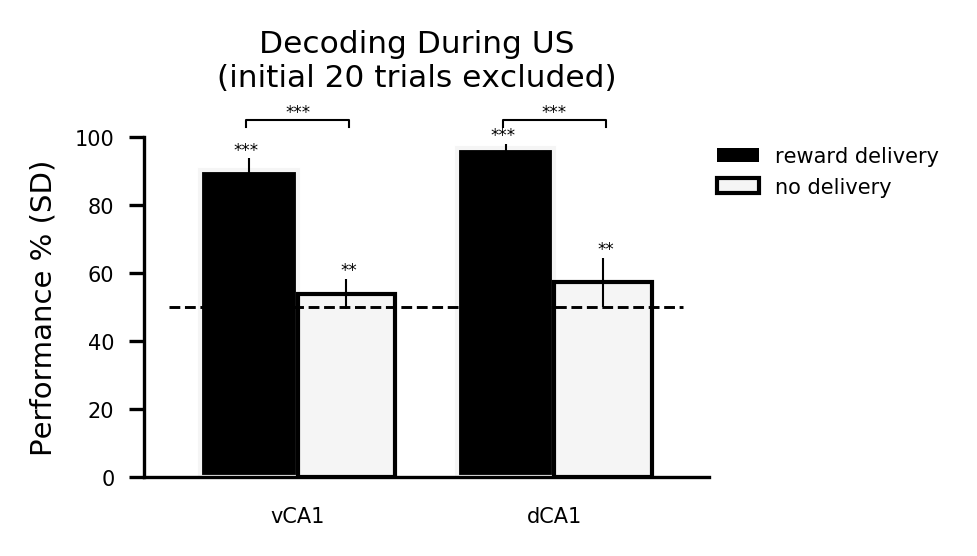

In [45]:
from matplotlib.patches import Patch
labels = session_labels
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
ex = ('post','renew'),('ext1','ext2')
fig, ax = pl.subplots()
v[ex[0]] = np.array(np.std(mean_scores_gmin_tb_10_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[0][1]][:loops])*100)
ax.bar(0 - width/2, np.mean(mean_scores_gmin_tb_10_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[0][1]][:loops])*100,
       width, color='k',edgecolor='whitesmoke',yerr=v[ex[0]])
d[ex[0]] = np.array(np.std(mean_scores_gmin_tb_10_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[0][1]][:loops])*100)
ax.bar(1 - width/2,  np.mean(mean_scores_gmin_tb_10_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[0][1]][:loops])*100,
       width,color='k',edgecolor='whitesmoke',yerr=d[ex[0]])
v[ex[1]] = np.array(np.std(mean_scores_gmin_tb_10_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[1][1]][:loops])*100)
ax.bar(0 + width/2, np.mean(mean_scores_gmin_tb_10_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[1][1]][:loops])*100,
       width, color='whitesmoke',edgecolor='k',yerr=v[ex[1]])
d[ex[1]] = np.array(np.std(mean_scores_gmin_tb_10_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[1][1]][:loops])*100)
ax.bar(1 + width/2,  np.mean(mean_scores_gmin_tb_10_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[1][1]][:loops])*100,
       width,color='whitesmoke', edgecolor='k',yerr=d[ex[1]])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
ax.set_ylabel('Performance % (SD)')
#ax.set_title('Decoding During CS')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(('vCA1','dCA1'))
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['reward delivery','no delivery'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, mean_scores_gmin_tb_10_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_10_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[1][1]][:loops],
                                -.2+0,0.2+0,105))
pvs.append(add_significance(ax, mean_scores_gmin_tb_10_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[0][1]][:loops],
                                mean_scores_gmin_tb_10_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[1][1]][:loops],
                                -.2+1,0.2+1,105))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[0][1]][:loops],
    .5,-.2+0,np.mean(mean_scores_gmin_tb_10_20onward_vhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[0][1]][:loops])*100+v[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[1][1]][:loops],
    .5, .2+0,np.mean(mean_scores_gmin_tb_10_20onward_vhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_vhpc[ex[1][1]][:loops])*100+v[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[0][1]][:loops],
    .5,-.2+1,np.mean(mean_scores_gmin_tb_10_20onward_dhpc[ex[0][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[0][1]][:loops])*100+d[ex[0]]+1,loops=loops,sig_func=None,colors='k'))
pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[1][1]][:loops],
    .5, .2+1,np.mean(mean_scores_gmin_tb_10_20onward_dhpc[ex[1][0]][:loops]+mean_scores_gmin_tb_10_20onward_dhpc[ex[1][1]][:loops])*100+d[ex[1]]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During US\n(initial 20 trials excluded)',y=1.12,fontsize=7.5)

fig.savefig('../img/%s_gmin_bars_US_expectation_20onward.pdf'%NOTEBOOK_NAME)

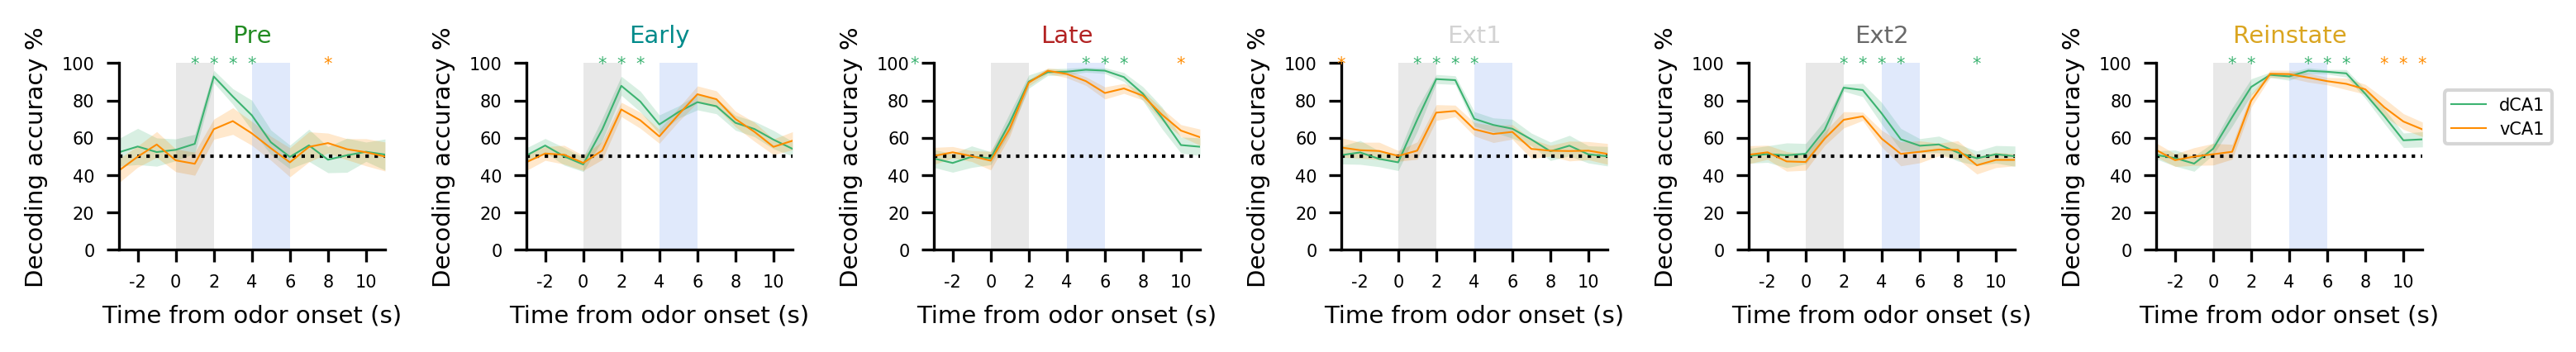

In [80]:
fig, ax = pl.subplots(1,6, figsize=(10, 1.5))

for r,sess,c in zip(range(6),sessions,('limegreen','b','r','silver','grey','y')):
    for re,co,la in zip(('dhpc','vhpc'),('mediumseagreen','darkorange'),('dCA1','vCA1')):
        ax[r].plot([(t-4) for t in range(16)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100) for t in range(16)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100) for t in range(16)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:15]"%(t,re)))*100 for t in range(16)])
        ax[r].fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    for t in range(16):
        if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
            if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
                ax[r].text(t-4.25,97,'*',fontsize=5, color='mediumseagreen')
            if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
                ax[r].text(t-4.25,97,'*',fontsize=5, color='darkorange')
for x in range (0,6):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-3, 11)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Decoding accuracy %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 6), color='cornflowerblue', delta_y=100, alpha=.2)
    ax[x].set_title(session_labels[x], color=dark_co[x])
ax[5].legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)


fig.savefig('../img/%s_gmin_horizontal_dVSv.pdf'%NOTEBOOK_NAME)

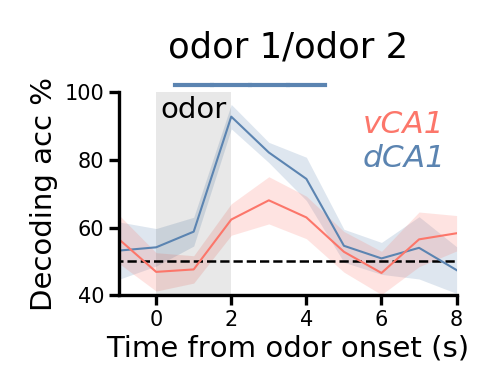

In [873]:
fig, ax = pl.subplots(1,1,figsize=(2, 1.7))

for r,sess in zip(range(1),['expo']):
    for re,co,la in zip(('dhpc','vhpc'),('#5B84B1FF','#FC766AFF'),('dCA1','vCA1')):
        ax.plot([(t-4) for t in range(13)], [(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(13)], color=co,label=la)
        m = np.array([(np.mean(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100) for t in range(13)])
        s = np.array([np.std(eval("mean_scores_gmin_tb_%s_%s[sess][:10]"%(t,re)))*100 for t in range(13)])
        ax.fill_between([(t-4) for t in range(13)],m-s,m+s,alpha=0.2,color=co,linewidth=0)
    #for t in range(13):
    #    if eval("mannwhitU_tb_%s[sess][-1].mean()"%t) < 0.01:
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) > np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-4.25,97,'*',fontsize=5, color='mediumseagreen')
    #        if np.mean(eval("mean_scores_gmin_tb_%s_dhpc[sess][:10]"%t)) < np.mean(eval("mean_scores_gmin_tb_%s_vhpc[sess][:10]"%t)):
    #            ax.text(t-4.25,97,'*',fontsize=5, color='darkorange')
for t in range(1,12):
    add_significance_line(ax, eval("mean_scores_gmin_tb_%s_dhpc['expo'][:10]"%t), eval("mean_scores_gmin_tb_%s_vhpc['expo'][:10]"%t),
                         t-4.5, t-3.5, 102,color1='#5B84B1FF',color2='#FC766AFF',thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)

for x in range (1):
    ax.tick_params(axis='both',pad=1,length=2.5)
    ax.set_ylim(40, 100)
    ax.set_xlim(-1,8)
    ax.set_xticks(np.arange(0,9,2))
    ax.set_xticklabels(np.arange(0,9,2))
    ax.hlines(50, -5,11, color='k', lw=.6, linestyles='dashed')
    ax.set_xlabel('Time from odor onset (s)',labelpad=1)
    ax.set_ylabel('Decoding acc %',labelpad=1.5)
    pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    ax.set_title('odor 1/odor 2',fontsize=8.5,y=1.05)
ax.text(0.1,92.5,'odor',color='k',fontsize=7)
ax.text(5.5,88,'vCA1',color='#FC766AFF',fontsize=7.5,fontstyle='italic')
ax.text(5.5,78,'dCA1',color='#5B84B1FF',fontsize=7.5,fontstyle='italic')
#ax.legend(bbox_to_anchor=(.64, .9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)


fig.savefig('../final-ish figures/%s_gmin_baseline_dVSv.pdf'%NOTEBOOK_NAME)

In [ ]:
['#FC766AFF','#5B84B1FF']

MannwhitneyuResult(statistic=0.0, pvalue=0.00018165114609146497) r = -0.845154254729


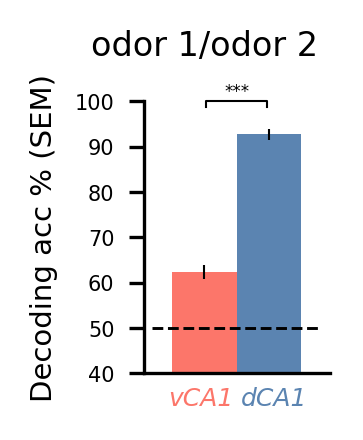

In [892]:
from matplotlib.patches import Patch
labels = session_labels
#x = np.arange(3)  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
i=0
fig, ax = pl.subplots(figsize=(.8,1.2))

v[per] = np.array(np.std(eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops])/np.sqrt(loops)*100)
ax.bar(0 - width/2, np.mean(eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops])*100, width, color='#FC766AFF',yerr=v[per])
d[per] = np.array(np.std(eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops])/np.sqrt(loops)*100)
ax.bar(0 + width/2,  np.mean(eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops])*100, width,color='#5B84B1FF',yerr=d[per])
ax.hlines(50,-.5,.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
#ax.set_xticks(0)
ax.set_xticklabels(['CS'])
ax.set_ylim(40,100)
#ax.legend([Patch(facecolor='darkorange'),Patch(facecolor='mediumseagreen')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
ax.text(-.21,33,'vCA1',color='#FC766AFF',fontsize=6,fontstyle='italic',ha='center')
ax.text(0.22,33,'dCA1',color='#5B84B1FF',fontsize=6,fontstyle='italic',ha='center')
pvs=[]

pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops], eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops],
    -.18+i,0.18+i,100))
    #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
    #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
#pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops],.5,-.2+i,
#           np.mean(eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops])*100+v[per]+1,loops=loops,sig_func=None,colors='k'))
#pvs.append(sig_vs_chance(ax,eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops],.5, .2+i,
#           np.mean(eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops])*100+d[per]+1,loops=loops,sig_func=None,colors='k'))
report_stats(eval("mean_scores_gmin_tb_6_vhpc['expo']")[:loops], eval("mean_scores_gmin_tb_6_dhpc['expo']")[:loops])
pl.suptitle('odor 1/odor 2',y=1.08,x=.38,fontsize=8)

fig.savefig('../final-ish figures/%s_gmin_bars_expo_10_loops.pdf'%NOTEBOOK_NAME)

# Break up session into quarters

In [421]:
v_name=[]
for t in range(16):
    for per in 'Trials1to30','Trials31to60','Trials61to90','Trials91to120':
        for r in 'dhpc','vhpc':
            exec("scores_gmin_tb_%s_%s_%s = {}"%(t,per,r))
            for sess in sessions[1:]:
                exec("v_name = 'scores_gmin_tb_%s_%s'"%(t,per))
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_gmin_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,per,r))
                exec("scores_gmin_tb_%s_%s_%s_t = scores_gmin_tb_%s_%s_%s_t['%s']"%(t,per,r,t,per,r,sess))
                exec("scores_gmin_tb_%s_%s_%s['%s'] = scores_gmin_tb_%s_%s_%s_t"%(t,per,r,sess,t,per,r))

In [422]:
#get mean of each array
for t in range(16):
    for per in 'Trials1to30','Trials31to60','Trials61to90','Trials91to120':
        for r in 'dhpc','vhpc':
            exec("mean_scores_gmin_tb_%s_%s_%s={}"%(t,per,r))
            for sess in sessions[1:]:
                exec("mean_scores_gmin_tb_%s_%s_%s[sess]=[]"%(t,per,r))
                for i in eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,per,r)):
                    exec("mean_scores_gmin_tb_%s_%s_%s[sess].append(i.mean())"%(t,per,r))

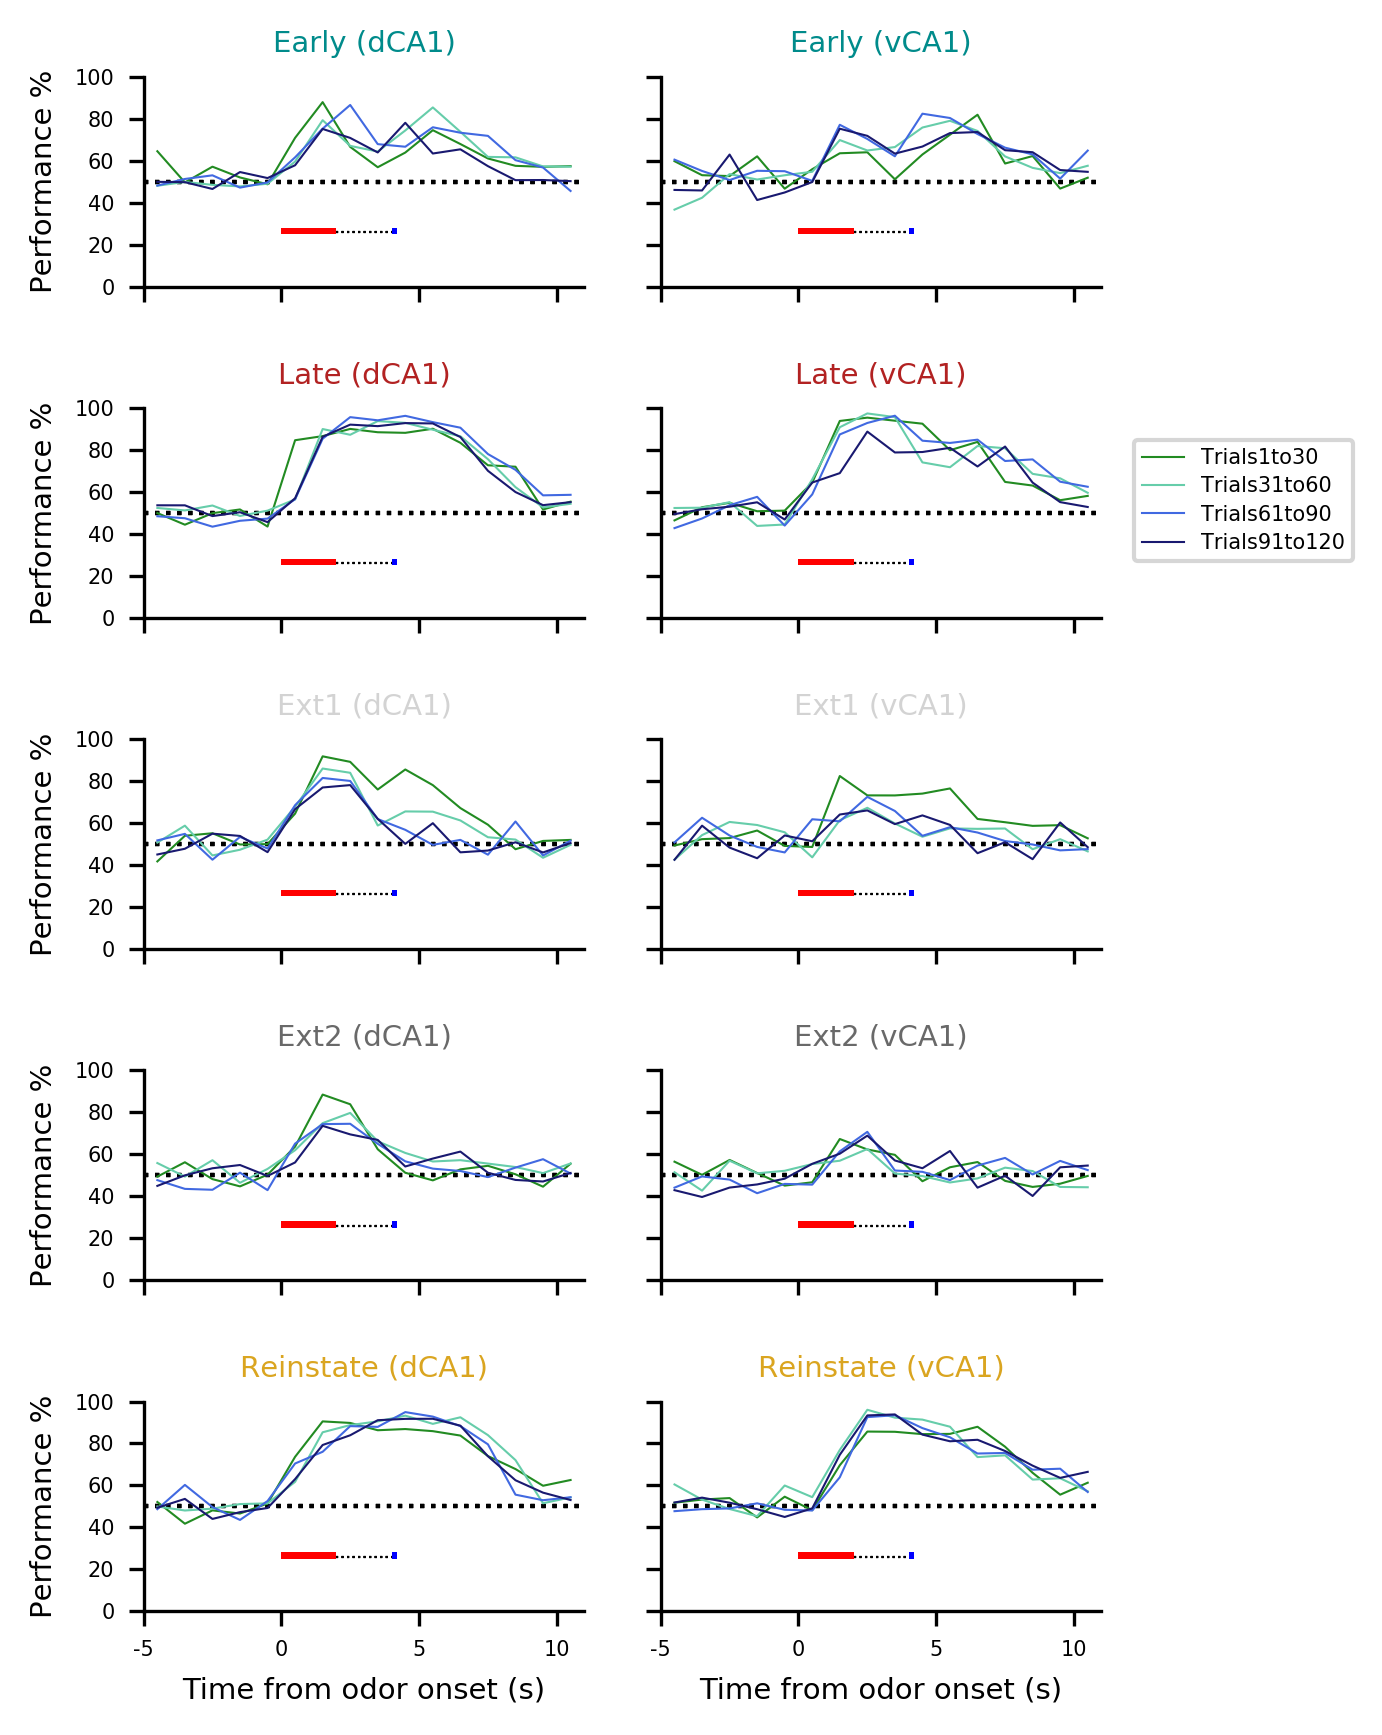

In [423]:
fig, ax = pl.subplots(5,2, figsize=(4, 6),sharex=True,sharey=True)

for sess,x,sess_la in zip(sessions[1:],range(len(sessions[1:])),('Early','Late','Ext1','Ext2','Reinstate')):
    for phase,c in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                       ('forestgreen','mediumaquamarine','royalblue','midnightblue')):
        for r,r_la,i in zip(('dhpc','vhpc'),('dCA1','vCA1'),(0,1)):
            ax[x][i].plot([(t-4.5) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100) for t in range(16)],
                    color=c,label=phase)
            m = np.array([(np.mean(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100) for t in range(16)])
            s = np.array([np.std(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100 for t in range(16)])
            #ax[x][i].fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
            ax[x][i].set_title(sess_la+' ('+r_la+')',color=dark_co[x+1])
            pt.plot_period_bar(ax[x][i], 25, start_end=(0, 2), color='r', delta_y=3)
            pt.plot_period_bar(ax[x][i], 25, start_end=(4, 4.2), color='b', delta_y=3)
            ax[x][i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
            ax[x][i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
            ax[x][0].set_ylabel('Performance %')
ax[0][0].set_ylim(0, 100)
ax[0][0].set_xlim(-5, 11)
ax[0][0].set_xticks(np.arange(-5,11, 5))
ax[0][0].set_xticklabels(np.arange(-5,11, 5))
ax[x][0].set_xlabel('Time from odor onset (s)')
ax[x][1].set_xlabel('Time from odor onset (s)')
ax[1][1].legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_phases_ALL.pdf'%NOTEBOOK_NAME)

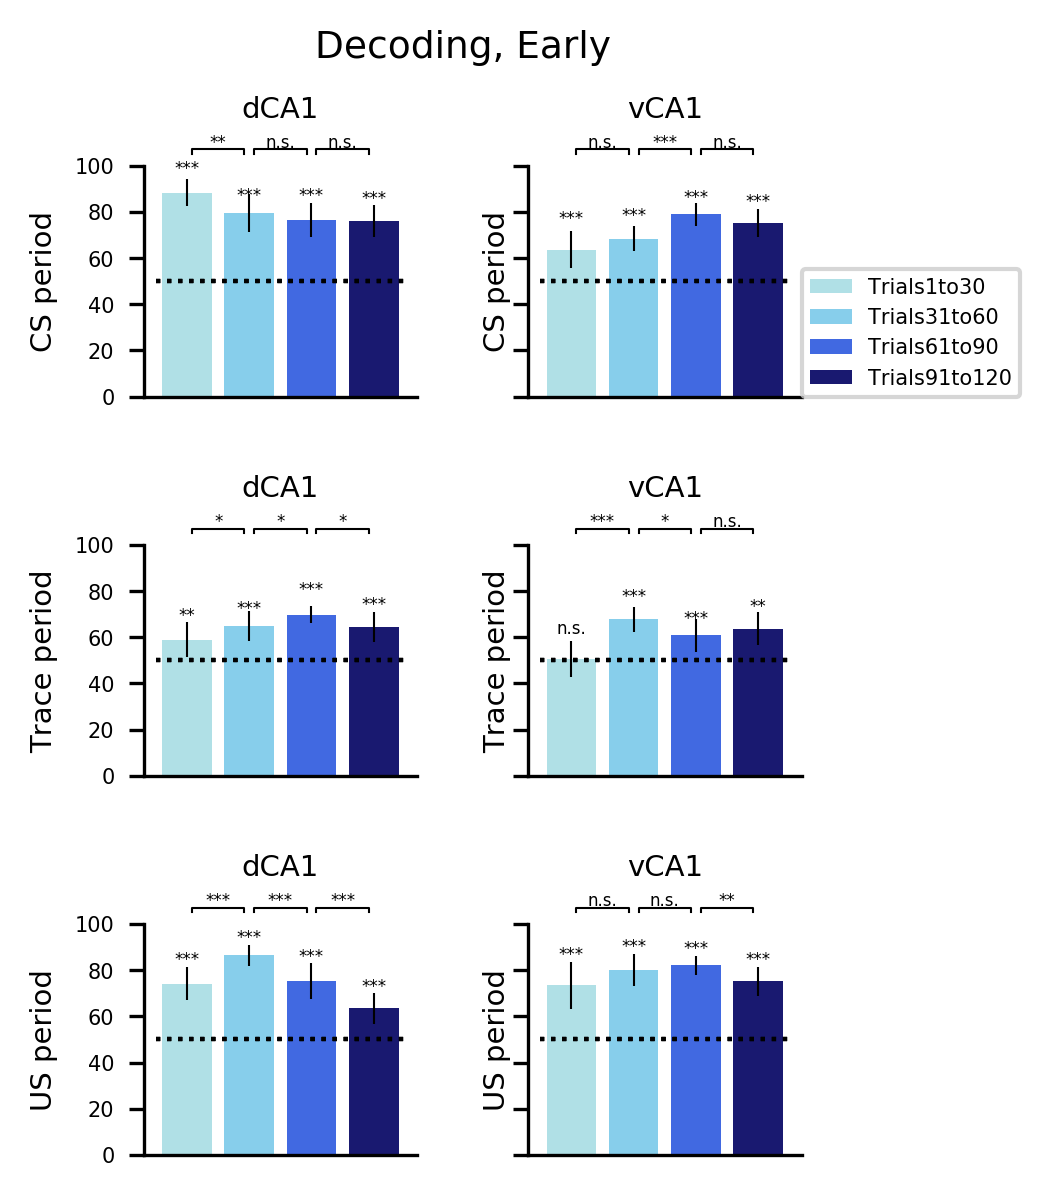

In [424]:
fig,ax = pl.subplots(3,2,figsize=(3,4),sharex=True,sharey=True)
s={}
loops=10

for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','midnightblue')),range(4)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
        for r,r_la,i in zip(('dhpc','vhpc',),('dCA1','vCA1'),(0,1)):
            s[phase+r] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phase,r)))*100)
            ax[x][i].bar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phase,r)))*100), color=c,label=phase,yerr=s[phase+r])
            ax[x][i].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x][i].set_ylabel(tb_la+' period')
            ax[x][i].set_ylim(0,100)
            ax[x][i].hlines(50, -.5,3.5, color='k', lw=1, linestyles='dotted')
            ax[x][i].set_title(r_la,y=1.1)
ax[0][1].legend(loc=(1,0))
pl.suptitle('Decoding, Early',fontsize=9,x=.55,y=1)

pvs=[]
phases=['Trials1to30','Trials31to60','Trials61to90','Trials91to120']
for r,i in zip(('dhpc','vhpc'),(0,1)):
    for tb,x in zip((6,8,10),(range(3))):
        for c in range(3):
            pvs.append(add_significance(ax[x][i], eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[c],r)),
                                eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[c+1],r)),c+.08,.92+c,107))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
        for d in range(4):
            pvs.append(sig_vs_chance(ax[x][i],eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[d],r)),.5,d,
                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['pre'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_phases_Early_bars.jpg'%NOTEBOOK_NAME)

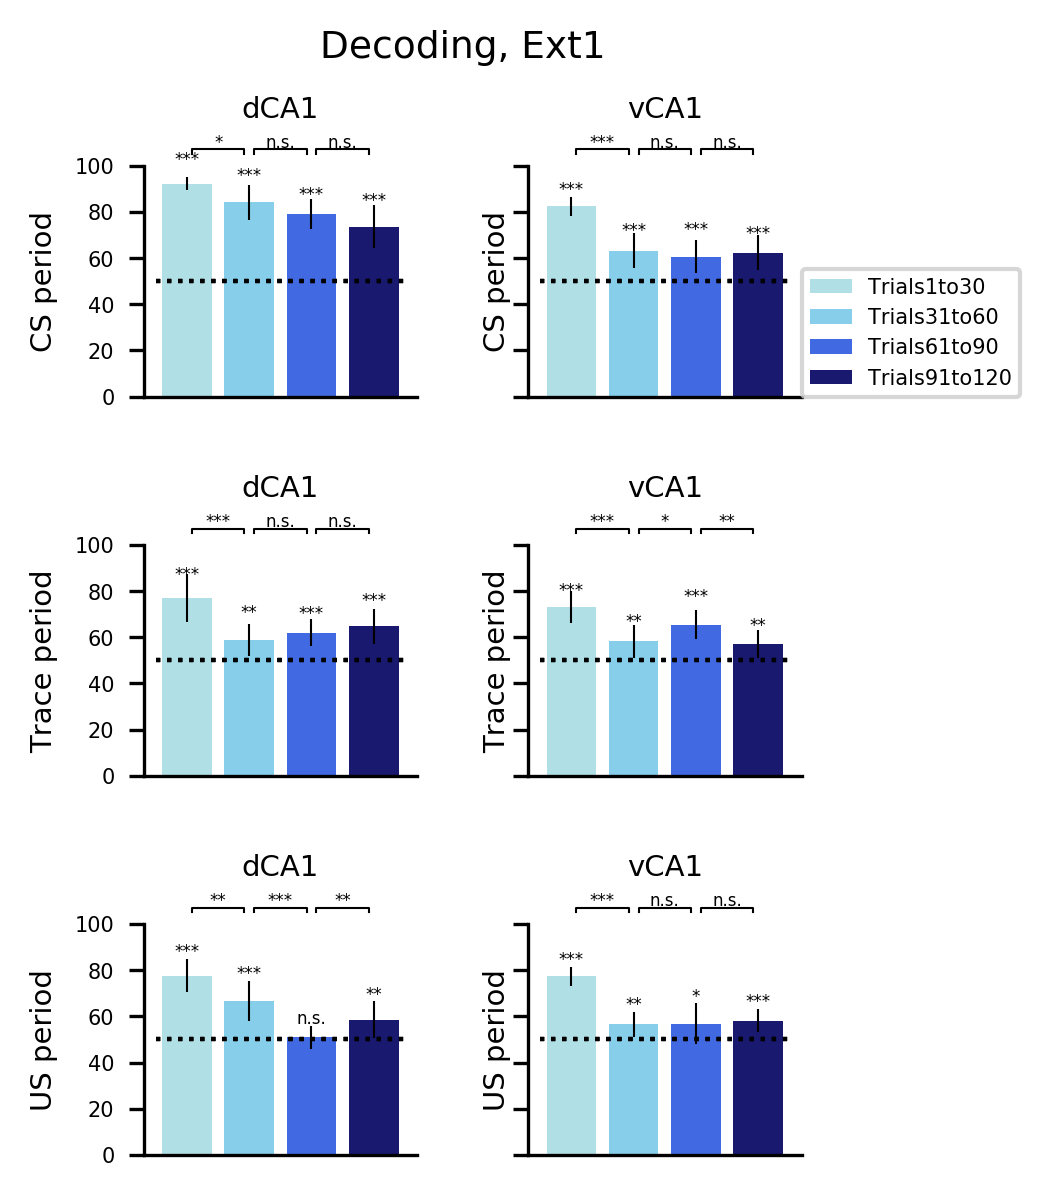

In [426]:
fig,ax = pl.subplots(3,2,figsize=(3,4),sharex=True,sharey=True)
s={}
loops=10

for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','midnightblue')),range(4)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
        for r,r_la,i in zip(('dhpc','vhpc',),('dCA1','vCA1'),(0,1)):
            s[phase+r] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops]"%(tb,phase,r)))*100)
            ax[x][i].bar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops]"%(tb,phase,r)))*100), color=c,label=phase,yerr=s[phase+r])
            ax[x][i].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x][i].set_ylabel(tb_la+' period')
            ax[x][i].set_ylim(0,100)
            ax[x][i].hlines(50, -.5,3.5, color='k', lw=1, linestyles='dotted')
            ax[x][i].set_title(r_la,y=1.1)
ax[0][1].legend(loc=(1,0))
pl.suptitle('Decoding, Ext1',fontsize=9,x=.55,y=1)

pvs=[]
phases=['Trials1to30','Trials31to60','Trials61to90','Trials91to120']
for r,i in zip(('dhpc','vhpc'),(0,1)):
    for tb,x in zip((6,8,10),(range(3))):
        for c in range(3):
            pvs.append(add_significance(ax[x][i], eval("mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops]"%(tb,phases[c],r)),
                                eval("mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops]"%(tb,phases[c+1],r)),c+.08,.92+c,107))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
        for d in range(4):
            pvs.append(sig_vs_chance(ax[x][i],eval("mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops]"%(tb,phases[d],r)),.5,d,
                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['ext1'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_phases_Ext1_bars.jpg'%NOTEBOOK_NAME)

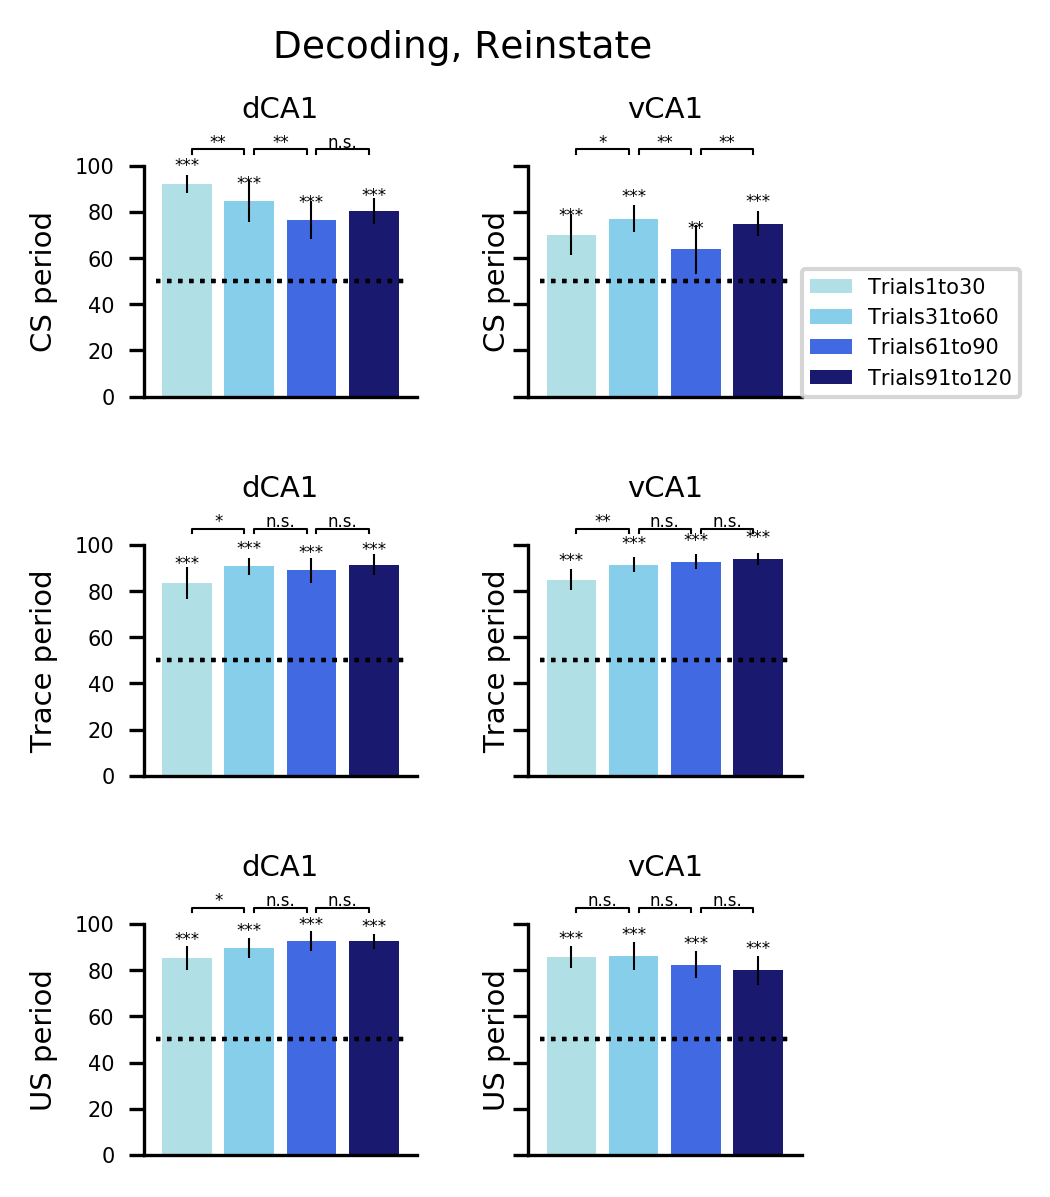

In [428]:
fig,ax = pl.subplots(3,2,figsize=(3,4),sharex=True,sharey=True)
s={}
loops=10

for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','midnightblue')),range(4)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
        for r,r_la,i in zip(('dhpc','vhpc',),('dCA1','vCA1'),(0,1)):
            s[phase+r] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phase,r)))*100)
            ax[x][i].bar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phase,r)))*100), color=c,label=phase,yerr=s[phase+r])
            ax[x][i].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[x][i].set_ylabel(tb_la+' period')
            ax[x][i].set_ylim(0,100)
            ax[x][i].hlines(50, -.5,3.5, color='k', lw=1, linestyles='dotted')
            ax[x][i].set_title(r_la,y=1.1)
ax[0][1].legend(loc=(1,0))
pl.suptitle('Decoding, Reinstate',fontsize=9,x=.55,y=1)

pvs=[]
phases=['Trials1to30','Trials31to60','Trials61to90','Trials91to120']
for r,i in zip(('dhpc','vhpc'),(0,1)):
    for tb,x in zip((6,8,10),(range(3))):
        for c in range(3):
            pvs.append(add_significance(ax[x][i], eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[c],r)),
                                eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[c+1],r)),c+.08,.92+c,107))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
        for d in range(4):
            pvs.append(sig_vs_chance(ax[x][i],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_phases_Reinstate_bars.pdf'%NOTEBOOK_NAME)

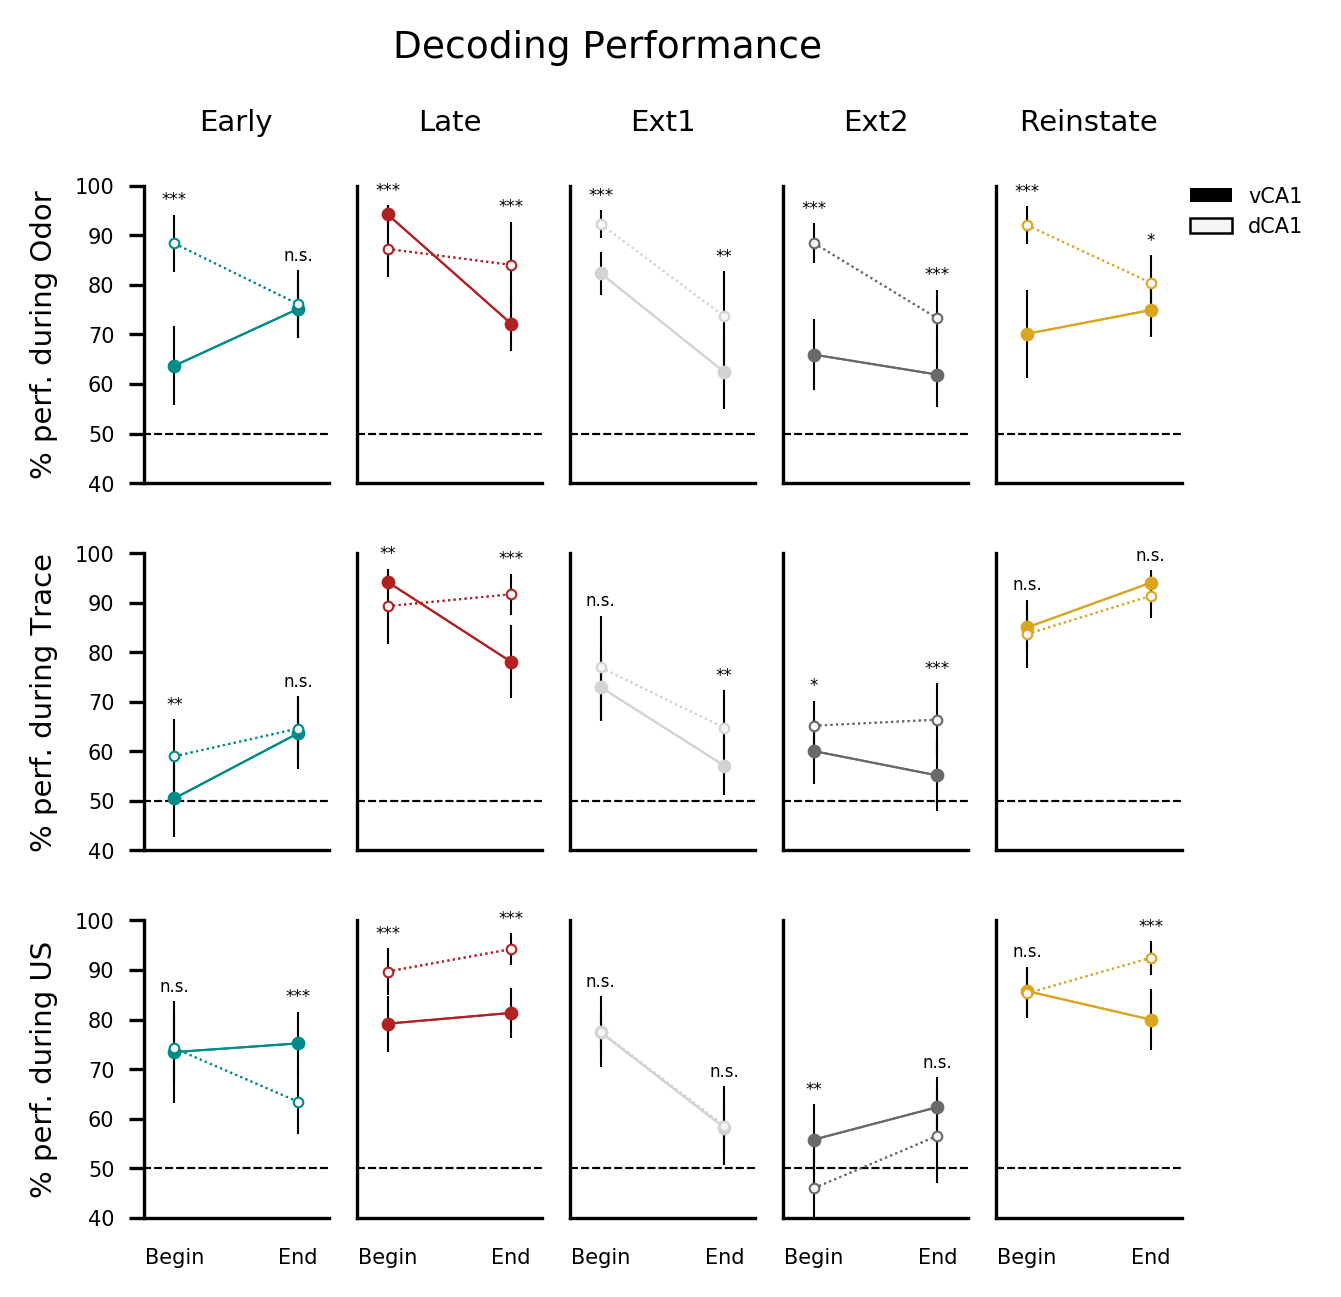

In [443]:
fig,ax = pl.subplots(3,5,figsize=(4,4),sharex=True,sharey=True)
v={}
d={}
phases=['Trials1to30','Trials91to120']
loops=10

# Add connecting lines 
for sess,sess_la,q in zip(sessions[1:],('Early','Late','Ext1','Ext2','Reinstate'), range(len(sessions[1:]))):
    for phase,z in zip(['Trials1to30','Trials91to120'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('Odor','Trace','US',),(range(3))):
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1])
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1],linestyle='dotted')
            
                ax[x][q].tick_params(axis='x',bottom=False,labelbottom=True)
                ax[x][q].tick_params(axis='y',left=False)
                ax[x][0].tick_params(axis='y',left=True)
                ax[x][0].set_ylabel('% perf. during '+tb_la)
                ax[x][q].set_ylim(40,100)
                ax[x][q].hlines(50, -.5,2.5, color='k', lw=.5, linestyles='--')
                ax[0][q].set_title(sess_la,y=1.1)
                ax[x][q].set_xlim(0,1.2)
                ax[x][q].set_xticks((.2,1))
                ax[x][q].set_xticklabels(['Begin','End'])
                ax[0][4].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k',linewidth=.6)],['vCA1','dCA1'],loc=(1,.8),frameon=False)

                
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for phase,z in zip(['Trials1to30','Trials91to120'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                v[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100), 'o', color=dark_co[q+1],
                           markersize=2.3)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100),yerr=v[sess+phase+tb_la],
                              color='k')
                d[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                           markersize=2.3,mec=dark_co[q+1],mew=.5)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100),yerr=d[sess+phase+tb_la],
                              color='k')
#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding Performance',fontsize=9,x=.5,y=1.05)

pvs=[]
phases=['Trials1to30','Trials91to120']
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
        for i,z in zip(range(2),(.2,1)):
            pvs.append(add_significance(ax[x][q], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phases[i])),
                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phases[i])),z,z,
                        max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops])"%(tb,phases[i]))*100+v[sess+phases[i]+tb_la],
                        eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops])"%(tb,phases[i]))*100+d[sess+phases[i]+tb_la])+1,
                        ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(w_pad=1,h_pad=2)

fig.savefig('../final-ish figures/%s_gmin_BegEnd_quarters_ALLsess.pdf'%NOTEBOOK_NAME)

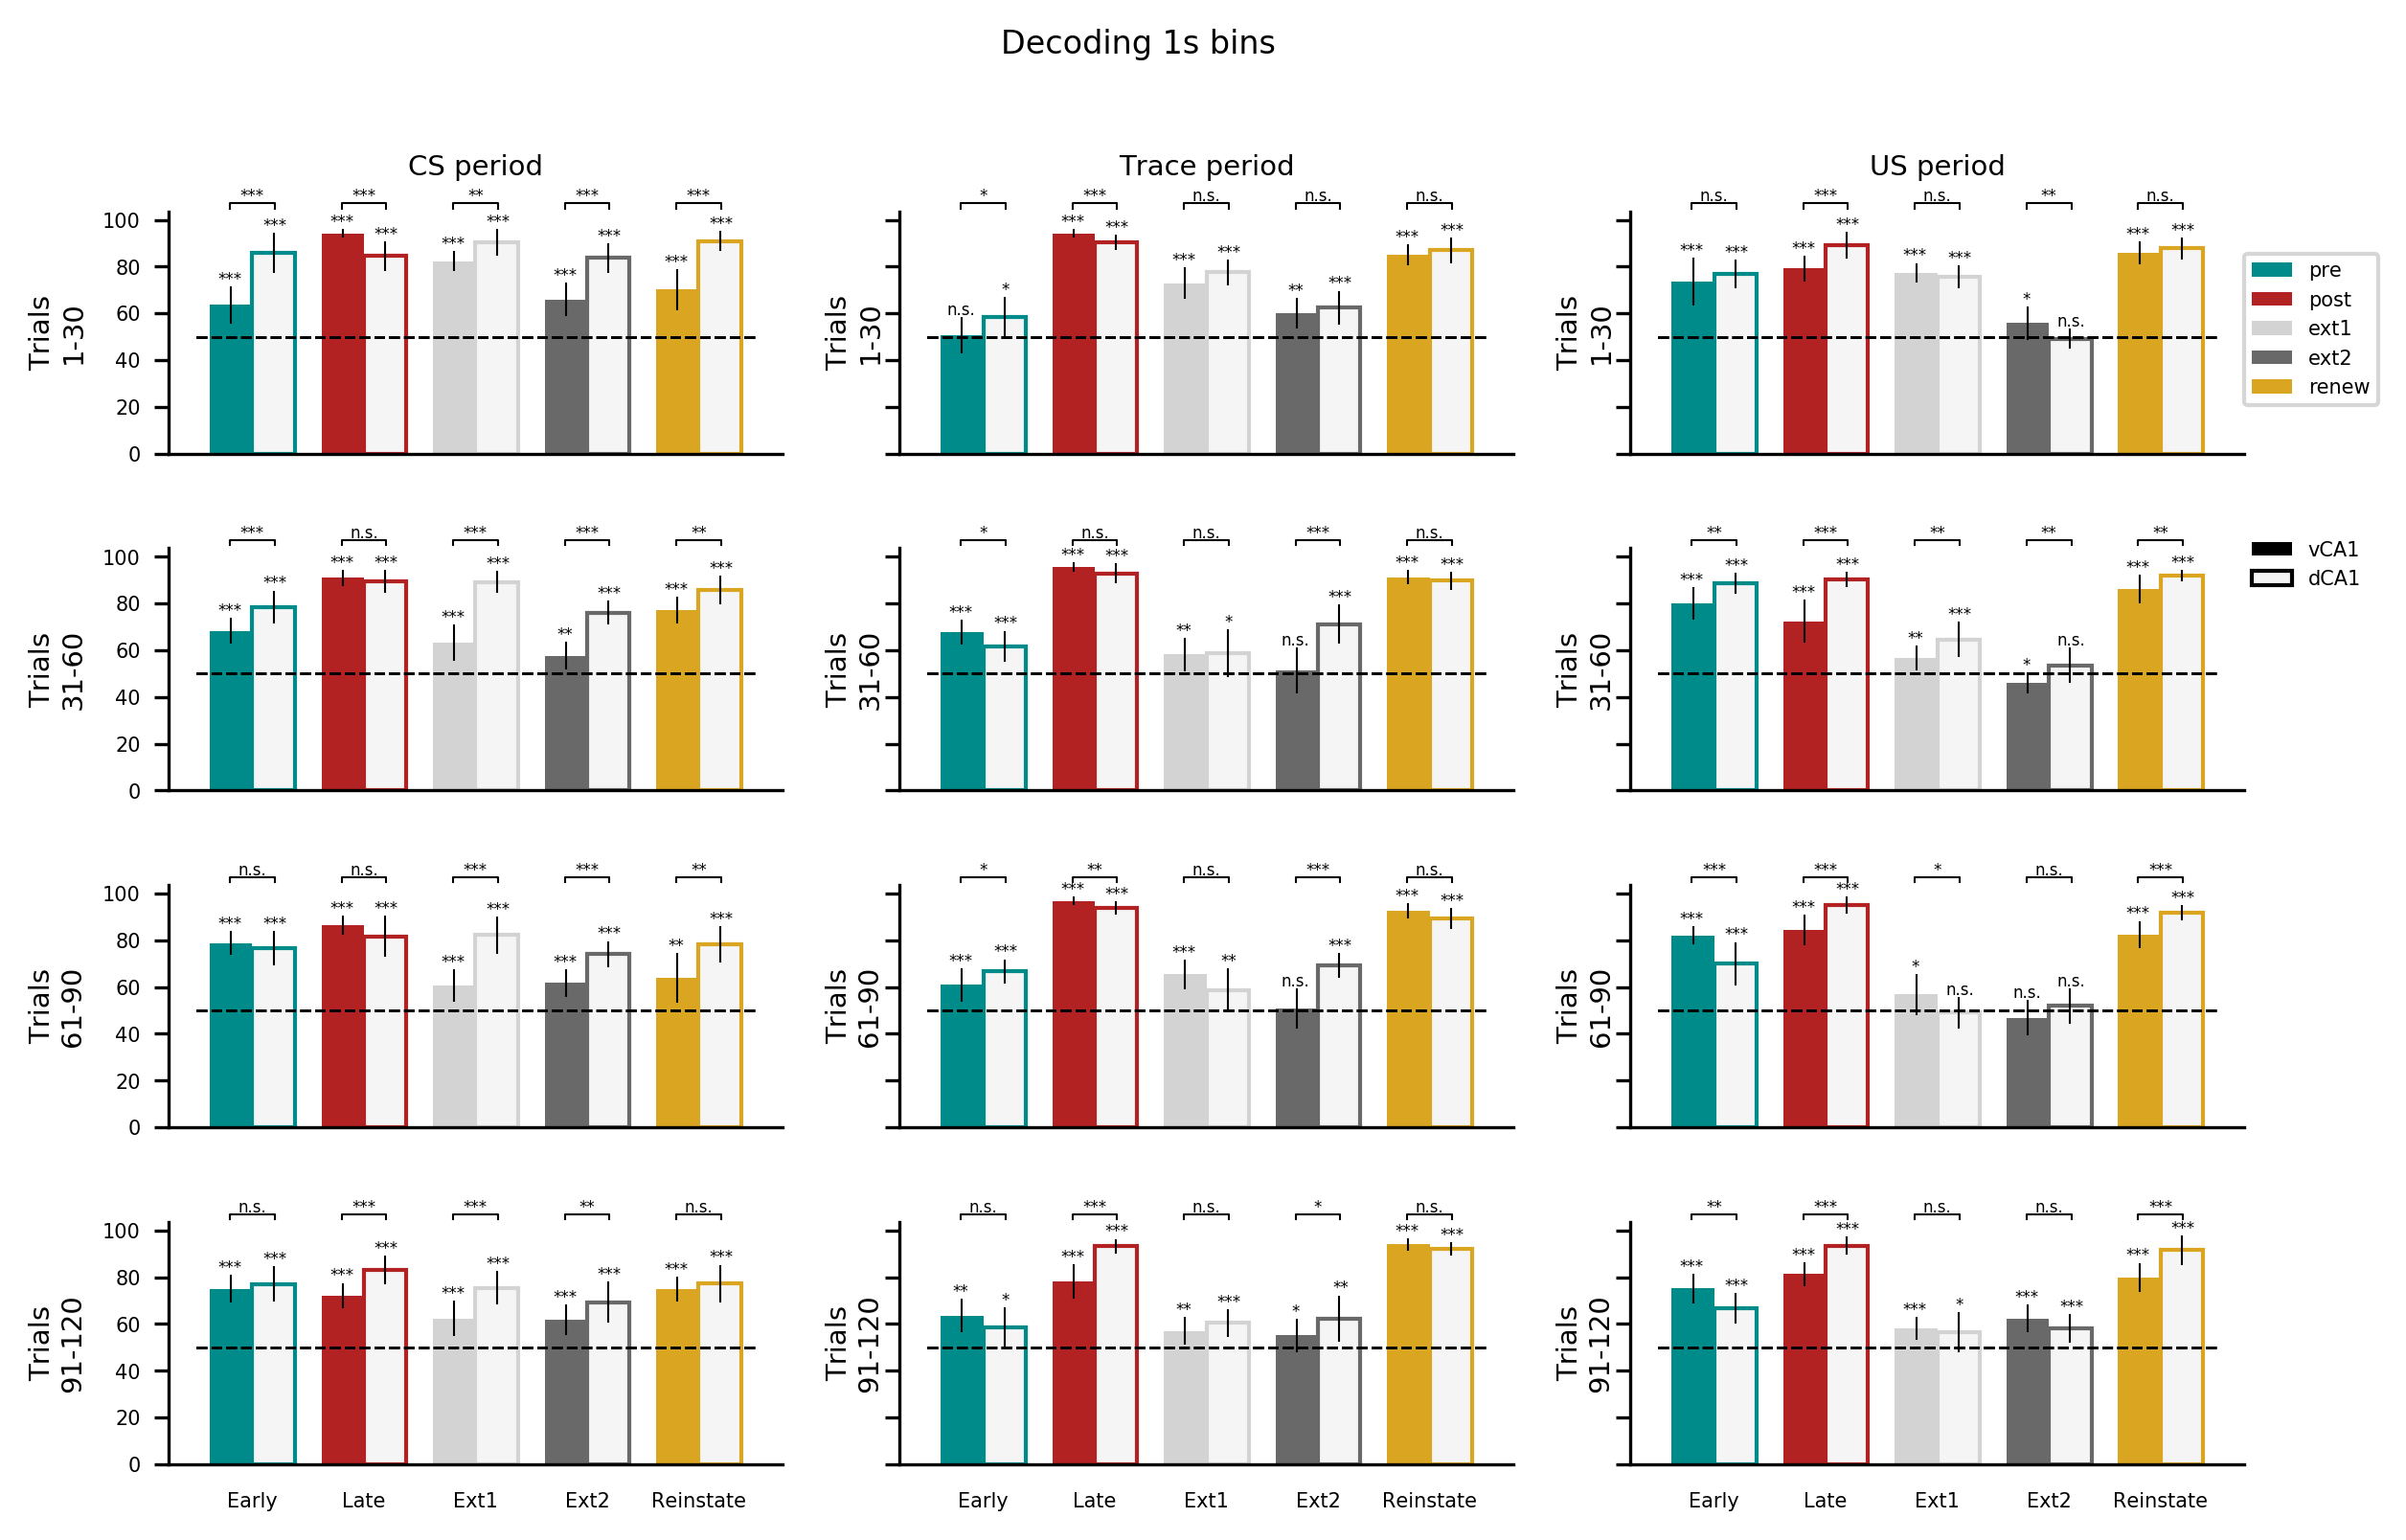

In [258]:
from matplotlib.patches import Patch
labels = session_labels[1:]
l = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots(4,3,figsize=(8,5),sharex=True,sharey=True)
for phase,phase_la,co,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],['1-30','31-60','61-90','91-120'],
                     (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):  
        for sess,c,i in zip(sessions[1:],dark_co[1:],range(len(sessions[1:]))):
            v[sess+tb_la+phase] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
            ax[z][x].bar(i - width/2, np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100, width, color=c,yerr=v[sess+tb_la+phase],label=sess)
            d[sess+tb_la+phase] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
            ax[z][x].bar(i + width/2,  np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess+tb_la+phase])
            ax[z][x].hlines(50,-.5,4.5, color='k', lw=.7, linestyles='dashed')
            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax[z][x].set_ylabel('Trials\n'+phase_la)
            #ax.set_title('Decoding During CS')
            ax[z][x].set_xticks(l)
            ax[z][x].set_xticklabels(labels)
            ax[0][2].legend(loc=(1,.2))
            ax[1][2].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
            ax[z][x].tick_params(axis='x',bottom=False)
            ax[0][x].set_title(tb_la+' period',y=1.05)
pvs=[]
for phase,co,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                     (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):  
        for sess,i in zip(sessions[1:], range(len(sessions[1:]))):
            pvs.append(add_significance(ax[z][x], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)),
                                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)),-.2+i,0.2+i,107))
                #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
                #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
            pvs.append(sig_vs_chance(ax[z][x],eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)),.5,-.2+i,
                       np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100+v[sess+tb_la+phase]+1,loops=loops,sig_func=None,colors='k'))
            pvs.append(sig_vs_chance(ax[z][x],eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)),.5, .2+i,
                       np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100+d[sess+tb_la+phase]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding 1s bins',y=1.06,fontsize=8)
fig.tight_layout(pad=2,h_pad=4)

#fig.savefig('../img/%s_gmin_bars_phases_kitchenSink.pdf'%NOTEBOOK_NAME)

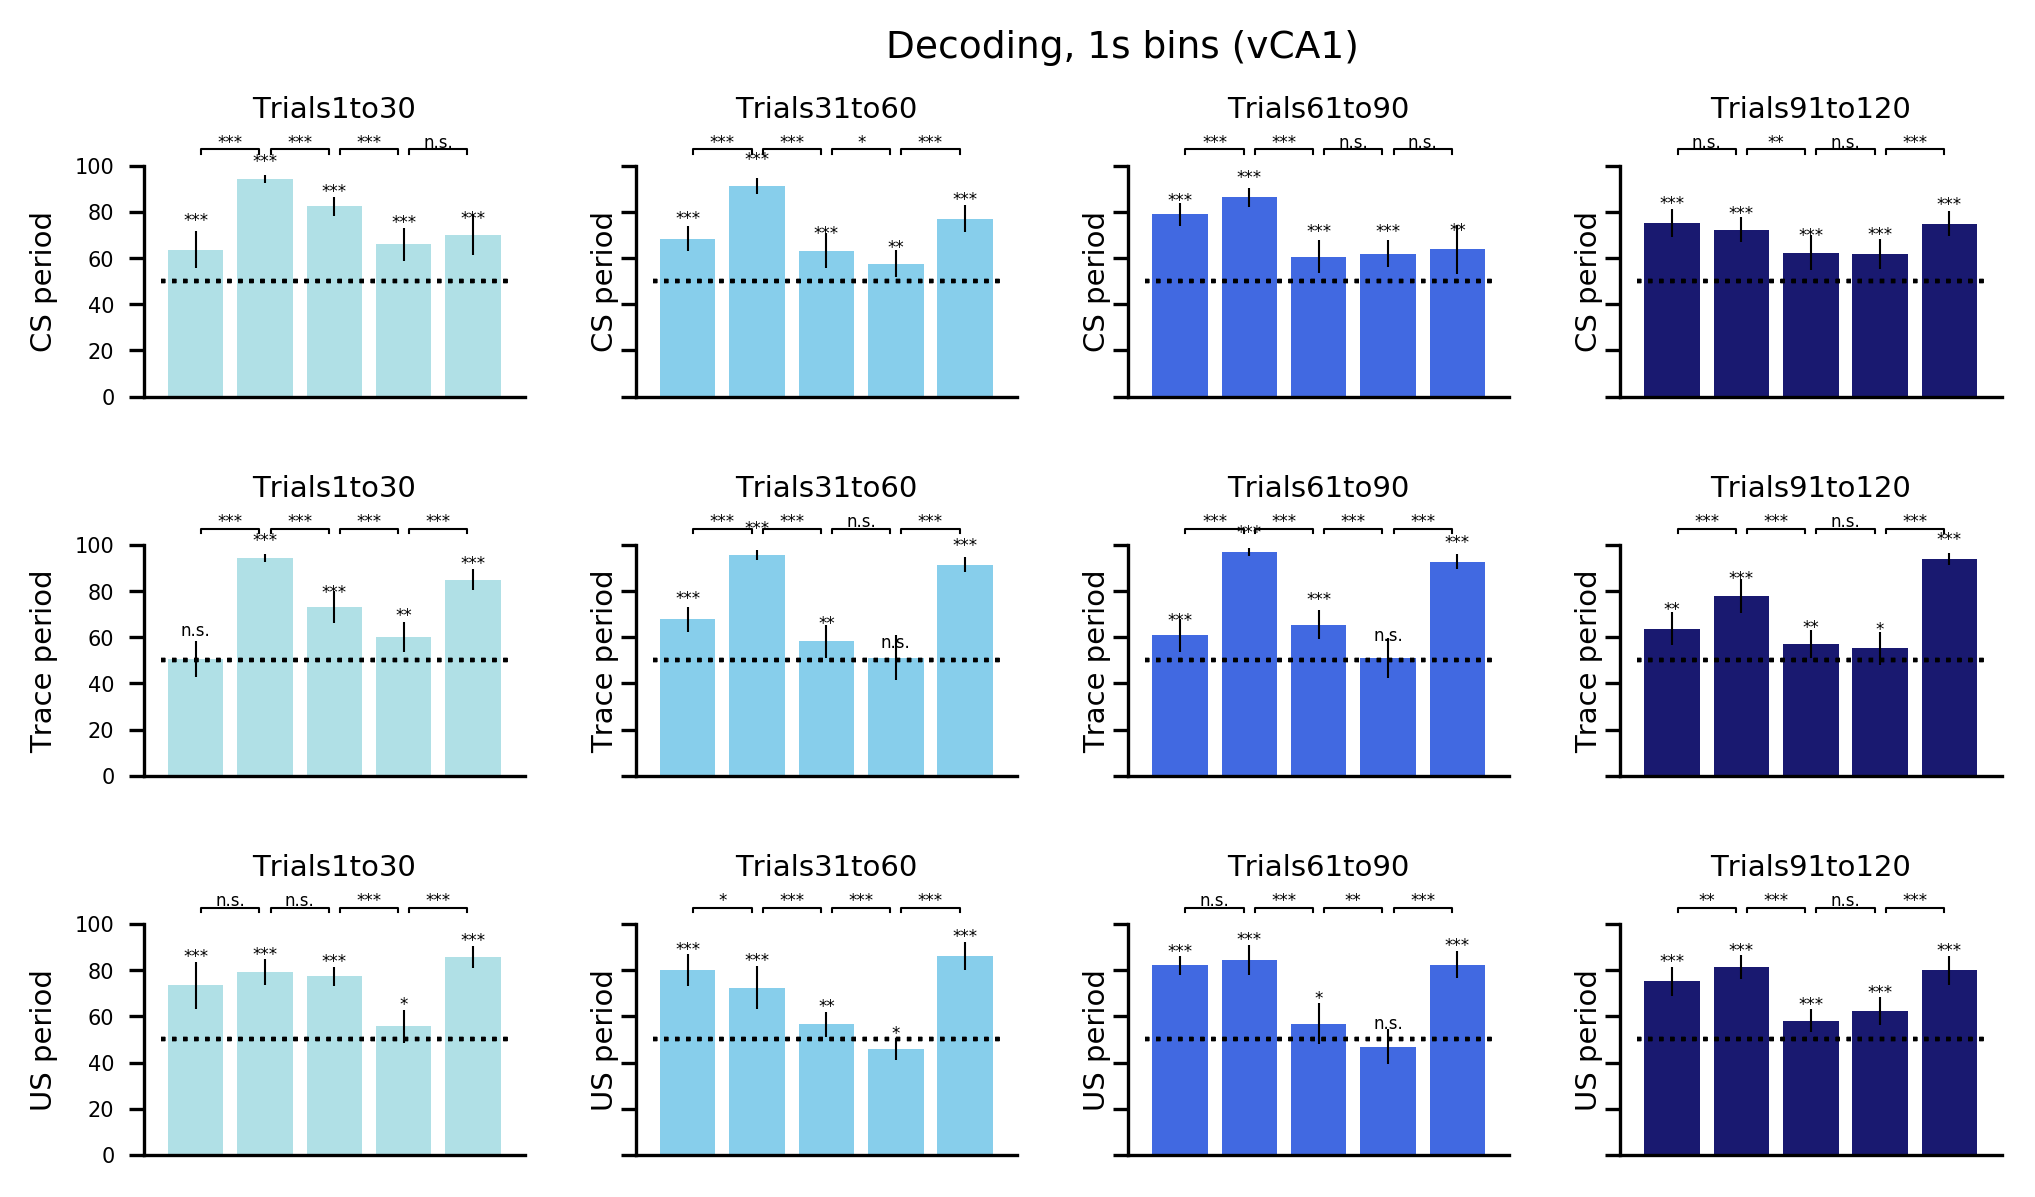

In [444]:
fig,ax = pl.subplots(3,4,figsize=(7,4),sharex=True,sharey=True)
labels = session_labels[1:]
l = np.arange(len(labels))  # the label locations
s={}
loops=10

#for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','midnightblue')),range(4)):
#    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
#        for r,r_la,i in zip(('dhpc','vhpc',),('dCA1','vCA1'),(0,1)):
for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
        for r in ('vhpc'),:
            for sess,zz in zip(sessions[1:],range(len(sessions[1:]))):
                for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                                     (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
                    s[sess+phase+r] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)))*100)
                    ax[x][z].bar(zz, (np.mean(eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)))*100),
                                 color=c,label=phase,yerr=s[sess+phase+r])
                    ax[x][z].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
                    ax[x][z].set_ylabel(tb_la+' period')
                    ax[x][z].set_ylim(0,100)
                    ax[x][z].hlines(50, -.5,4.5, color='k', lw=1, linestyles='dotted')
                    ax[x][z].set_title(phase,y=1.1)
                    ax[x][z].set_xticks(l)
                    ax[x][z].set_xticklabels(labels)
#ax[0][1].legend(loc=(1,0))
pl.suptitle('Decoding, 1s bins (vCA1)',fontsize=9,x=.55,y=1)

pvs=[]
phases=['Trials1to30','Trials31to60','Trials61to90','Trials91to120']
for r in ('vhpc'),:
    for tb,x in zip((6,8,10),(range(3))):
        for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                                (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
            for zz,zzz in zip((range(1,6)),range(4)):
                pvs.append(add_significance(ax[x][z], eval("mean_scores_gmin_tb_%s_%s_%s[sessions[zz]][:loops]"%(tb,phase,r)),
                                    eval("mean_scores_gmin_tb_%s_%s_%s[sessions[zz+1]][:loops]"%(tb,phase,r)),zzz+.08,.92+zzz,107))
        #max(np.mean(mean_scores_gmin_tb_10_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess])+6))
            for sess,zzz in zip((sessions[1:]),range(5)):
                pvs.append(sig_vs_chance(ax[x][z],eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)),.5,zzz,
                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s[sess][:loops])"%(tb,phase,r))*100+s[sess+phase+r],loops=loops,colors='k'))
        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_gmin_phases_Reinstate_bars.pdf'%NOTEBOOK_NAME)

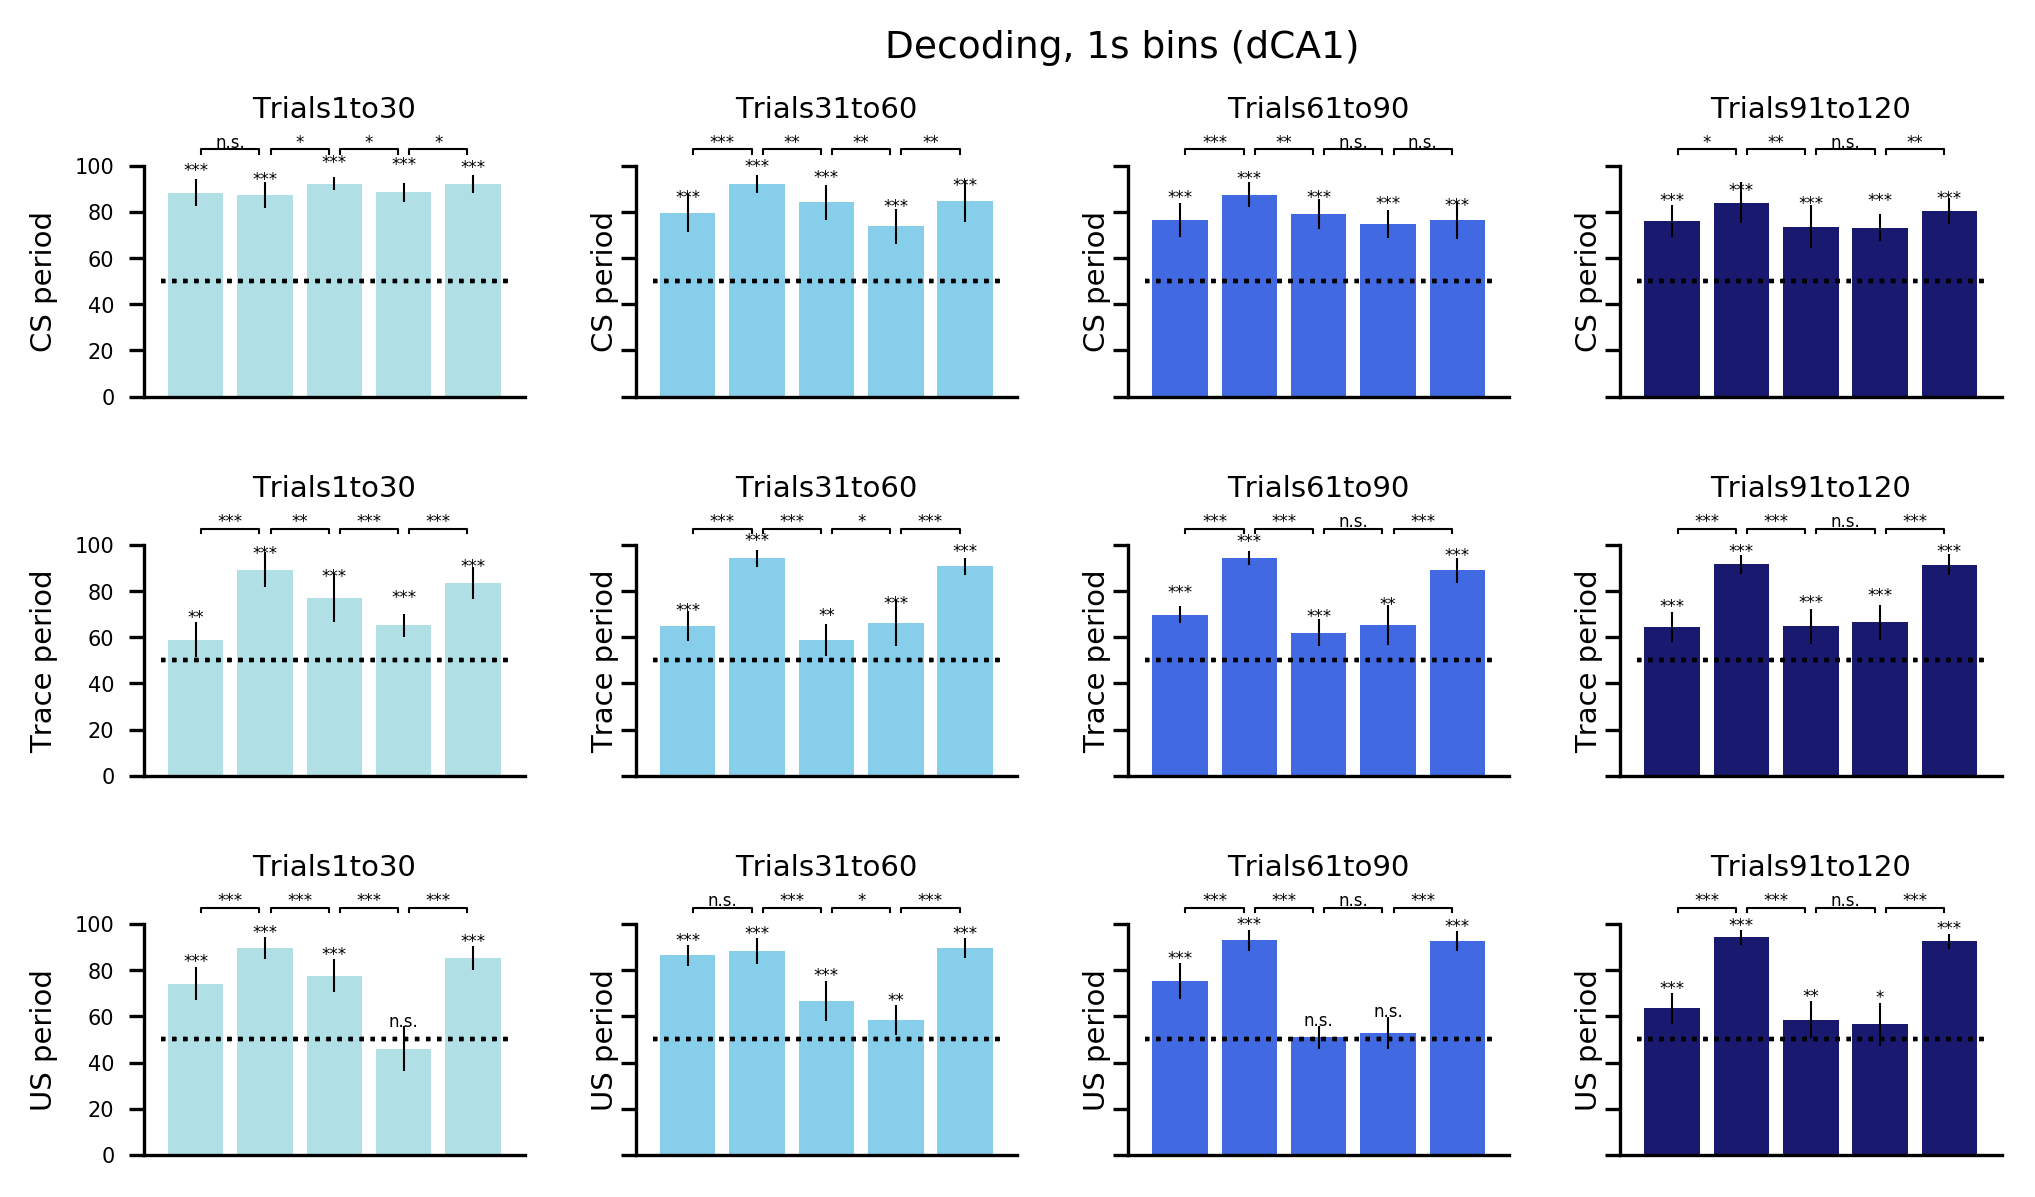

In [445]:
fig,ax = pl.subplots(3,4,figsize=(7,4),sharex=True,sharey=True)
labels = session_labels[1:]
l = np.arange(len(labels))  # the label locations
s={}
loops=10

for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
        for r in ('dhpc'),:
            for sess,zz in zip(sessions[1:],range(len(sessions[1:]))):
                for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                                     (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
                    s[sess+phase+r] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)))*100)
                    ax[x][z].bar(zz, (np.mean(eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)))*100),
                                 color=c,label=phase,yerr=s[sess+phase+r])
                    ax[x][z].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
                    ax[x][z].set_ylabel(tb_la+' period')
                    ax[x][z].set_ylim(0,100)
                    ax[x][z].hlines(50, -.5,4.5, color='k', lw=1, linestyles='dotted')
                    ax[x][z].set_title(phase,y=1.1)
                    ax[x][z].set_xticks(l)
                    ax[x][z].set_xticklabels(labels)
#ax[0][1].legend(loc=(1,0))
pl.suptitle('Decoding, 1s bins (dCA1)',fontsize=9,x=.55,y=1)

pvs=[]
phases=['Trials1to30','Trials31to60','Trials61to90','Trials91to120']
for r in ('dhpc'),:
    for tb,x in zip((6,8,10),(range(3))):
        for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],
                                (('powderblue','skyblue','royalblue','midnightblue')),range(4)):
            for zz,zzz in zip((range(1,6)),range(4)):
                pvs.append(add_significance(ax[x][z], eval("mean_scores_gmin_tb_%s_%s_%s[sessions[zz]][:loops]"%(tb,phase,r)),
                                    eval("mean_scores_gmin_tb_%s_%s_%s[sessions[zz+1]][:loops]"%(tb,phase,r)),zzz+.08,.92+zzz,107))
            for sess,zzz in zip((sessions[1:]),range(5)):
                pvs.append(sig_vs_chance(ax[x][z],eval("mean_scores_gmin_tb_%s_%s_%s[sess][:loops]"%(tb,phase,r)),.5,zzz,
                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s[sess][:loops])"%(tb,phase,r))*100+s[sess+phase+r],loops=loops,colors='k'))

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_gmin_phases_Reinstate_bars.pdf'%NOTEBOOK_NAME)

# Break up session into 3rds

In [446]:
v_name=[]
for t in range(16):
    for per in 'early','mid','late':
        for r in 'dhpc','vhpc':
            exec("scores_gmin_tb_%s_%s_%s = {}"%(t,per,r))
            for sess in sessions[1:]:
                exec("v_name = 'scores_gmin_tb_%s_%s'"%(t,per))
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_gmin_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,per,r))
                exec("scores_gmin_tb_%s_%s_%s_t = scores_gmin_tb_%s_%s_%s_t['%s']"%(t,per,r,t,per,r,sess))
                exec("scores_gmin_tb_%s_%s_%s['%s'] = scores_gmin_tb_%s_%s_%s_t"%(t,per,r,sess,t,per,r))

In [447]:
#get mean of each array
for t in range(16):
    for per in 'early','mid','late':
        for r in 'dhpc','vhpc':
            exec("mean_scores_gmin_tb_%s_%s_%s={}"%(t,per,r))
            for sess in sessions[1:]:
                exec("mean_scores_gmin_tb_%s_%s_%s[sess]=[]"%(t,per,r))
                for i in eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,per,r)):
                    exec("mean_scores_gmin_tb_%s_%s_%s[sess].append(i.mean())"%(t,per,r))

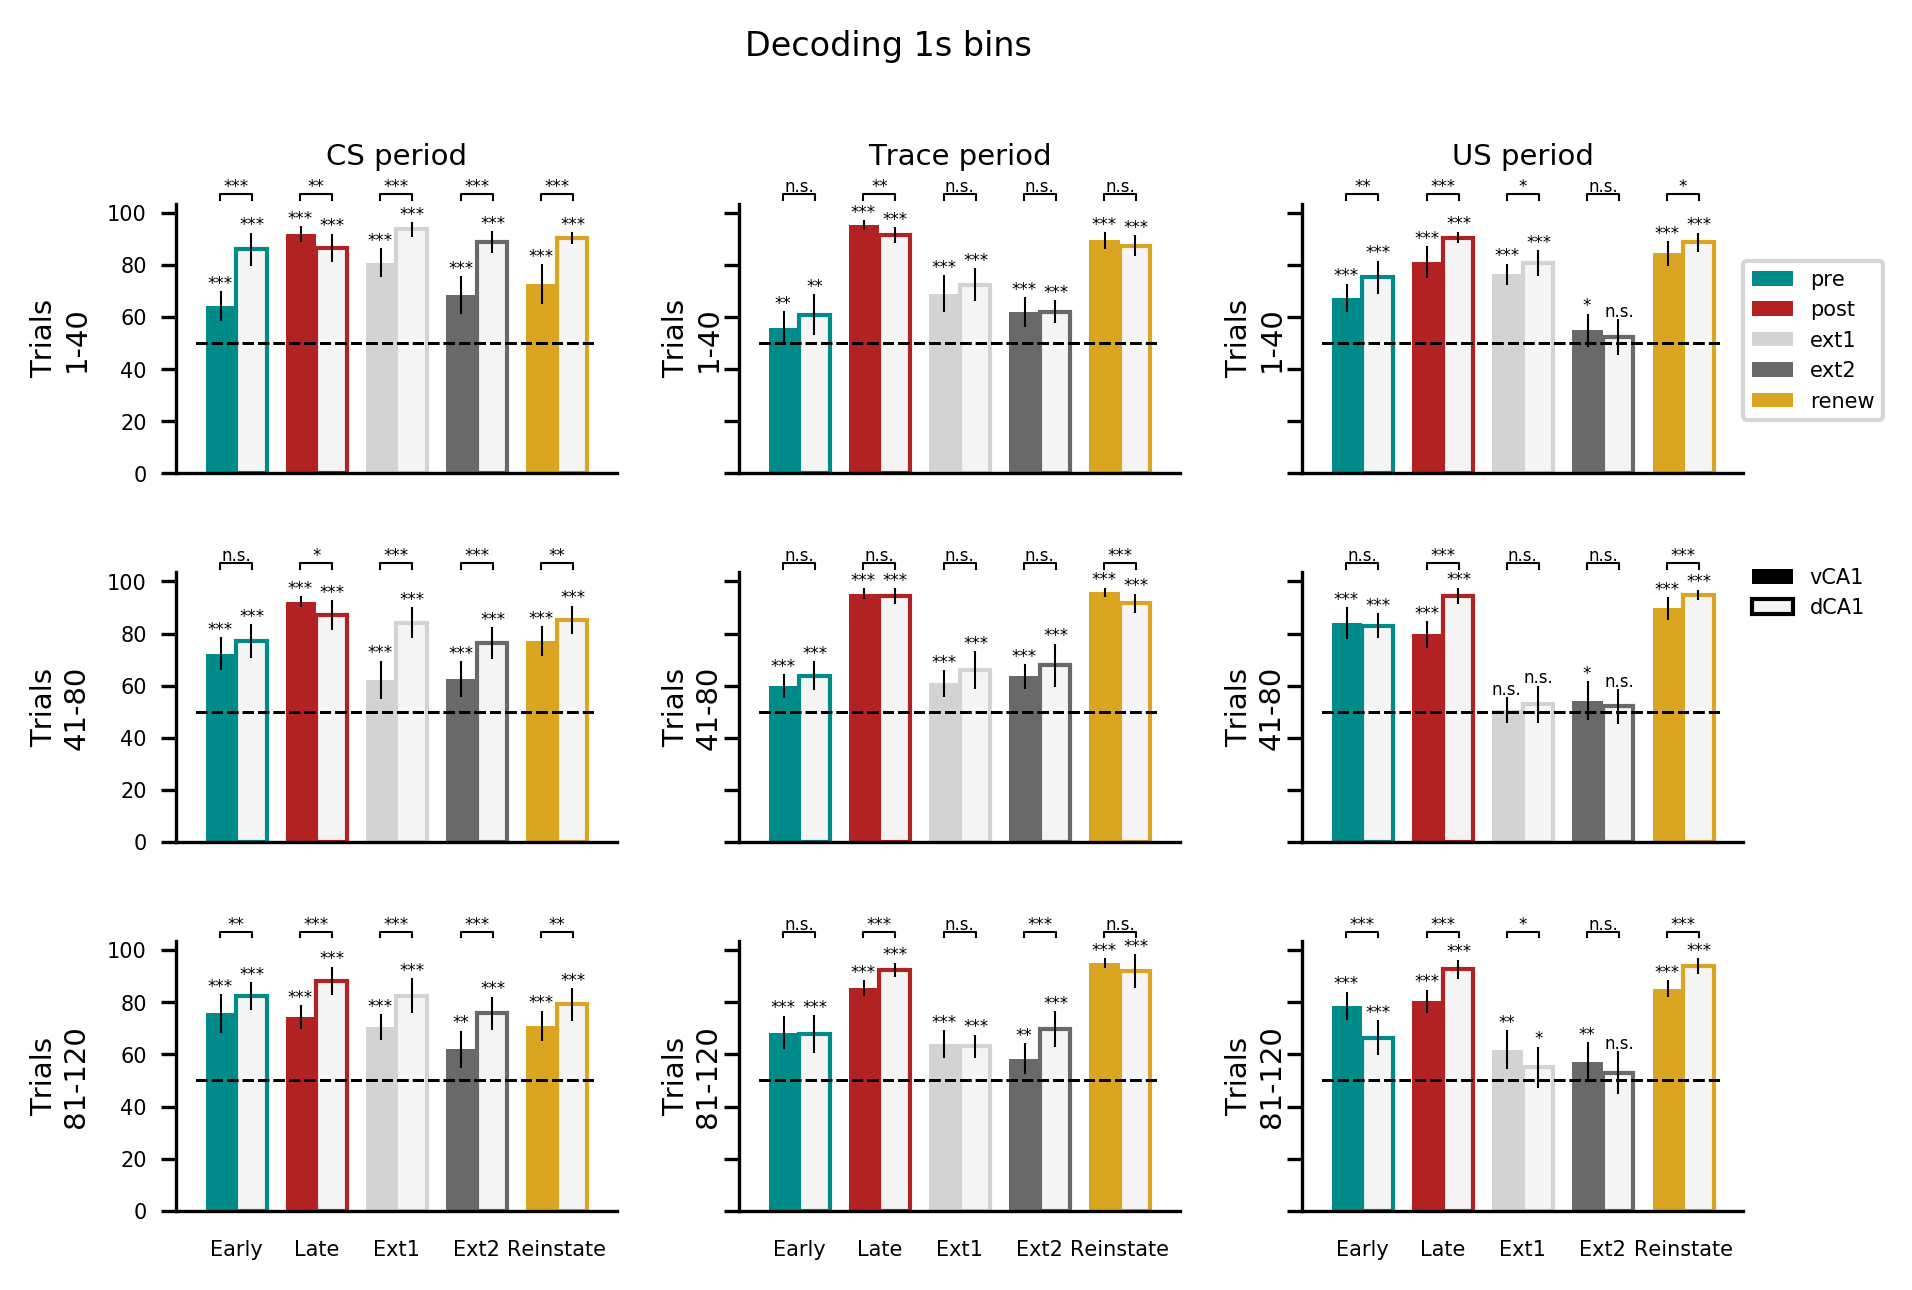

In [448]:
from matplotlib.patches import Patch
labels = session_labels[1:]
l = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}

fig, ax = pl.subplots(3,3,figsize=(6,4),sharex=True,sharey=True)
for phase,phase_la,co,z in zip(['early','mid','late'],['1-40','41-80','81-120'],
                     (('skyblue','royalblue','midnightblue')),range(3)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):  
        for sess,c,i in zip(sessions[1:],dark_co[1:],range(len(sessions[1:]))):
            v[sess+tb_la+phase] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
            ax[z][x].bar(i - width/2, np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100, width, color=c,yerr=v[sess+tb_la+phase],label=sess)
            d[sess+tb_la+phase] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
            ax[z][x].bar(i + width/2,  np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess+tb_la+phase])
            ax[z][x].hlines(50,-.5,4.5, color='k', lw=.7, linestyles='dashed')
            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax[z][x].set_ylabel('Trials\n'+phase_la)
            #ax.set_title('Decoding During CS')
            ax[z][x].set_xticks(l)
            ax[z][x].set_xticklabels(labels)
            ax[0][2].legend(loc=(1,.2))
            ax[1][2].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
            ax[z][x].tick_params(axis='x',bottom=False)
            ax[0][x].set_title(tb_la+' period',y=1.05)
            
pvs=[]
for phase,co,z in zip(['early','mid','late'],('skyblue','royalblue','midnightblue'),range(3)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):  
        for sess,i in zip(sessions[1:], range(len(sessions[1:]))):
            pvs.append(add_significance(ax[z][x], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)),
                                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)),-.2+i,0.2+i,107))
                #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
                #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
            pvs.append(sig_vs_chance(ax[z][x],eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)),.5,-.2+i,
                       np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100+v[sess+tb_la+phase]+1,loops=loops,sig_func=None,colors='k'))
            pvs.append(sig_vs_chance(ax[z][x],eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)),.5, .2+i,
                       np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100+d[sess+tb_la+phase]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding 1s bins',y=1.06,fontsize=8)
fig.tight_layout(pad=2,h_pad=4)

fig.savefig('../img/%s_gmin_bars_3rdsPhases_kitchenSink.pdf'%NOTEBOOK_NAME)

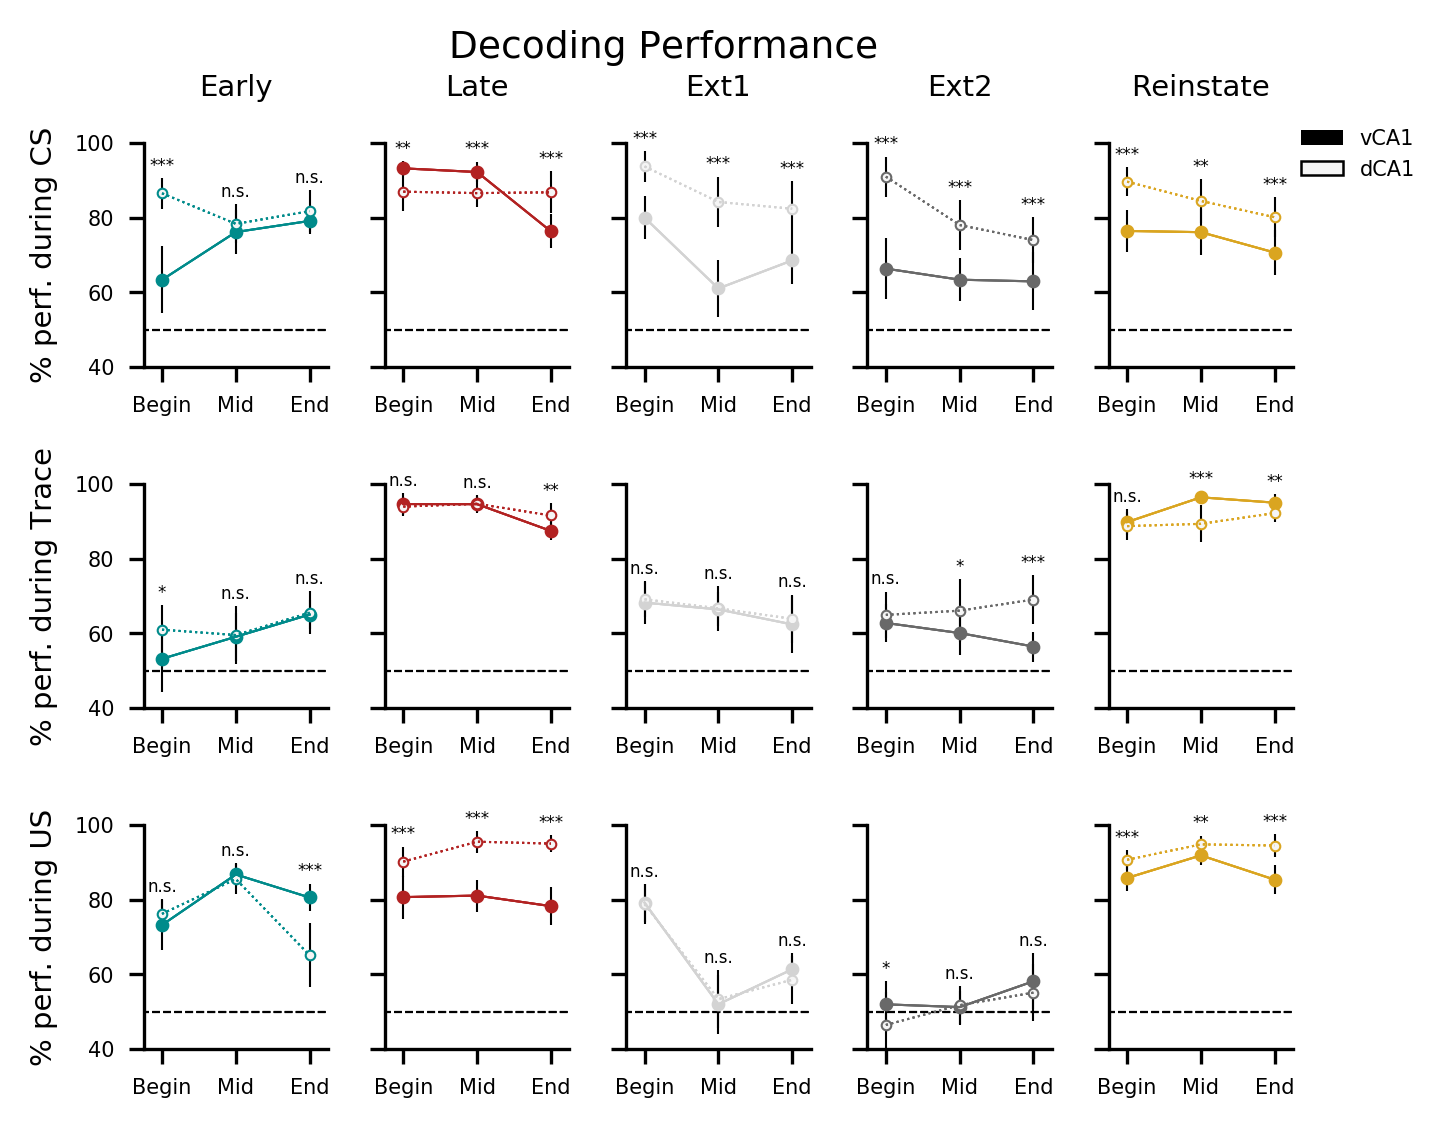

In [55]:
fig,ax = pl.subplots(3,5,figsize=(4.5,3.7),sharey=True)
v={}
d={}
phases=['early','mid','late']
loops=10
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for phase,z in zip(['early','mid','late'],(.2,1,1.8)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                v[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100), 'o', color=dark_co[q+1],
                           markersize=2.3)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100),yerr=v[sess+phase+tb_la],
                              color='k')
                d[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                           markersize=2.3,mec=dark_co[q+1],mew=.5)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100),yerr=d[sess+phase+tb_la],
                              color='k')
# Add connecting lines 
for sess,sess_la,q in zip(sessions[1:],('Early','Late','Ext1','Ext2','Reinstate'), range(len(sessions[1:]))):
    for phase,z in zip(['early','mid','late'],(.2,1,1.8)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                ax[x][q].plot([p for p in (.2,1,1.8)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1])
                ax[x][q].plot([p for p in (.2,1,1.8)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1],linestyle='dotted')
            
           #ax[x].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
                ax[x][0].set_ylabel('% perf. during '+tb_la)
                ax[x][q].set_ylim(40,100)
                ax[x][q].hlines(50, -.5,2.5, color='k', lw=.5, linestyles='--')
                ax[0][q].set_title(sess_la,y=1.1)
                ax[x][q].set_xlim(0,2)
                ax[x][q].set_xticks((.2,1,1.8))
                ax[x][q].set_xticklabels(['Begin','Mid','End'])
                ax[0][4].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k',linewidth=.6)],['vCA1','dCA1'],loc=(1,.8),frameon=False)

#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding Performance',fontsize=9,x=.5,y=1)

pvs=[]
phases=['early','mid','late']
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
        for i,z in zip(range(3),(.2,1,1.8)):
            pvs.append(add_significance(ax[x][q], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phases[i])),
                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phases[i])),z,z,
                        max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops])"%(tb,phases[i]))*100+v[sess+phases[i]+tb_la],
                        eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops])"%(tb,phases[i]))*100+d[sess+phases[i]+tb_la])+1,
                        ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(pad=2)

fig.savefig('../final-ish figures/%s_gmin_3rdsphases_ALLsess.pdf'%NOTEBOOK_NAME)

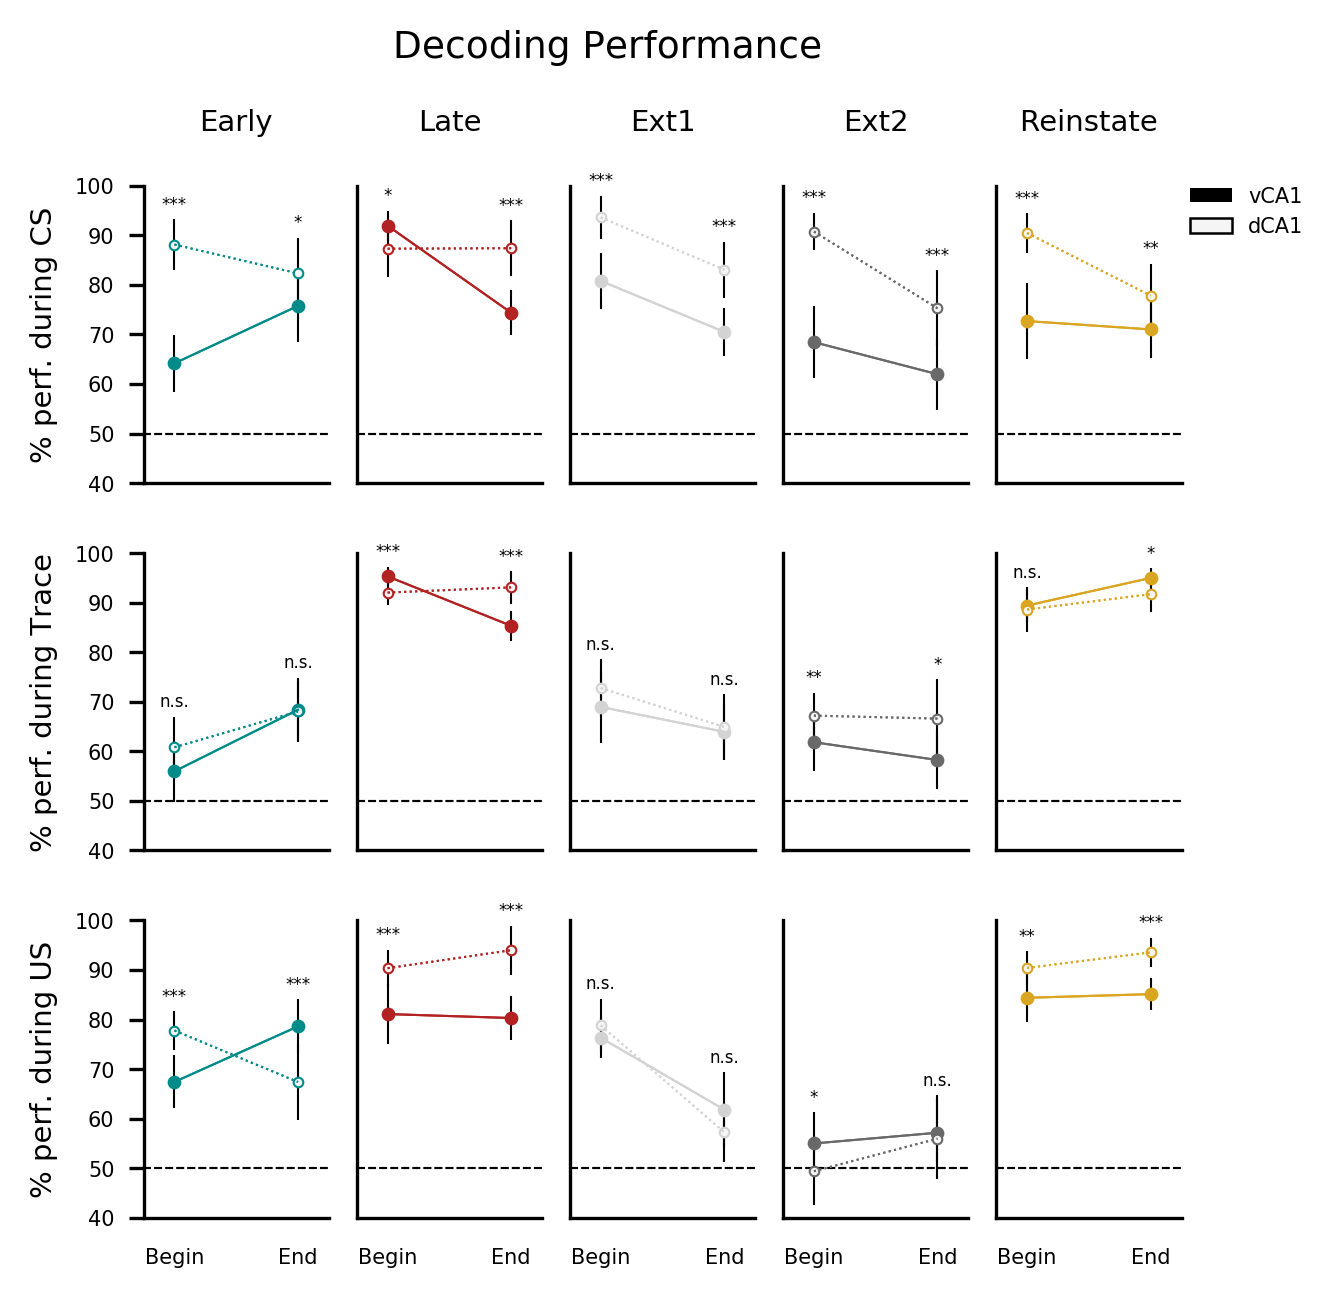

In [266]:
fig,ax = pl.subplots(3,5,figsize=(4,4),sharex=True,sharey=True)
v={}
d={}
phases=['early','late']
loops=10
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for phase,z in zip(['early','late'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                v[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100), 'o', color=dark_co[q+1],
                           markersize=2.3)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100),yerr=v[sess+phase+tb_la],
                              color='k')
                d[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                           markersize=2.3,mec=dark_co[q+1],mew=.5)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100),yerr=d[sess+phase+tb_la],
                              color='k')
# Add connecting lines 
for sess,sess_la,q in zip(sessions[1:],('Early','Late','Ext1','Ext2','Reinstate'), range(len(sessions[1:]))):
    for phase,z in zip(['early','late'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1])
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1],linestyle='dotted')
            
                ax[x][q].tick_params(axis='x',bottom=False,labelbottom=True)
                ax[x][q].tick_params(axis='y',left=False)
                ax[x][0].tick_params(axis='y',left=True)
                ax[x][0].set_ylabel('% perf. during '+tb_la)
                ax[x][q].set_ylim(40,100)
                ax[x][q].hlines(50, -.5,2.5, color='k', lw=.5, linestyles='--')
                ax[0][q].set_title(sess_la,y=1.1)
                ax[x][q].set_xlim(0,1.2)
                ax[x][q].set_xticks((.2,1))
                ax[x][q].set_xticklabels(['Begin','End'])
                ax[0][4].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k',linewidth=.6)],['vCA1','dCA1'],loc=(1,.8),frameon=False)

#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding Performance',fontsize=9,x=.5,y=1.05)

pvs=[]
phases=['early','late']
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
        for i,z in zip(range(2),(.2,1)):
            pvs.append(add_significance(ax[x][q], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phases[i])),
                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phases[i])),z,z,
                        max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops])"%(tb,phases[i]))*100+v[sess+phases[i]+tb_la],
                        eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops])"%(tb,phases[i]))*100+d[sess+phases[i]+tb_la])+1,
                        ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(w_pad=1,h_pad=2)

fig.savefig('../img/%s_gmin_BegEnd_ALLsess.jpg'%NOTEBOOK_NAME)

### export data to .CSV file for offline stats analysis (2-way ANOVA) - NEED TO UPDATE THIS NOW THAT NEW DATA HAS BEEN ADDED

In [51]:
import csv

#header1 = ['Early','Late','Ext1','Ext2','Reinstate']
#header2 = ['CS','CS','CS','CS','Trace','Trace','Trace','Trace','US','US','US','US']
#header3 = ['vhpc','vhpc','dhpc','dhpc','vhpc','vhpc','dhpc','dhpc','vhpc','vhpc','dhpc','dhpc']
#header4 = ['Begin','End','Begin','End','Begin','End','Begin','End','Begin','End','Begin','End']
#header1 = np.repeat(header1,12)
#header2 = header2*5
#header3 = header3*5
#header4 = header4*5

with open('Begin_End_scores_ALL_alt.csv', 'w') as csvfile:    #open fiile in write mode ('w')
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    ## writing the fields  
    #csvwriter.writerows(header1)
    #csvwriter.writerows(header2)
    #csvwriter.writerows(header3)
    #csvwriter.writerows(header4)
    
    csvwriter.writerow(['session','epoch','region','period','score'])    #write header row
    for sess in sessions[1:]:
        for h2,pha in zip([6,8,10],['CS','Trace','US']):
            for h3 in ['vhpc','dhpc']:
                for h4 in ['early','late']:
                    for i in range(loops):
                        csvwriter.writerow([sess,pha,h3,h4, eval("mean_scores_gmin_tb_%s_%s_%s[sess][i]"%(h2,h4,h3))])

In [52]:
import pandas as pd

#create a pandas dataframe to perform 2-way anova
df = pd.read_csv("Begin_End_scores_ALL_alt.csv")
df.head(5)

session epoch region period   score
0     pre    CS   vhpc  early  0.5800
1     pre    CS   vhpc  early  0.5725
2     pre    CS   vhpc  early  0.5450
3     pre    CS   vhpc  early  0.5825
4     pre    CS   vhpc  early  0.6500

In [53]:
#get subset of data
df_postCS = df.query('session == "post" & epoch == "CS"')

In [54]:
df_postCS.head(5)

session epoch region period   score
180    post    CS   vhpc  early  0.9325
181    post    CS   vhpc  early  0.9200
182    post    CS   vhpc  early  0.9500
183    post    CS   vhpc  early  0.8975
184    post    CS   vhpc  early  0.9525

In [55]:
#can't get statsmodels to work, so just working with extraced .csv file offline

In [56]:
#import .csv file with 2way ANOVA results
df_2way_results = pd.read_csv("../img/2odor 2way ANOVA - region x time.csv")
test = df_2way_results['Prob>|t|']
df_2way_results.head(4)

epoch session                        Term  Estimate  Std Error  t Ratio  \
0    CS    ext1                   Intercept  0.821833   0.006636   123.85   
1    CS    ext1                region[dhpc]  0.068000   0.006636    10.25   
2    CS    ext1               period[early]  0.061167   0.006636     9.22   
3    CS    ext1  region[dhpc]*period[early] -0.007000   0.006636    -1.05   

  Prob>|t|  
0   <.0001  
1   <.0001  
2   <.0001  
3    0.296

In [57]:
# get rid of the "<.0001" and replace with just 0
df_2way_results ['Prob>|t|'] = pd.to_numeric(df_2way_results['Prob>|t|'], errors='coerce')
df_2way_results = df_2way_results.replace(np.nan, 0, regex=True)
df_2way_results.head(4)

epoch session                        Term  Estimate  Std Error  t Ratio  \
0    CS    ext1                   Intercept  0.821833   0.006636   123.85   
1    CS    ext1                region[dhpc]  0.068000   0.006636    10.25   
2    CS    ext1               period[early]  0.061167   0.006636     9.22   
3    CS    ext1  region[dhpc]*period[early] -0.007000   0.006636    -1.05   

   Prob>|t|  
0     0.000  
1     0.000  
2     0.000  
3     0.296

In [58]:
#extract the main in interaction pvals for each epoch x session combo
for epok in ('CS','Trace','US'):
    for sess in sessions[1:]:
        exec("%s_%s_pvals = {}"%(epok,sess))
        for term,term_la in zip(('region','period','interaction'),('region[dhpc]','period[early]','region[dhpc]*period[early]')):
            exec("%s_%s_pvals[term] = df_2way_results.query('epoch == \"%s\" & session == \"%s\" & Term == \"%s\"')"%(epok,sess,epok,sess,term_la))
            exec("%s_%s_pvals[term] = list(%s_%s_pvals[term]['Prob>|t|'])"%(epok,sess,epok,sess))

In [59]:
CS_ext1_pvals['interaction'][0]

0.29600000000000004

In [60]:
def add_2way_sig(ax, sess, epoch, x, y, thresholds=(0.05, 0.01, 0.001)):
    p_reg = eval("%s_%s_pvals['region'][0]"%(epoch,sess))
    p_per = eval("%s_%s_pvals['period'][0]"%(epoch,sess))
    p_interac = eval("%s_%s_pvals['interaction'][0]"%(epoch,sess))
    for tex,i,ps in zip(('region','period','r X p   '),(8,4,0),(p_reg,p_per,p_interac)):
        ax.text(x, y+i, tex+': '+
            ('n.s.' if ps>thresholds[0] else
            '*' if ps>thresholds[1] else
            '**' if ps>thresholds[2] else
            '***'),
            ha='left', fontsize=3.5)
    return p

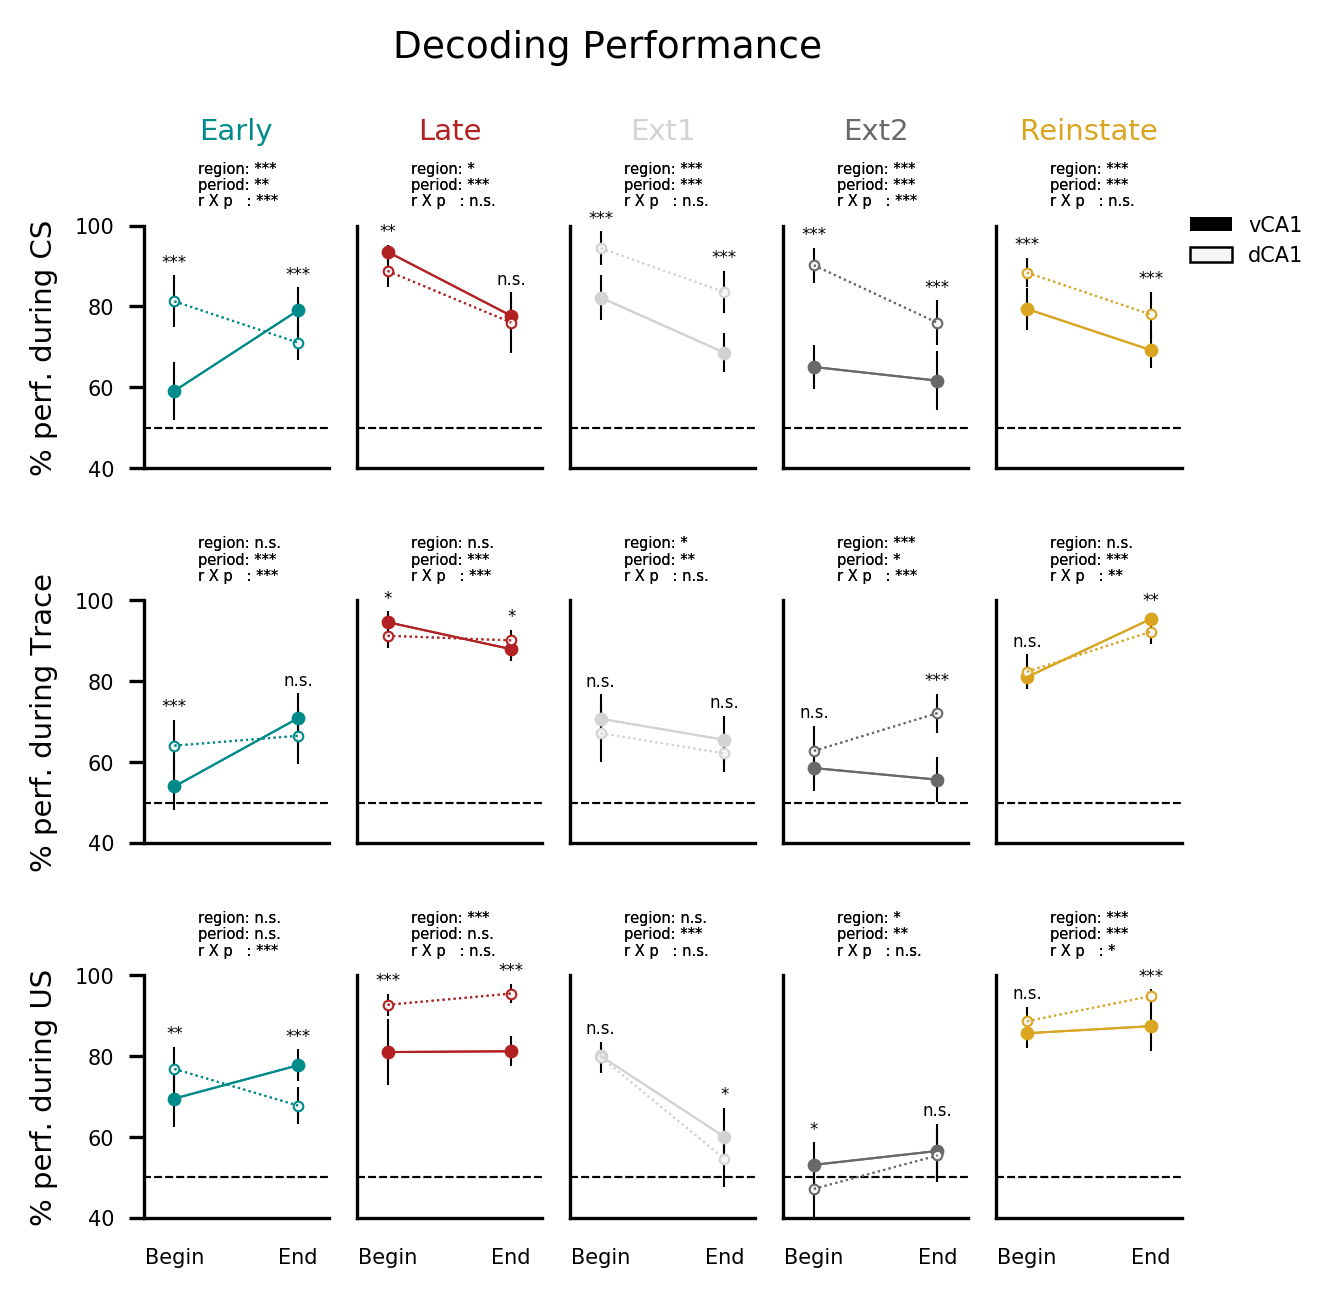

In [61]:
fig,ax = pl.subplots(3,5,figsize=(4,4),sharex=True,sharey=True)
v={}
d={}
phases=['early','late']
loops=10
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for phase,z in zip(['early','late'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                v[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100), 'o', color=dark_co[q+1],
                           markersize=2.3)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100),yerr=v[sess+phase+tb_la],
                              color='k')
                d[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                           markersize=2.3,mec=dark_co[q+1],mew=.5)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100),yerr=d[sess+phase+tb_la],
                              color='k')
# Add connecting lines 
for sess,sess_la,q in zip(sessions[1:],('Early','Late','Ext1','Ext2','Reinstate'), range(len(sessions[1:]))):
    for phase,z in zip(['early','late'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1])
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1],linestyle='dotted')
            
                ax[x][q].tick_params(axis='x',bottom=False,labelbottom=True)
                ax[x][q].tick_params(axis='y',left=False)
                ax[x][0].tick_params(axis='y',left=True)
                ax[x][0].set_ylabel('% perf. during '+tb_la)
                ax[x][q].set_ylim(40,100)
                ax[x][q].hlines(50, -.5,2.5, color='k', lw=.5, linestyles='--')
                ax[0][q].set_title(sess_la,y=1.25,color=dark_co[q+1])
                ax[x][q].set_xlim(0,1.2)
                ax[x][q].set_xticks((.2,1))
                ax[x][q].set_xticklabels(['Begin','End'])
                ax[0][4].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k',linewidth=.6)],['vCA1','dCA1'],loc=(1,.8),frameon=False)

#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding Performance',fontsize=9,x=.5,y=1.05)

pvs=[]

phases=['early','late']
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
        for i,z in zip(range(2),(.2,1)):
            pvs.append(add_significance(ax[x][q], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phases[i])),
                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phases[i])),z,z,
                        max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops])"%(tb,phases[i]))*100+v[sess+phases[i]+tb_la],
                        eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops])"%(tb,phases[i]))*100+d[sess+phases[i]+tb_la])+1,
                        ticksize=0))
            add_2way_sig(ax[x][q],sess,tb_la,.35,105)
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(w_pad=1,h_pad=5)

fig.savefig('../img/%s_gmin_BegEnd_ALLsess.pdf'%NOTEBOOK_NAME)

### break up into even finer subsets

In [164]:
v_name=[]
for t in range(16):
    for per in 'Trials1to20','Trials21to40','Trials81to100','Trials101to120':
        for r in 'dhpc','vhpc':
            exec("scores_gmin_tb_%s_%s_%s = {}"%(t,per,r))
            for sess in sessions[1:]:
                exec("v_name = 'scores_gmin_tb_%s_%s'"%(t,per))
                exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_wBs/'"%(r))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_gmin_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,per,r))
                exec("scores_gmin_tb_%s_%s_%s_t = scores_gmin_tb_%s_%s_%s_t['%s']"%(t,per,r,t,per,r,sess))
                exec("scores_gmin_tb_%s_%s_%s['%s'] = scores_gmin_tb_%s_%s_%s_t"%(t,per,r,sess,t,per,r))

In [165]:
#get mean of each array
for t in range(16):
    for per in 'Trials1to20','Trials21to40','Trials81to100','Trials101to120':
        for r in 'dhpc','vhpc':
            exec("mean_scores_gmin_tb_%s_%s_%s={}"%(t,per,r))
            for sess in sessions[1:]:
                exec("mean_scores_gmin_tb_%s_%s_%s[sess]=[]"%(t,per,r))
                for i in eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,per,r)):
                    exec("mean_scores_gmin_tb_%s_%s_%s[sess].append(i.mean())"%(t,per,r))

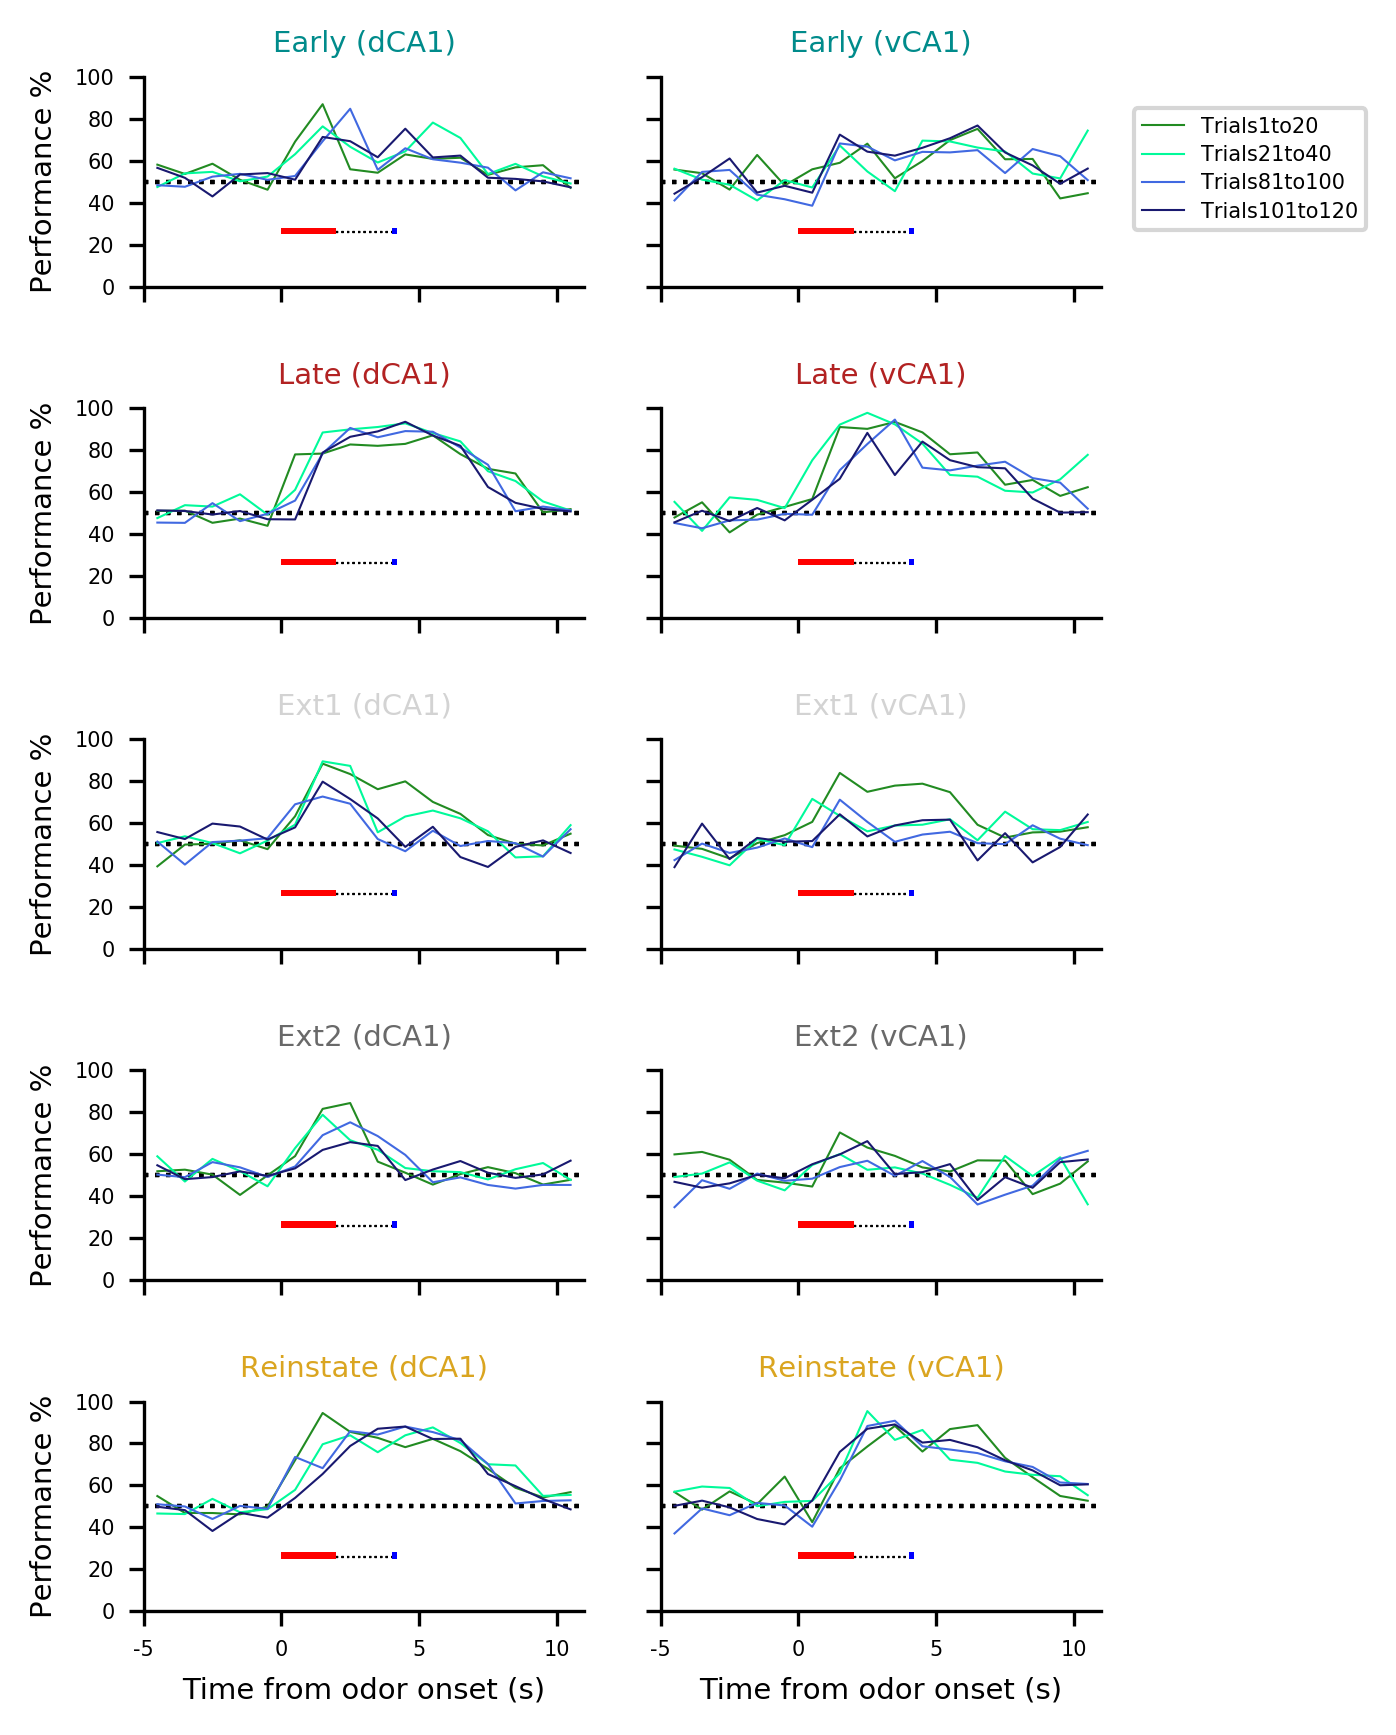

In [166]:
fig, ax = pl.subplots(5,2, figsize=(4, 6),sharex=True,sharey=True)

for sess,x,sess_la in zip(sessions[1:],range(len(sessions[1:])),('Early','Late','Ext1','Ext2','Reinstate')):
    for phase,c in zip(['Trials1to20','Trials21to40','Trials81to100','Trials101to120'],
                       ('forestgreen','mediumspringgreen','royalblue','midnightblue')):
        for r,r_la,i in zip(('dhpc','vhpc'),('dCA1','vCA1'),(0,1)):
            ax[x][i].plot([(t-4.5) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100) for t in range(16)],
                    color=c,label=phase)
            #m = np.array([(np.mean(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100) for t in range(16)])
            #s = np.array([np.std(eval("scores_gmin_tb_%s_%s_%s[sess]"%(t,phase,r)))*100 for t in range(16)])
            #ax[x][i].fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
            ax[x][i].set_title(sess_la+' ('+r_la+')',color=dark_co[x+1])
            pt.plot_period_bar(ax[x][i], 25, start_end=(0, 2), color='r', delta_y=3)
            pt.plot_period_bar(ax[x][i], 25, start_end=(4, 4.2), color='b', delta_y=3)
            ax[x][i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
            ax[x][i].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
            ax[x][0].set_ylabel('Performance %')
ax[0][0].set_ylim(0, 100)
ax[0][0].set_xlim(-5, 11)
ax[0][0].set_xticks(np.arange(-5,11, 5))
ax[0][0].set_xticklabels(np.arange(-5,11, 5))
ax[x][0].set_xlabel('Time from odor onset (s)')
ax[x][1].set_xlabel('Time from odor onset (s)')
ax[0][1].legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=3)

fig.savefig('../img/%s_gmin_phases_ALL.pdf'%NOTEBOOK_NAME)

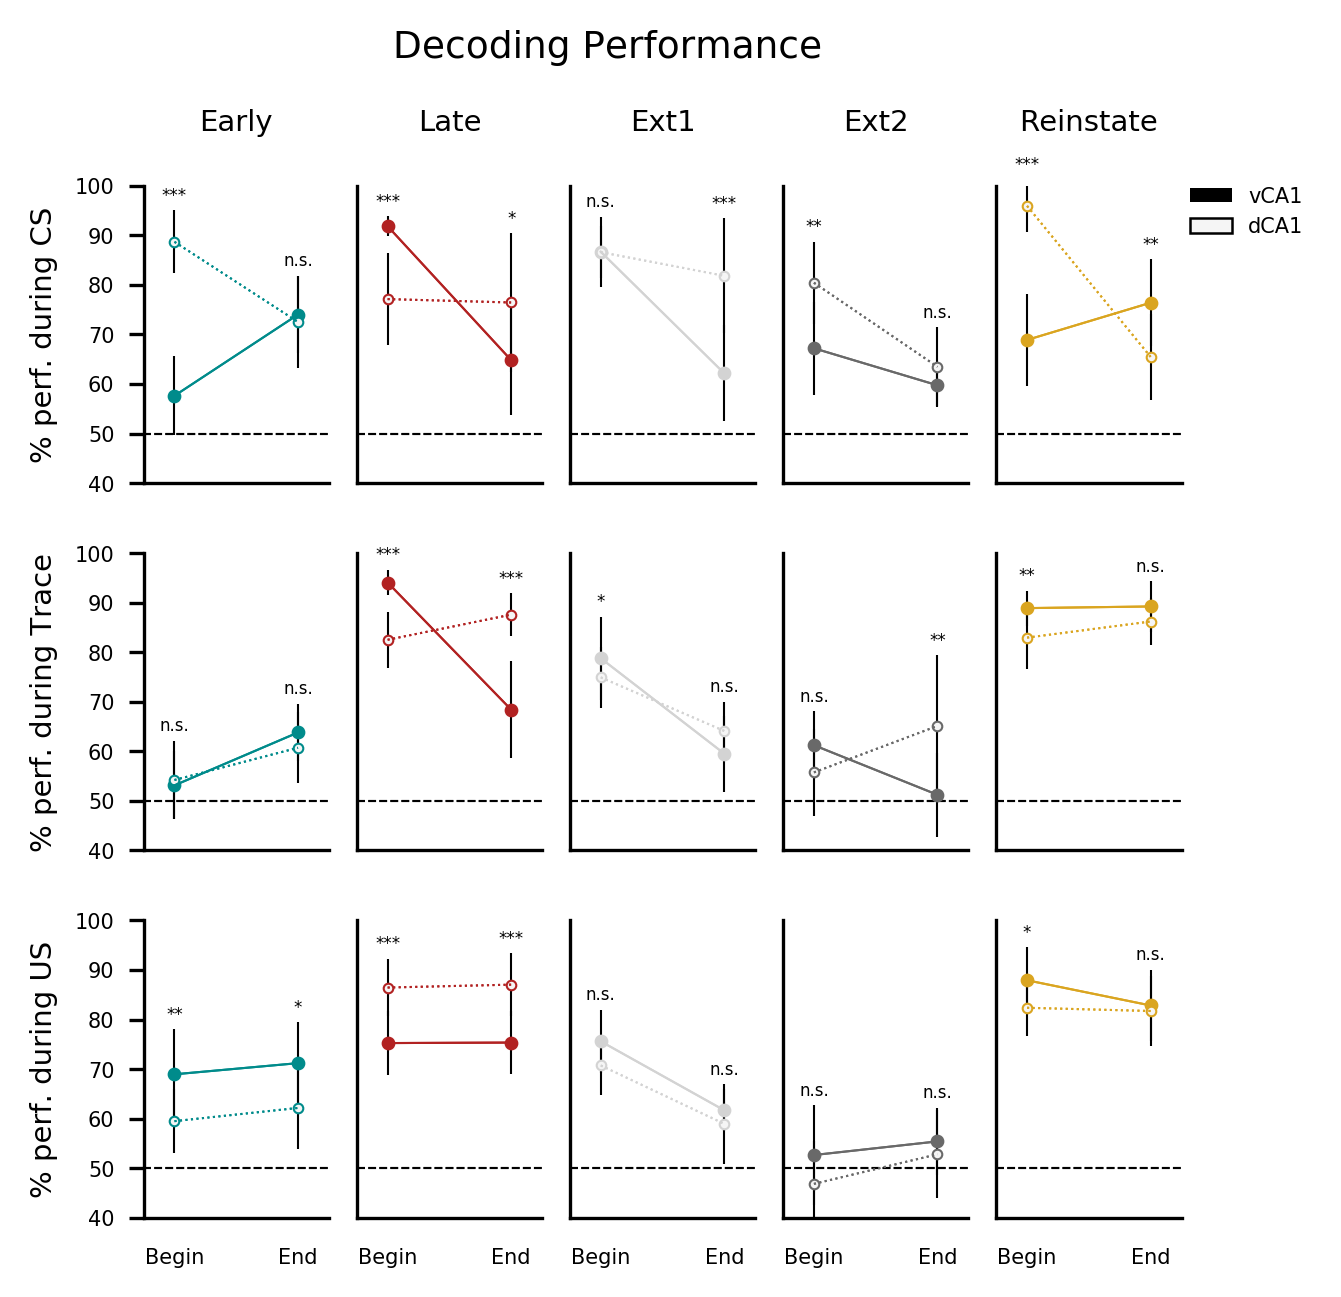

In [167]:
fig,ax = pl.subplots(3,5,figsize=(4,4),sharex=True,sharey=True)
v={}
d={}
phases=['Trials1to20','Trials101to120']
loops=10
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for phase,z in zip(['Trials1to20','Trials101to120'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                v[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100), 'o', color=dark_co[q+1],
                           markersize=2.3)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100),yerr=v[sess+phase+tb_la],
                              color='k')
                d[sess+phase+tb_la] = np.array(np.std(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100)
                ax[x][q].plot(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100), 'o', color='whitesmoke',
                           markersize=2.3,mec=dark_co[q+1],mew=.5)
                ax[x][q].errorbar(z, (np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100),yerr=d[sess+phase+tb_la],
                              color='k')
# Add connecting lines 
for sess,sess_la,q in zip(sessions[1:],('Early','Late','Ext1','Ext2','Reinstate'), range(len(sessions[1:]))):
    for phase,z in zip(['Trials1to20','Trials101to120'],(.2,1)):
        for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1])
                ax[x][q].plot([p for p in (.2,1)],
                           [(np.mean(eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phase)))*100) for phase in phases],
                           color=dark_co[q+1],linestyle='dotted')
            
                ax[x][q].tick_params(axis='x',bottom=False,labelbottom=True)
                ax[x][q].tick_params(axis='y',left=False)
                ax[x][0].tick_params(axis='y',left=True)
                ax[x][0].set_ylabel('% perf. during '+tb_la)
                ax[x][q].set_ylim(40,100)
                ax[x][q].hlines(50, -.5,2.5, color='k', lw=.5, linestyles='--')
                ax[0][q].set_title(sess_la,y=1.1)
                ax[x][q].set_xlim(0,1.2)
                ax[x][q].set_xticks((.2,1))
                ax[x][q].set_xticklabels(['Begin','End'])
                ax[0][4].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k',linewidth=.6)],['vCA1','dCA1'],loc=(1,.8),frameon=False)

#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding Performance',fontsize=9,x=.5,y=1.05)

pvs=[]
phases=['Trials1to20','Trials101to120']
for sess,q in zip(sessions[1:],range(len(sessions[1:]))):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
        for i,z in zip(range(2),(.2,1)):
            pvs.append(add_significance(ax[x][q], eval("mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops]"%(tb,phases[i])),
                        eval("mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops]"%(tb,phases[i])),z,z,
                        max(eval("np.mean(mean_scores_gmin_tb_%s_%s_vhpc[sess][:loops])"%(tb,phases[i]))*100+v[sess+phases[i]+tb_la],
                        eval("np.mean(mean_scores_gmin_tb_%s_%s_dhpc[sess][:loops])"%(tb,phases[i]))*100+d[sess+phases[i]+tb_la])+1,
                        ticksize=0))
#        for d in range(3):
#            pvs.append(sig_vs_chance(ax[x],eval("mean_scores_gmin_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
#                   eval("np.mean(mean_scores_gmin_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
#        #       eval("mean_scores_gmin_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_10_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))

fig.tight_layout(w_pad=1,h_pad=2)

fig.savefig('../img/%s_gmin_BegEnd_ALLsess.jpg'%NOTEBOOK_NAME)

In [62]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'matplotlib'. Skipping...
